# Purpose

The purpose of this notebook is build the charts and tables for the paper
## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import swifter
import itertools
import os
from scipy import stats
from statannot import add_stat_annotation

In [2]:
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = itertools.tee(iterable)
    next(b, None)
    return zip(a, b)

## Setting up Seaborn

In [3]:
sns.set_theme(style = "whitegrid", font_scale = 1.1)
sns.despine(left = True)

colors = ['#fee0d2', '#fc9272', '#de2d26']

sns.set_palette(sns.color_palette(colors))
figureSize = (4, 3)
padInches = 0.05

fileFormat = '.pdf'
dpi = 600

<Figure size 432x288 with 0 Axes>

## Overall stats

### Prepping Data

In [4]:
data = pd.read_parquet('../data/KidListeningEventsWithAudioFeatures.gzip.parquet', columns = ['Age', 'Education Level', 'User Id', 'Track Id', 'Loudness'])
data['Has Audio Features'] = (data['Loudness'].isna() == False)
data.drop(columns = ['Loudness'], inplace = True)
data

Age Education Level   User Id  Track Id  Has Audio Features
0          16              HS  15397460     99816               False
1          16              HS  15397460     99833               False
2          16              HS  15397460     99851                True
3          16              HS  15397460     99875                True
4          16              HS  15397460     99823                True
...       ...             ...       ...       ...                 ...
37096510   16              HS  47574621    202191                True
37096511   16              HS  47574621   8941711               False
37096512   16              HS  47574621   1341135                True
37096513   16              HS  47574621     80529                True
37096514   16              HS  47574621    251693               False

[37096515 rows x 5 columns]

### Charts

#### Prepping Data

In [5]:
temp = data[data['Education Level'] == 'HS']
temp

ageChartData = temp[['Age', 'User Id']].drop_duplicates().groupby(['Age']).agg(Total_Users = ('User Id', 'count'))
ageChartData

t = temp.groupby(['Age']).agg(Total_LEs = ('Has Audio Features', 'count')
                              , Total_LEs_with_Audio_Features = ('Has Audio Features', 'sum'))
t

ageChartData = ageChartData.merge(t, left_index = True, right_index = True)
ageChartData

temp = temp[['Age', 'Track Id', 'Has Audio Features']].drop_duplicates()
t = temp.groupby(['Age']).agg(Total_Distinct_LEs = ('Has Audio Features', 'count')
                              , Total_Distinct_LEs_with_Audio_Features = ('Has Audio Features', 'sum'))
t

ageChartData = ageChartData.merge(t, left_index = True, right_index = True)
ageChartData

ageChartData = ageChartData.T.rename_axis('Total', axis = 1)
ageChartData = pd.DataFrame(ageChartData.values, index = ageChartData.index,columns=[['High School - Ages', 'High School - Ages', 'High School - Ages'], ageChartData.columns])
ageChartData

High School - Ages                   
Total                                                  15       16        17
Total_Users                                           493      946      1638
Total_LEs                                         4296583  9747692  19714551
Total_LEs_with_Audio_Features                     2524450  5729399  11439756
Total_Distinct_LEs                                 484126   892385   1588660
Total_Distinct_LEs_with_Audio_Features             221099   368285    607248

In [6]:
educationChartData = data[['Education Level', 'User Id']].drop_duplicates().groupby(['Education Level']).agg(Total_Users = ('User Id', 'count'))
educationChartData

temp = data.groupby(['Education Level']).agg(Total_LEs = ('Has Audio Features', 'count')
                                             , Total_LEs_with_Audio_Features = ('Has Audio Features', 'sum'))
temp

educationChartData = educationChartData.merge(temp, left_index = True, right_index = True)
educationChartData

temp = data[['Education Level', 'Track Id', 'Has Audio Features']].drop_duplicates()
t = temp.groupby(['Education Level']).agg(Total_Distinct_LEs = ('Has Audio Features', 'count')
                              , Total_Distinct_LEs_with_Audio_Features = ('Has Audio Features', 'sum'))
t

educationChartData = educationChartData.merge(t, left_index = True, right_index = True)
educationChartData

educationChartData = educationChartData.T.rename_axis('Total', axis = 1)
educationChartData = pd.DataFrame(educationChartData.values, index = educationChartData.index,columns=[['Education Level', 'Education Level', 'Education Level'], educationChartData.columns])
educationChartData

Education Level                   
Total                                               GS       MS        HS
Total_Users                                         57      282      3077
Total_LEs                                       951840  2385849  33758826
Total_LEs_with_Audio_Features                   490280  1395974  19693605
Total_Distinct_LEs                              237714   330315   2212716
Total_Distinct_LEs_with_Audio_Features          116157   159607    786301

In [7]:
chartData = educationChartData.merge(ageChartData, left_index = True, right_index = True)
chartData

chartData.index = chartData.index.str.replace('Total_', '').str.replace('_', ' ').str.replace('with', 'w/')
chartData

Education Level                     \
Total                                       GS       MS        HS   
Users                                       57      282      3077   
LEs                                     951840  2385849  33758826   
LEs w/ Audio Features                   490280  1395974  19693605   
Distinct LEs                            237714   330315   2212716   
Distinct LEs w/ Audio Features          116157   159607    786301   

                               High School - Ages                     
Total                                          15       16        17  
Users                                         493      946      1638  
LEs                                       4296583  9747692  19714551  
LEs w/ Audio Features                     2524450  5729399  11439756  
Distinct LEs                               484126   892385   1588660  
Distinct LEs w/ Audio Features             221099   368285    607248

#### Formatting Data

In [8]:
tableData = chartData.copy()
for column in chartData.columns:
    tableData[column] = tableData[column].apply(lambda x: '{:,}'.format(x))
    
tableData

Education Level                         \
Total                                       GS         MS          HS   
Users                                       57        282       3,077   
LEs                                    951,840  2,385,849  33,758,826   
LEs w/ Audio Features                  490,280  1,395,974  19,693,605   
Distinct LEs                           237,714    330,315   2,212,716   
Distinct LEs w/ Audio Features         116,157    159,607     786,301   

                               High School - Ages                         
Total                                          15         16          17  
Users                                         493        946       1,638  
LEs                                     4,296,583  9,747,692  19,714,551  
LEs w/ Audio Features                   2,524,450  5,729,399  11,439,756  
Distinct LEs                              484,126    892,385   1,588,660  
Distinct LEs w/ Audio Features            221,099    368,285     607,248

In [9]:
def Bold(text):
    return '\\textbf{' + str(text) + '}'

def BoldTuple(pair):
    return tuple(map(Bold, pair))

tableData.columns = pd.MultiIndex.from_tuples(tableData.columns.to_series().apply(BoldTuple))

latex = tableData.to_latex(escape = False
                           , index = True
                           , bold_rows = True
                           , multicolumn_format = 'c'
                           , multirow = True
                           , label = 'tab:Data Distribution'
                           , position = '!h'
                           , column_format = 'l@{\hskip 2em}ccc@{\hskip 2em}ccc'
                           , caption = 'Overview \OurDataset. GS (Grade School), MS (Middle School), and HS (High School) are the education levels in our analysis.'
                          )
latex = latex.replace('\\begin{tabular}','\\resizebox{0.85\\textwidth}{!}{%\n\\begin{tabular}')\
                .replace('\\toprule','')\
                .replace('\\midrule','\\toprule')\
                .replace('\\end{table}', '}\n\\end{table}')

print(latex)

\begin{table}[!h]
\centering
\caption{Overview \OurDataset. GS (Grade School), MS (Middle School), and HS (High School) are the education levels in our analysis.}
\label{tab:Data Distribution}
\resizebox{0.85\textwidth}{!}{%
\begin{tabular}{l@{\hskip 2em}ccc@{\hskip 2em}ccc}

{} & \multicolumn{3}{c}{\textbf{Education Level}} & \multicolumn{3}{c}{\textbf{High School - Ages}} \\
{} &              \textbf{GS} & \textbf{MS} & \textbf{HS} &                 \textbf{15} & \textbf{16} & \textbf{17} \\
\toprule
\textbf{Users                         } &                       57 &         282 &       3,077 &                         493 &         946 &       1,638 \\
\textbf{LEs                           } &                  951,840 &   2,385,849 &  33,758,826 &                   4,296,583 &   9,747,692 &  19,714,551 \\
\textbf{LEs w/ Audio Features         } &                  490,280 &   1,395,974 &  19,693,605 &                   2,524,450 &   5,729,399 &  11,439,756 \\
\textbf{Distinct LEs    

## Diversity of Listening Events

### Prepping Data

In [10]:
temp = pd.read_parquet('../data/KidListeningEventsWithAudioFeatures.gzip.parquet', columns = ['Age', 'Education Level', 'User Id', 'Track Id'])
temp

Age Education Level   User Id  Track Id
0          16              HS  15397460     99816
1          16              HS  15397460     99833
2          16              HS  15397460     99851
3          16              HS  15397460     99875
4          16              HS  15397460     99823
...       ...             ...       ...       ...
37096510   16              HS  47574621    202191
37096511   16              HS  47574621   8941711
37096512   16              HS  47574621   1341135
37096513   16              HS  47574621     80529
37096514   16              HS  47574621    251693

[37096515 rows x 4 columns]

In [11]:
data = temp[['Age', 'Education Level', 'User Id']].drop_duplicates(ignore_index = True)
data

Age Education Level   User Id
0      16              HS  15397460
1      17              HS  21211675
2      17              HS  31413349
3      17              HS  48700136
4      17              HS  33069335
...   ...             ...       ...
3411   16              HS  48838026
3412   17              HS  47156540
3413   17              HS  48422022
3414   16              HS  47574621
3415   17              HS  37766230

[3416 rows x 3 columns]

In [12]:
t = temp.groupby(['User Id', 'Track Id']).agg(TrackListenedCount = ('Track Id', 'count')).reset_index()
t = t.groupby(['User Id']).agg(UniqueCount = ('TrackListenedCount', 'count'), TotalCount = ('TrackListenedCount', 'sum'))
data = data.merge(t, on = 'User Id')
data

Age Education Level   User Id  UniqueCount  TotalCount
0      16              HS  15397460         2311        3896
1      17              HS  21211675         2220       19596
2      17              HS  31413349         2998        8505
3      17              HS  48700136         1930       11428
4      17              HS  33069335         1075        5400
...   ...             ...       ...          ...         ...
3411   16              HS  48838026          120         133
3412   17              HS  47156540           37          43
3413   17              HS  48422022           43          55
3414   16              HS  47574621         5647       31013
3415   17              HS  37766230            1           1

[3416 rows x 5 columns]

In [13]:
data['Diversity'] = data['TotalCount'] / data['UniqueCount'] 
data['Diversity Inverted'] = data['UniqueCount'] / data['TotalCount']
data

Age Education Level   User Id  UniqueCount  TotalCount  Diversity  \
0      16              HS  15397460         2311        3896   1.685850   
1      17              HS  21211675         2220       19596   8.827027   
2      17              HS  31413349         2998        8505   2.836891   
3      17              HS  48700136         1930       11428   5.921244   
4      17              HS  33069335         1075        5400   5.023256   
...   ...             ...       ...          ...         ...        ...   
3411   16              HS  48838026          120         133   1.108333   
3412   17              HS  47156540           37          43   1.162162   
3413   17              HS  48422022           43          55   1.279070   
3414   16              HS  47574621         5647       31013   5.491943   
3415   17              HS  37766230            1           1   1.000000   

      Diversity Inverted  
0               0.593172  
1               0.113288  
2               0.352499  
3               0.168883  
4               0.199074  
...                  ...  
3411            0.902256  
3412            0.860465  
3413            0.781818  
3414            0.182085  
3415            1.000000  

[3416 rows x 7 columns]

In [14]:
data = data.rename(columns = {'UniqueCount': 'Unique LEs', 'TotalCount': 'Total LEs'})

### Graphs

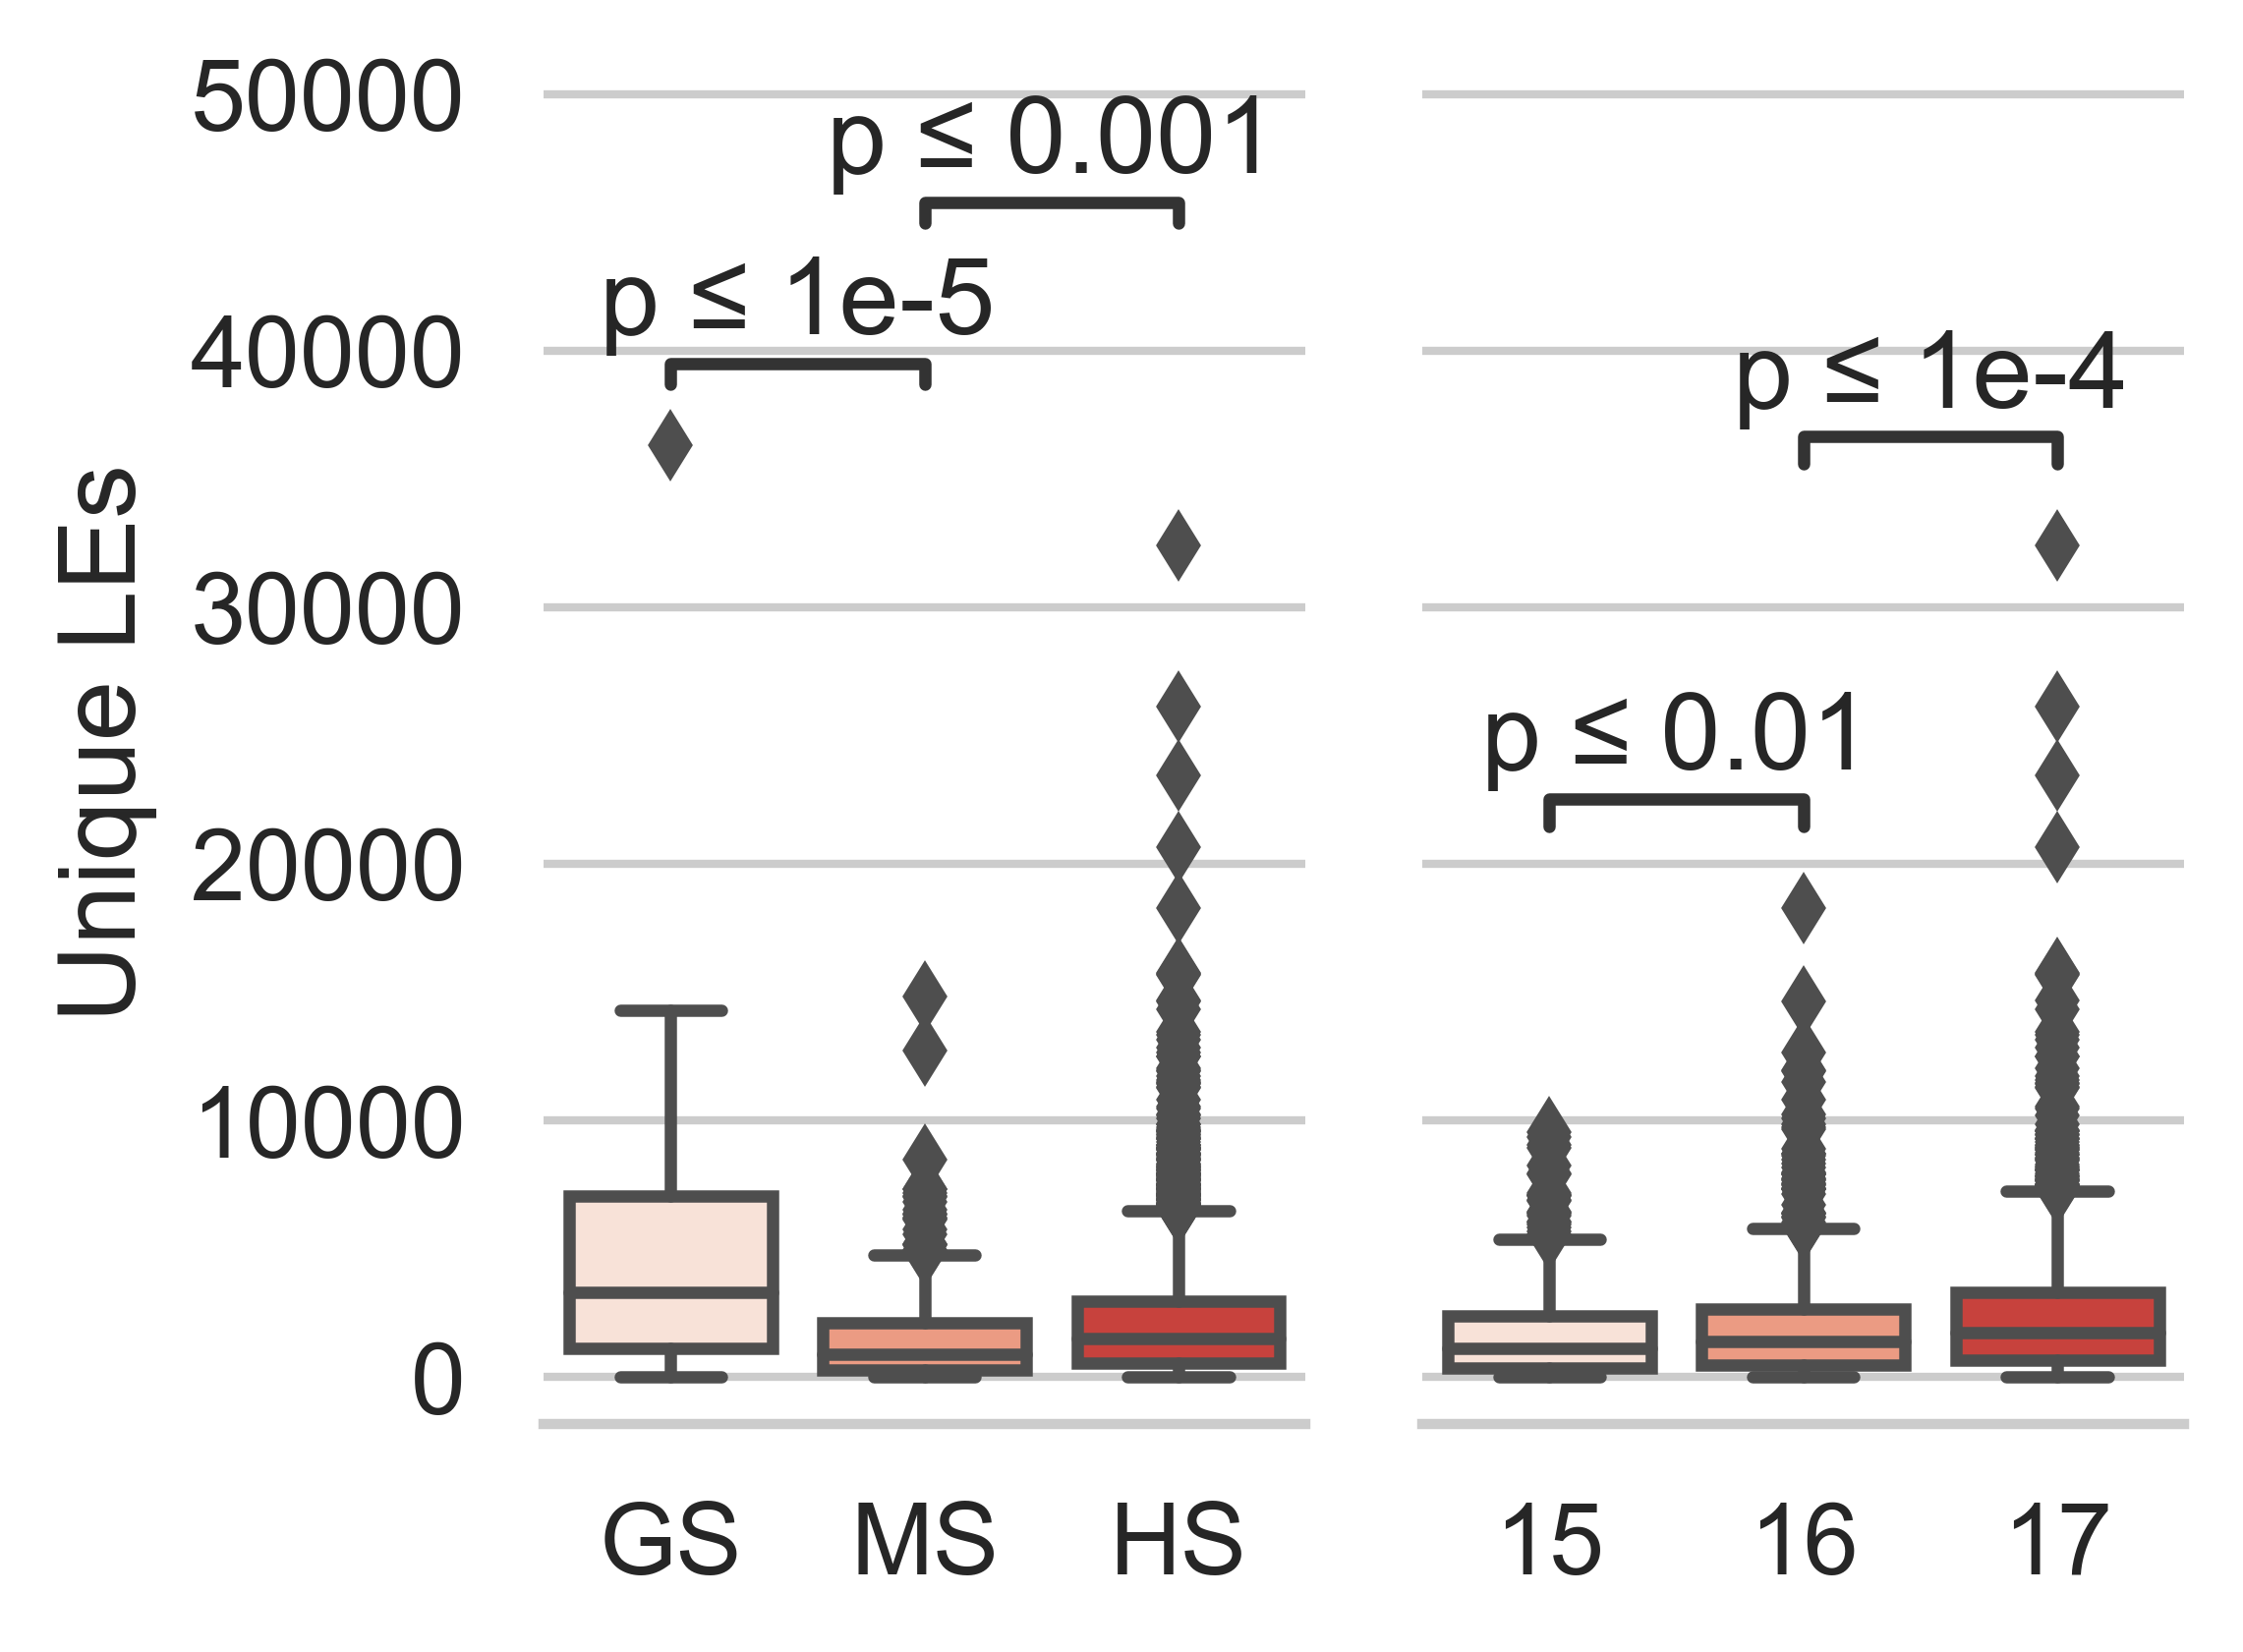

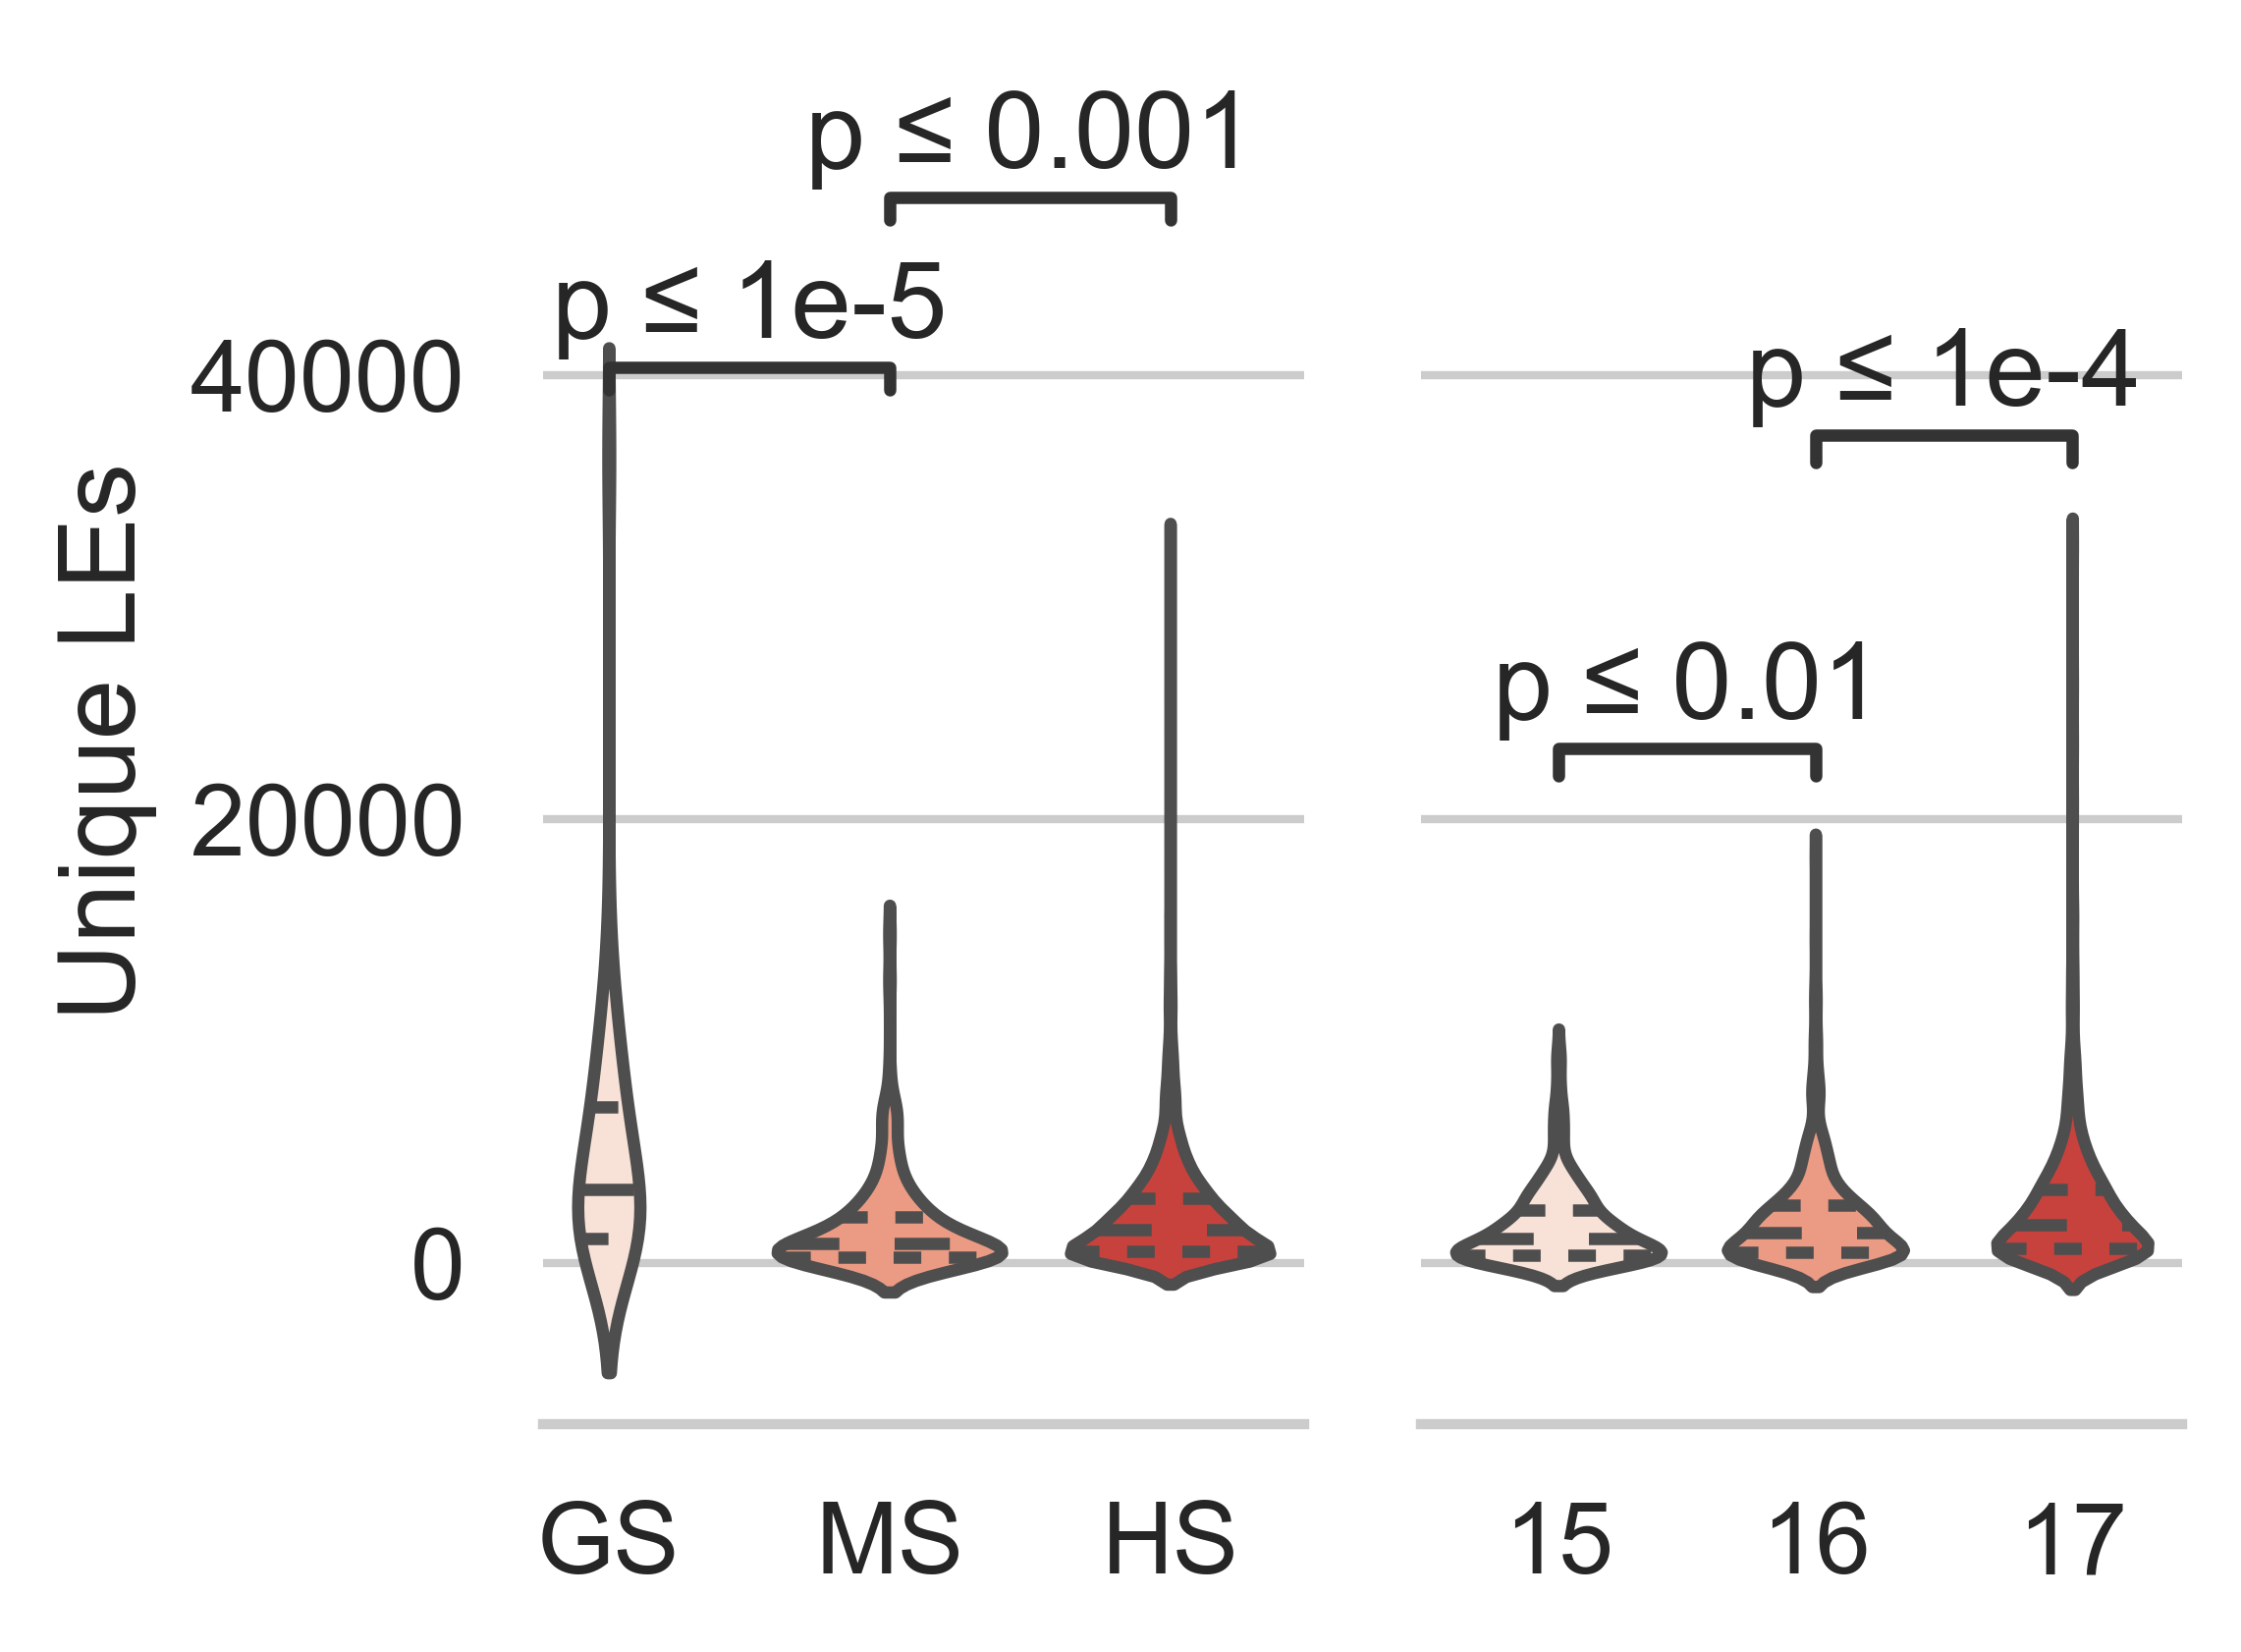

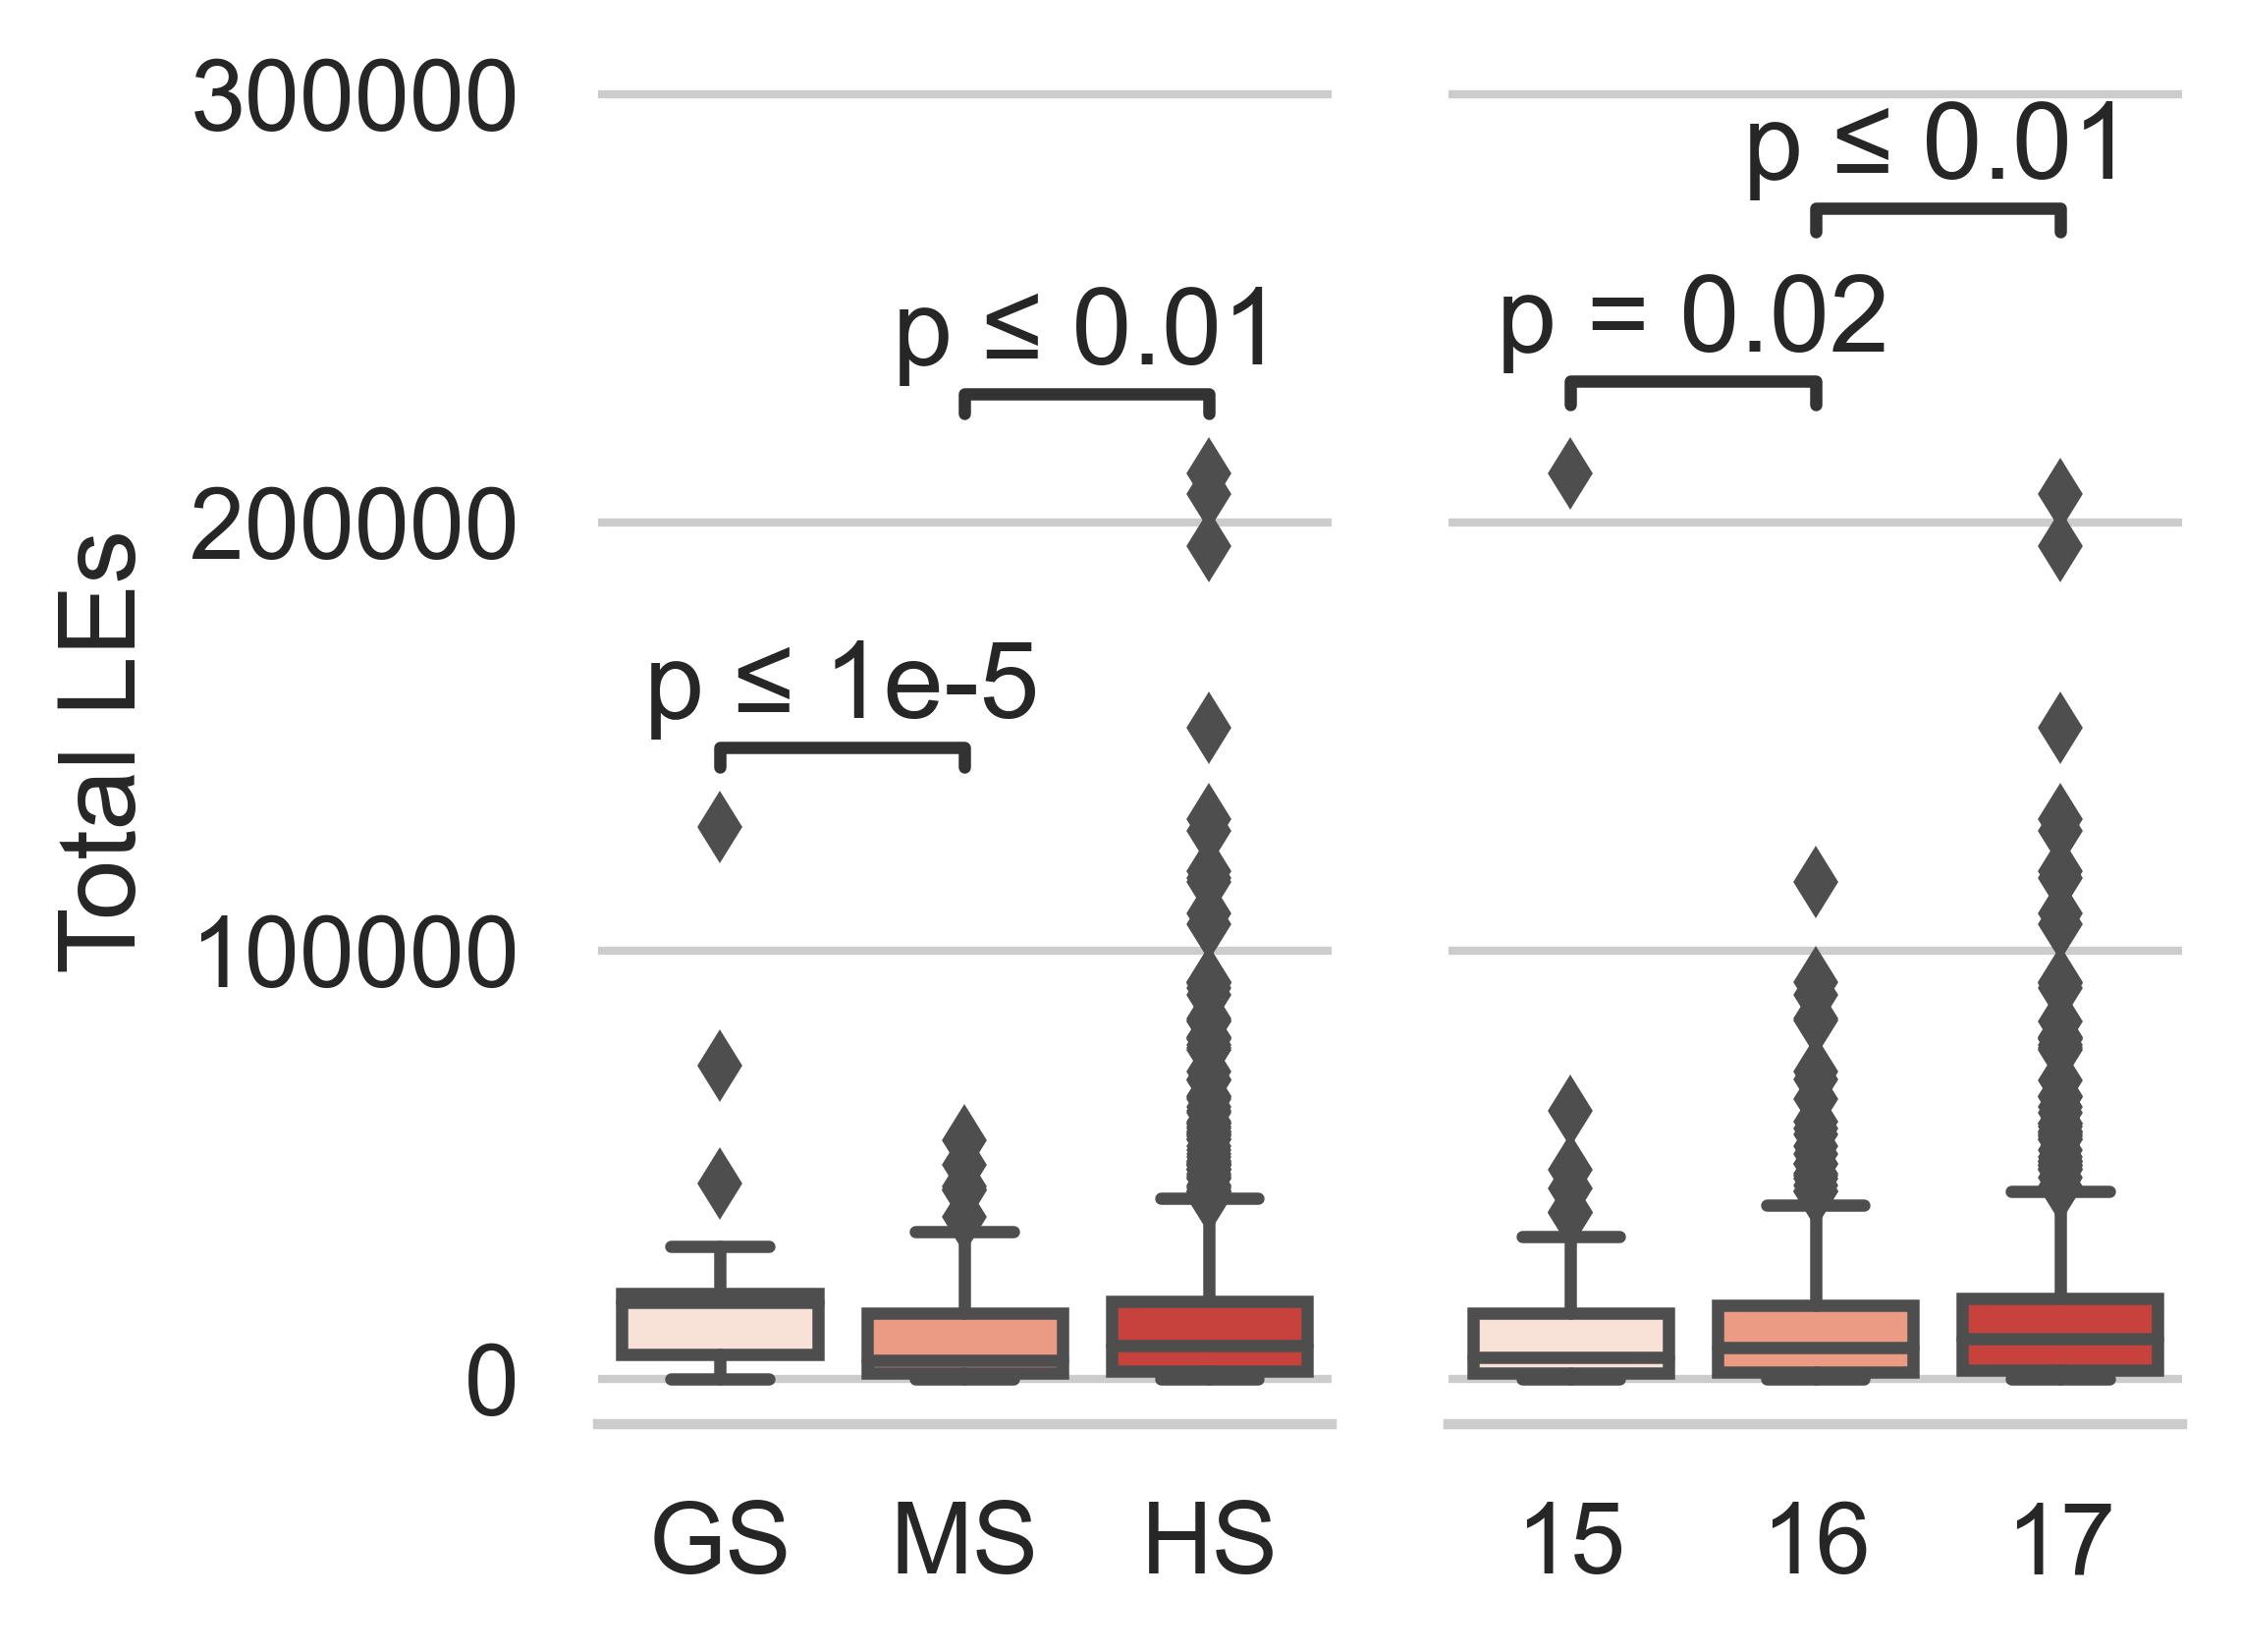

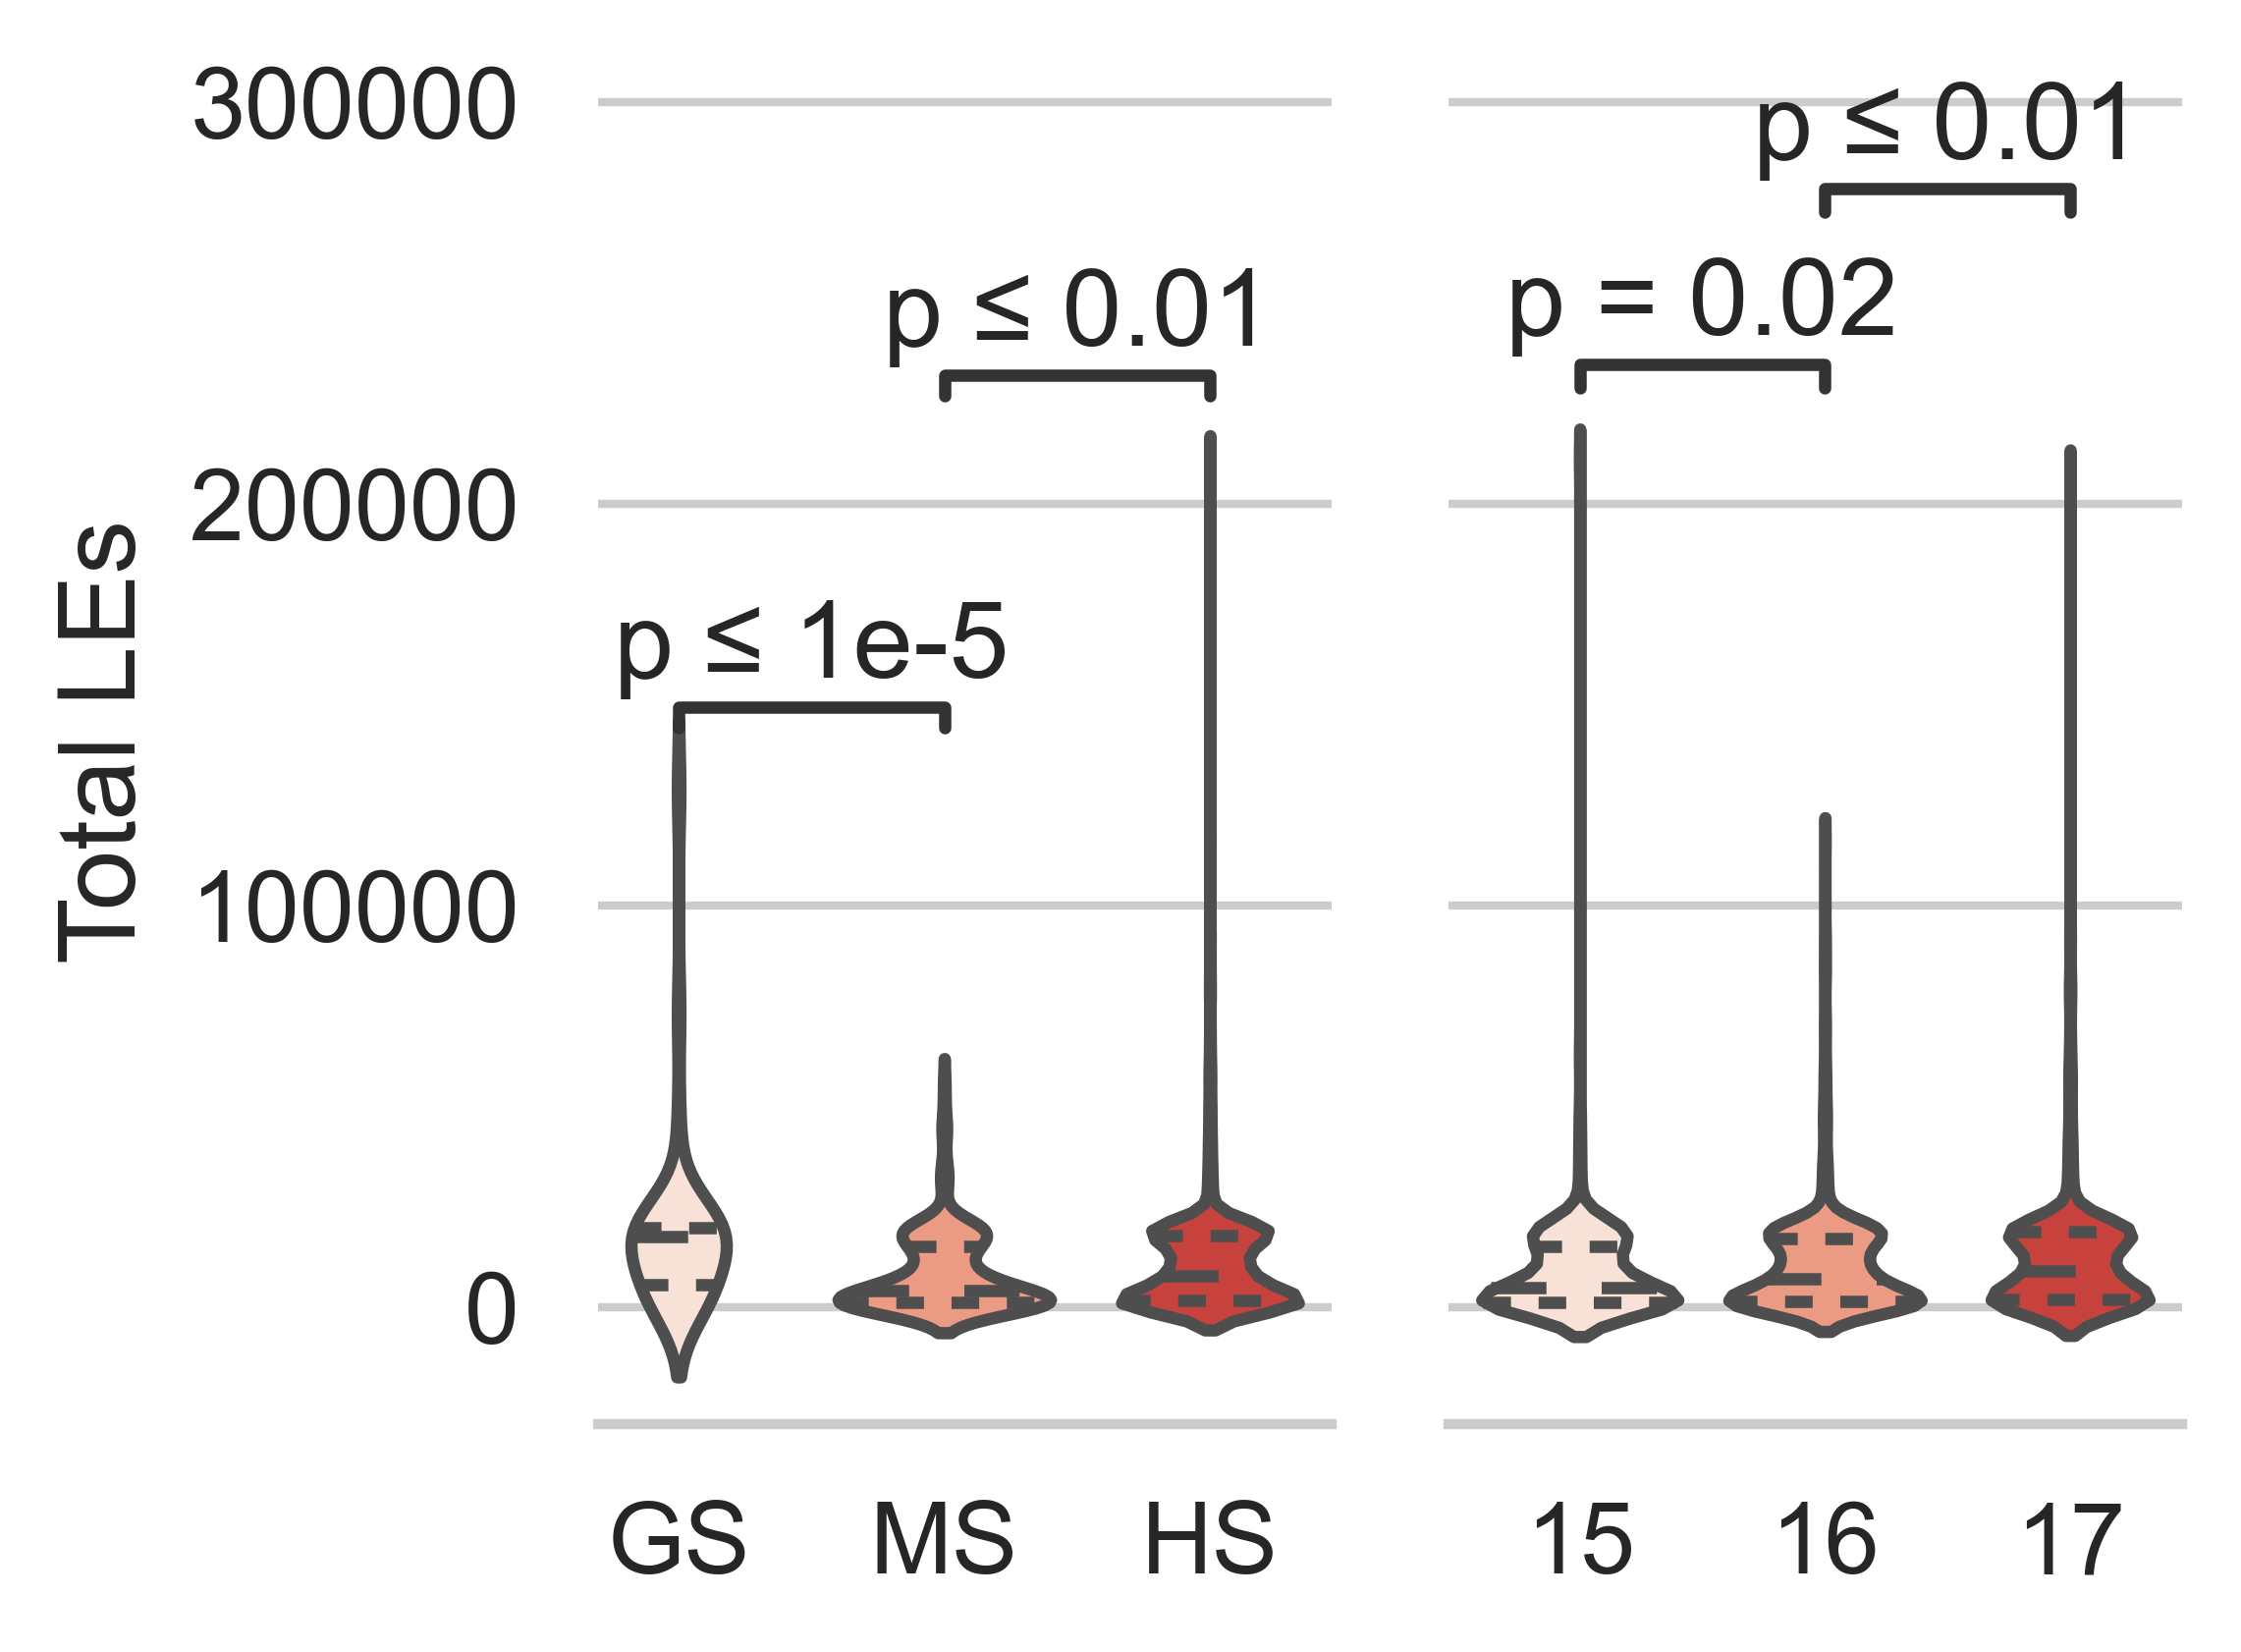

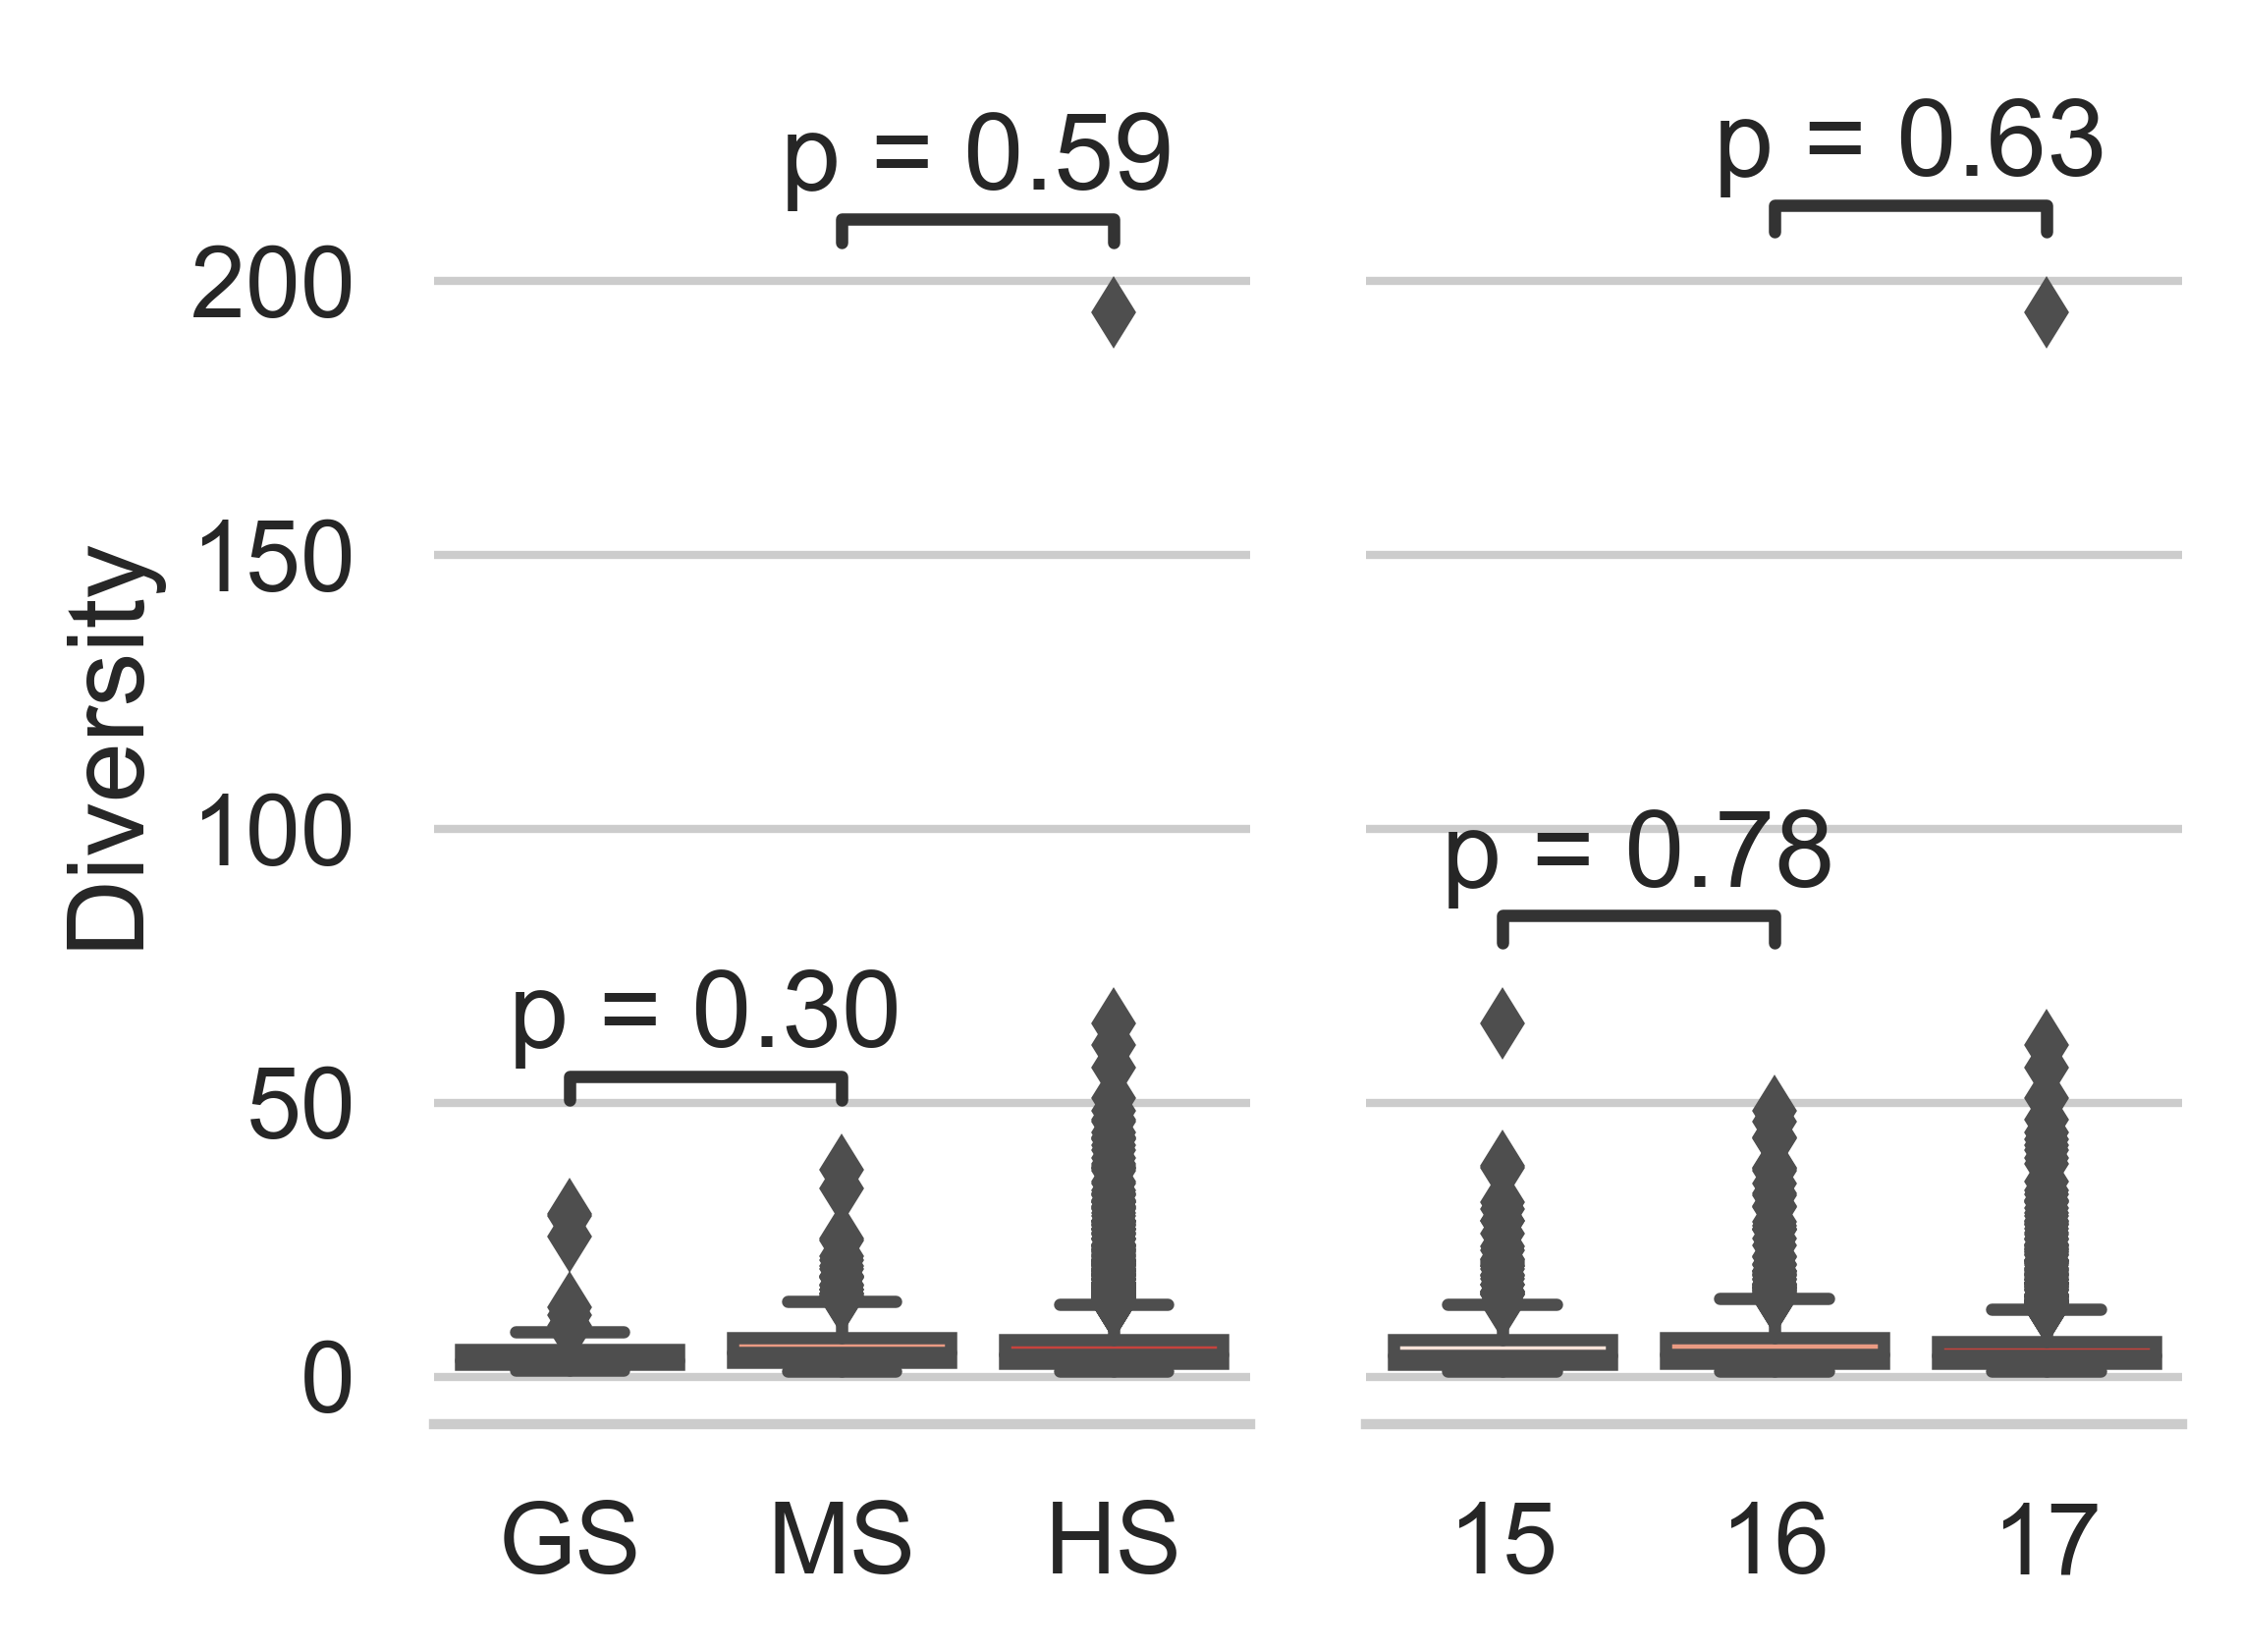

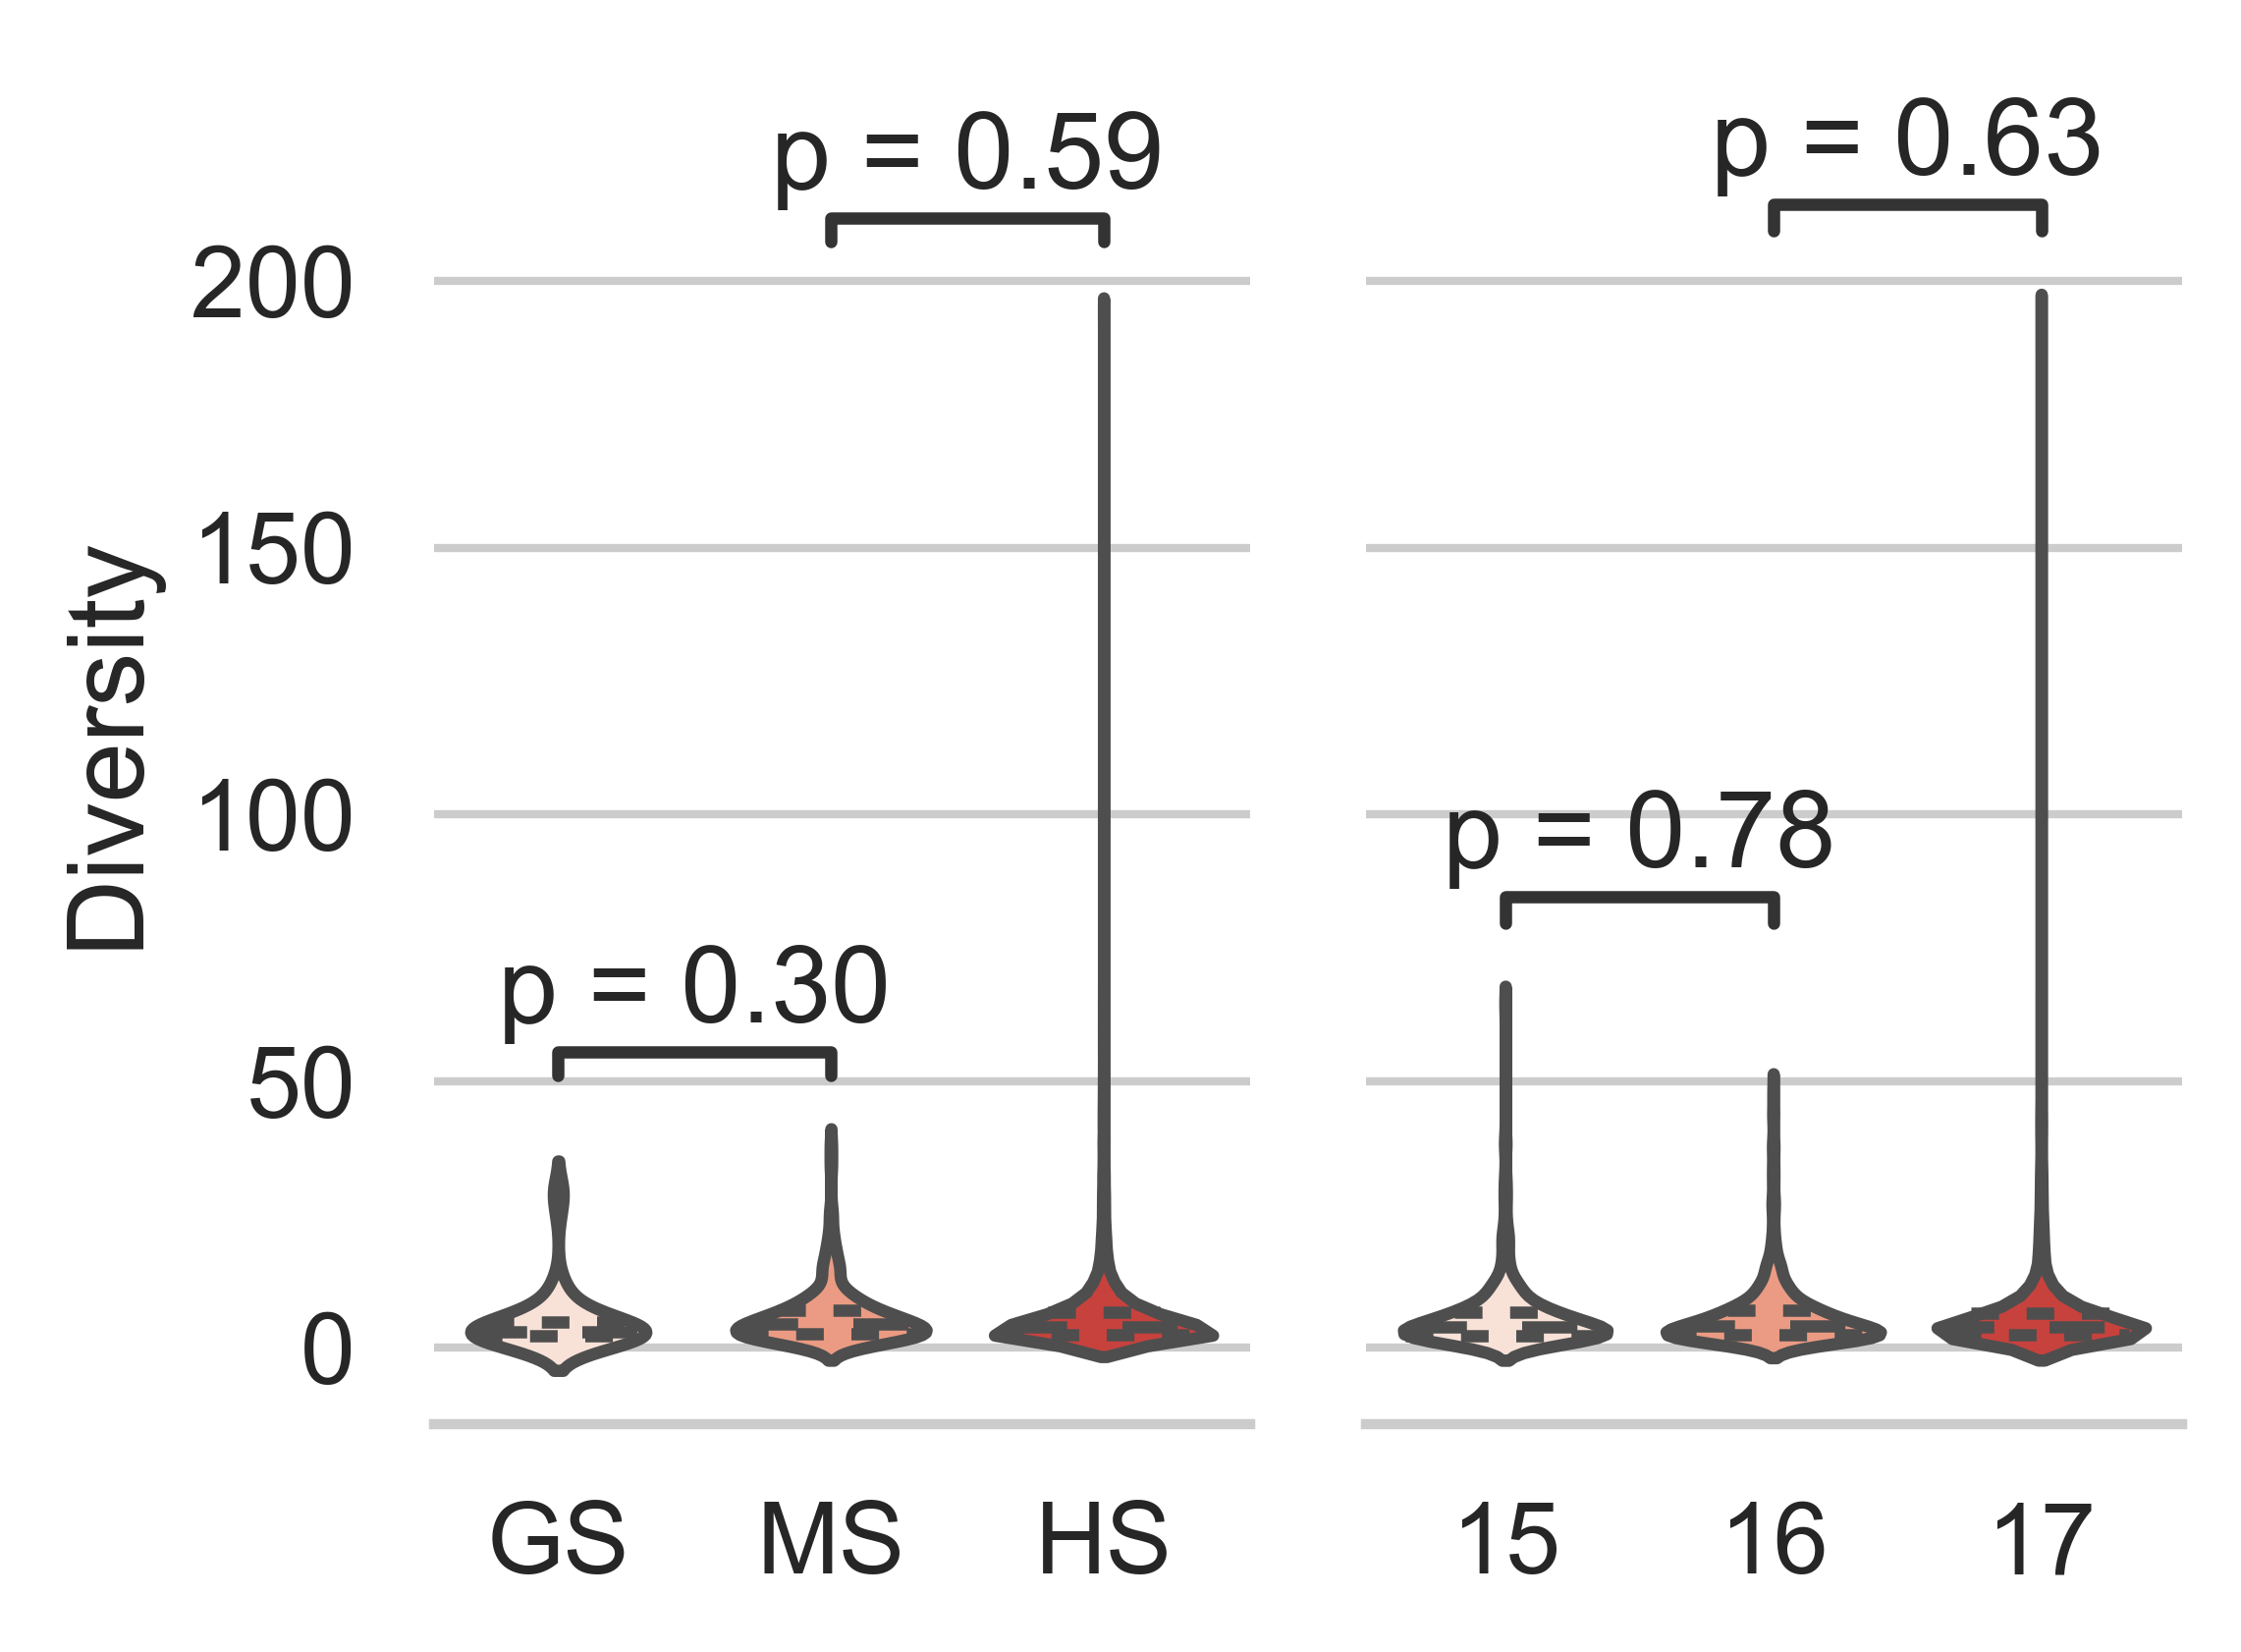

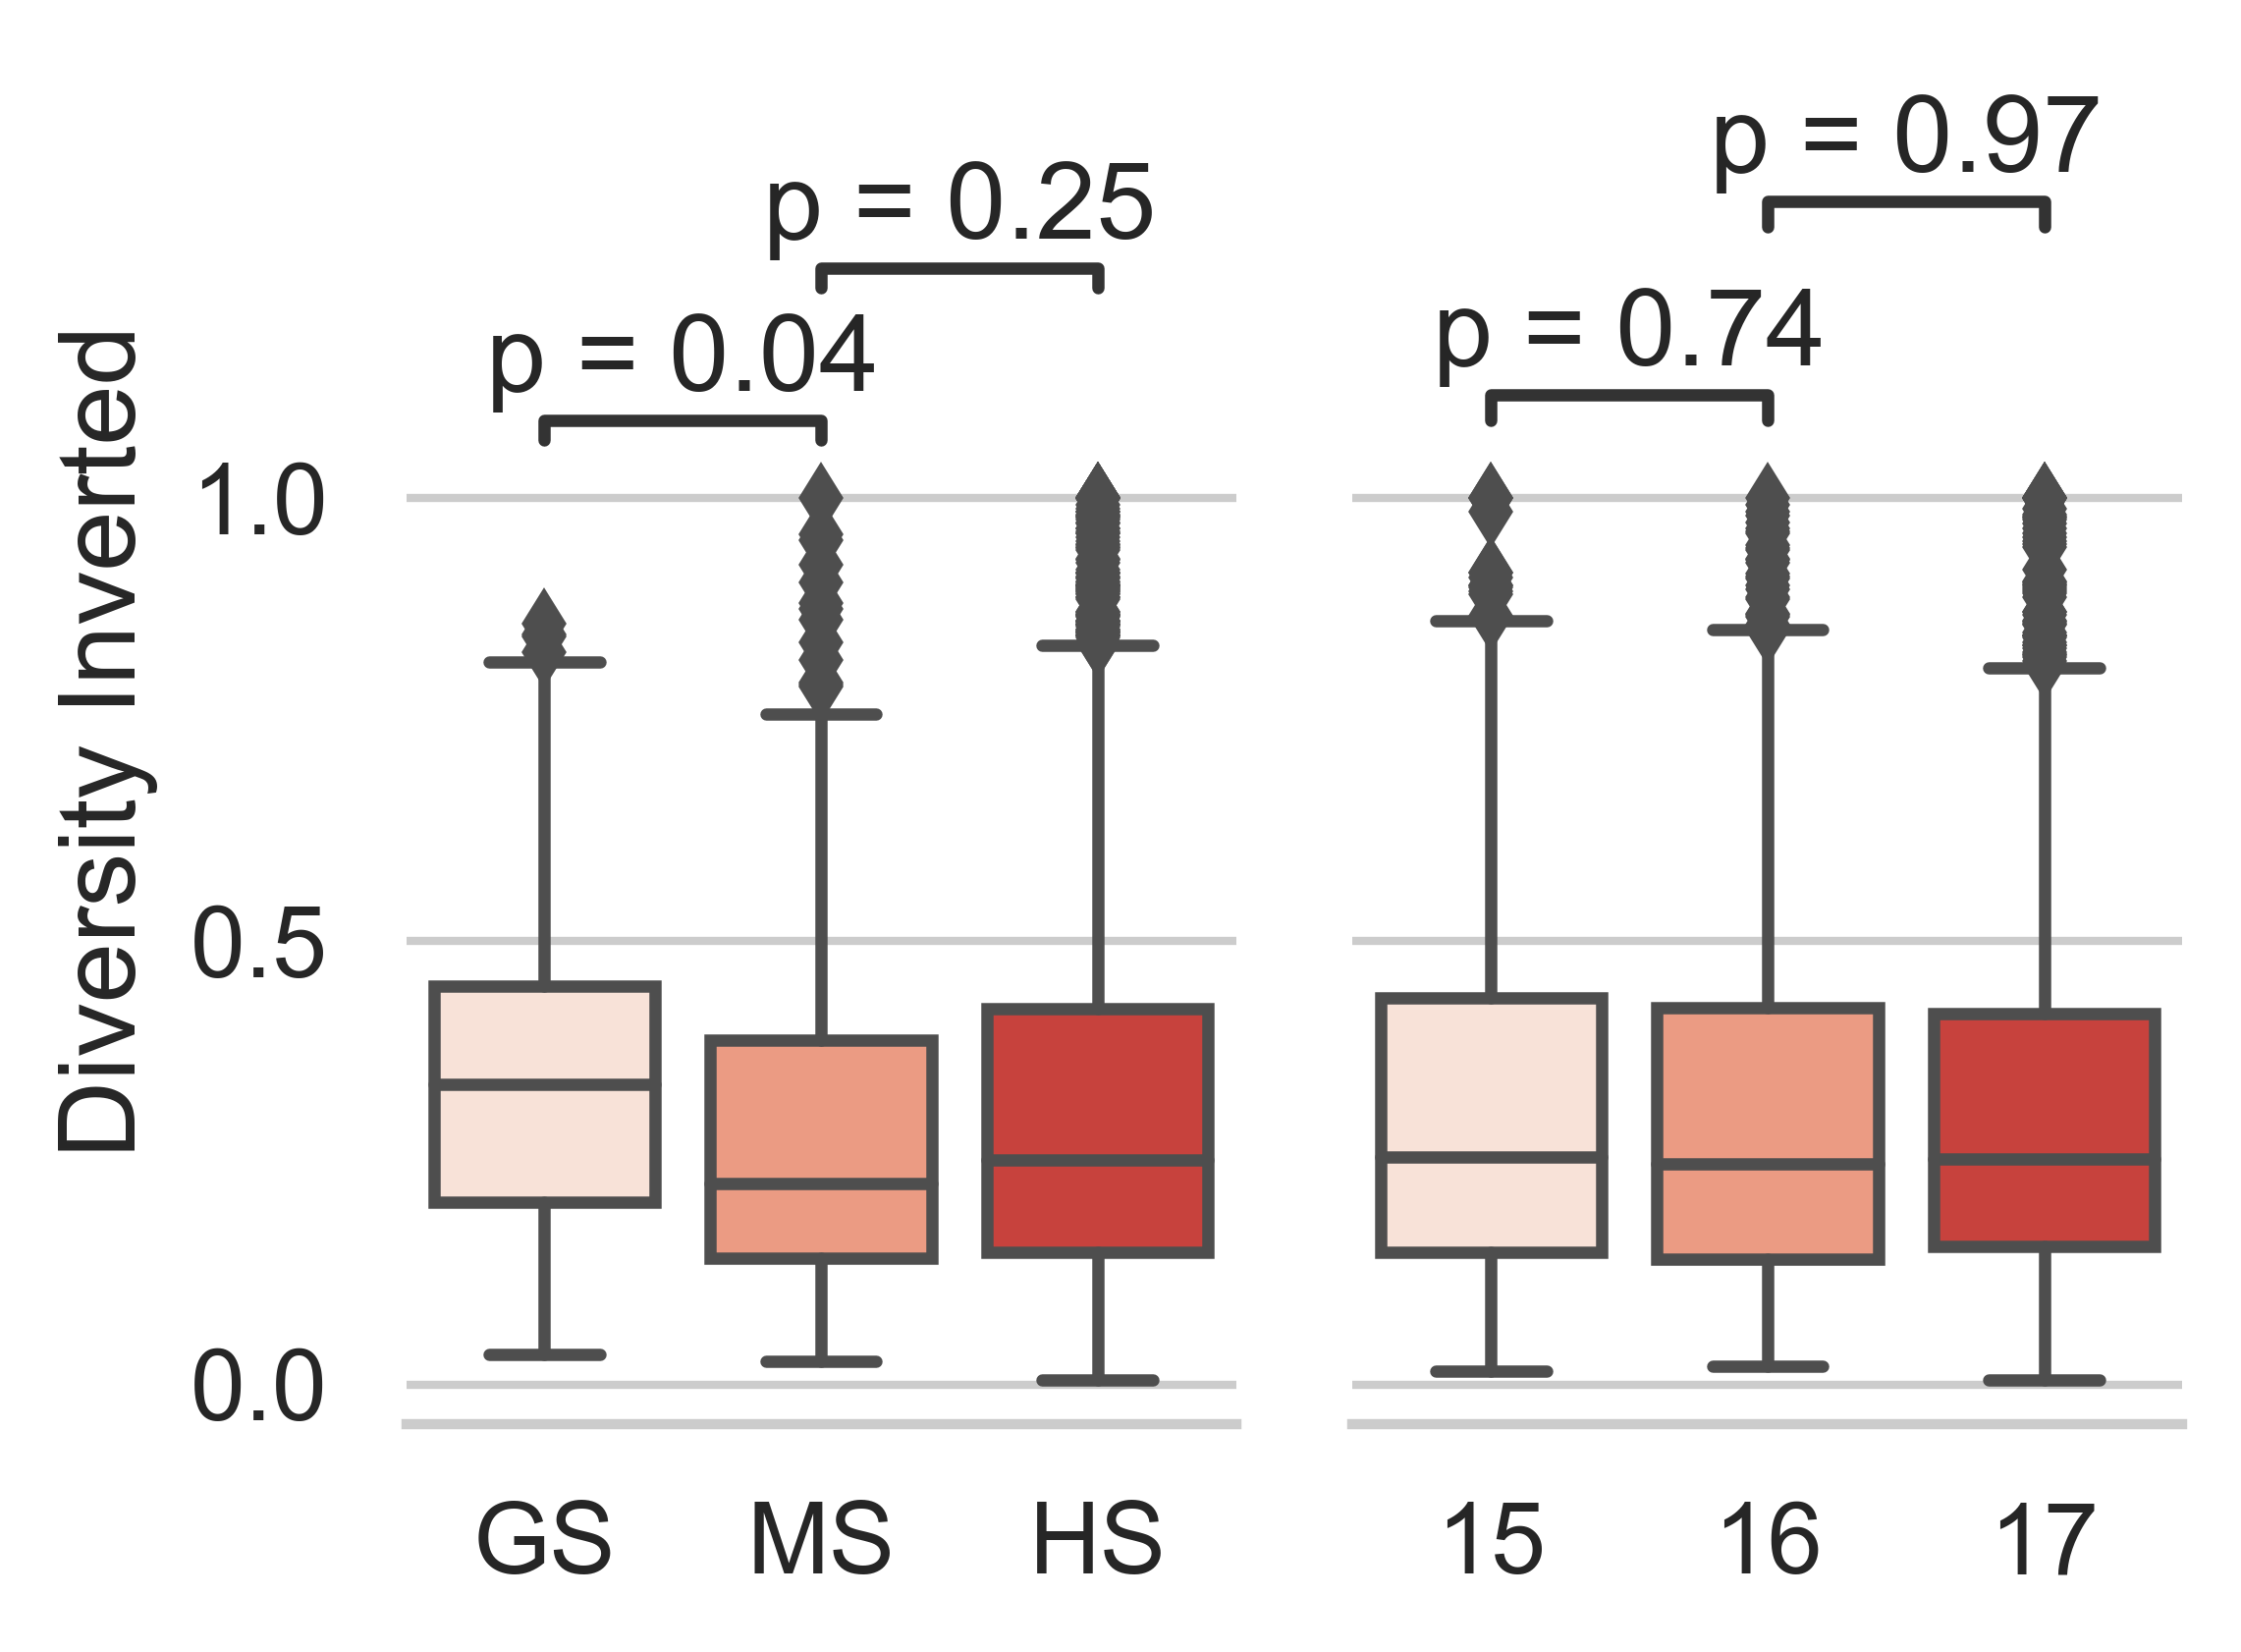

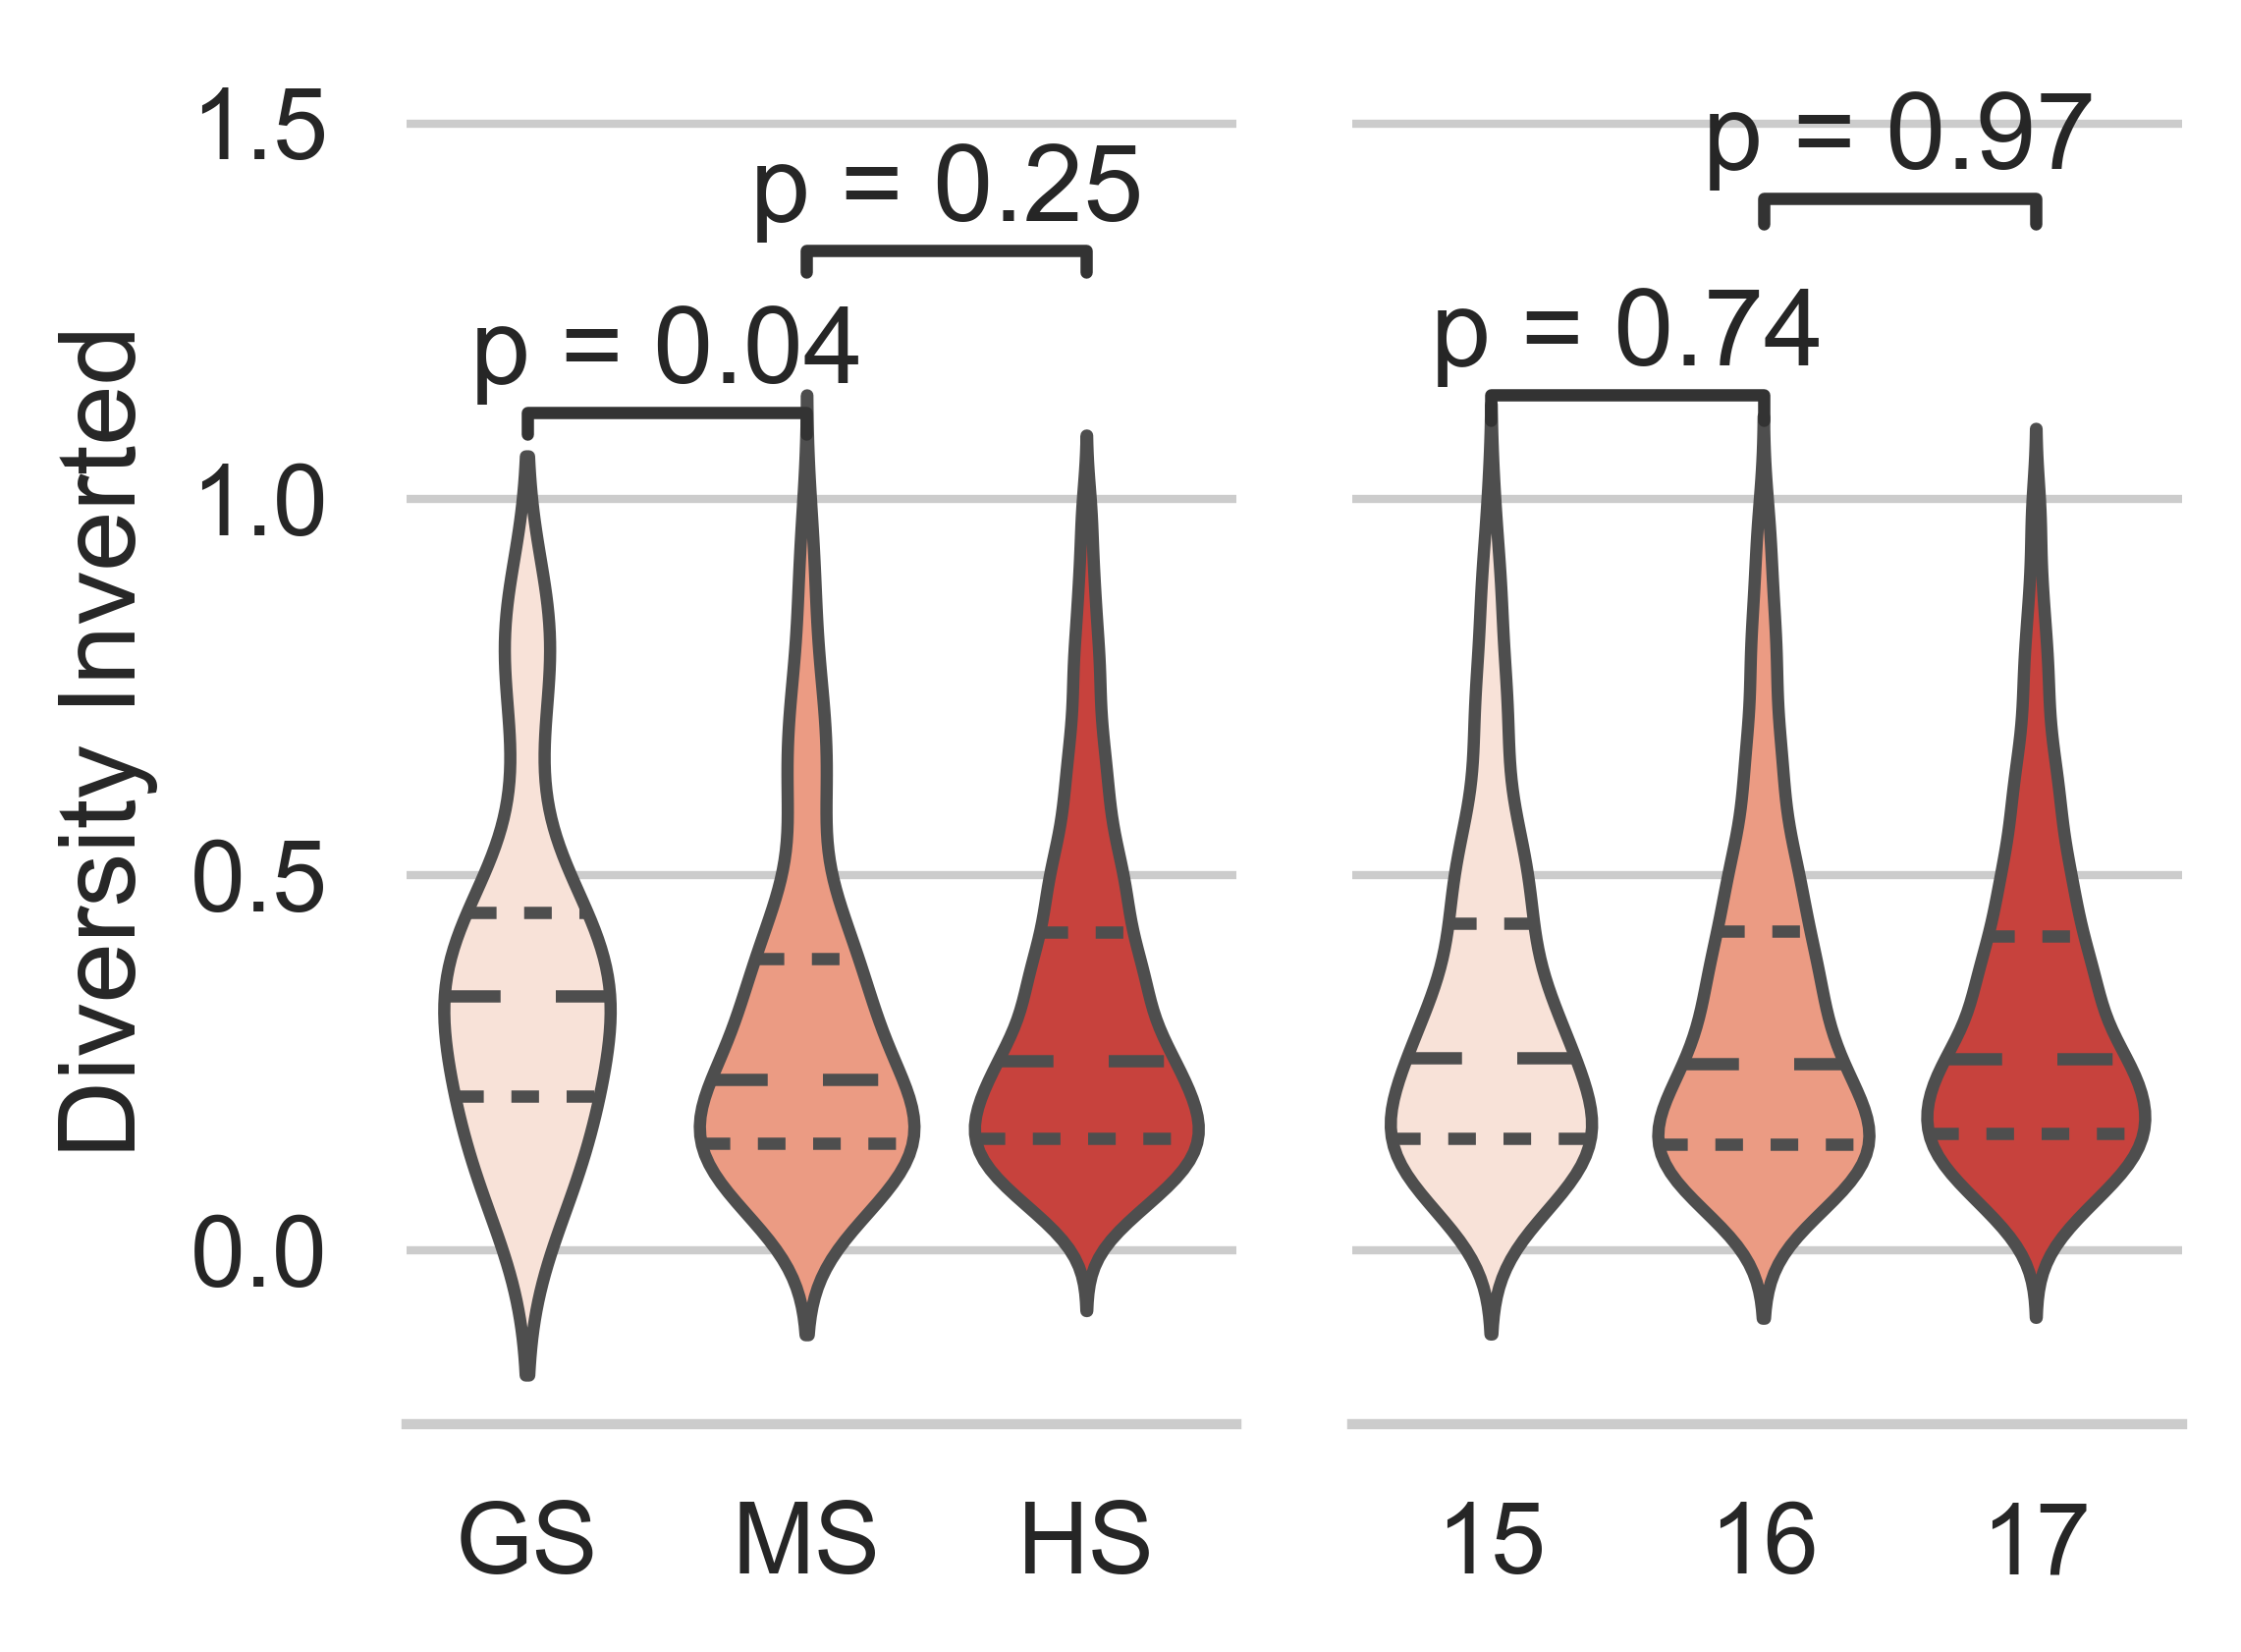

In [15]:
if (os.path.exists('../output/') == False):
    os.makedirs('../output/')

for column in data.columns:
    if (column == 'Education Level' or column == 'User Id' or column == 'Age'):
        continue

    fig, axs = plt.subplots(ncols = 2, figsize=figureSize, sharey = True, dpi = dpi)
    g = sns.boxplot(x = 'Education Level', y = column, data = data, ax = axs[0])
    g.set(xlabel = None)

    test_results = add_stat_annotation(g, data = data, x = 'Education Level', y = column,
                                       box_pairs=pairwise(data['Education Level'].cat.categories),
                                       test='t-test_ind', text_format='simple',
                                       loc='inside', verbose=0, comparisons_correction=None)
    
    graphData = data[data['Education Level'] == 'HS']
    g = sns.boxplot(x = 'Age', y = column, data = graphData, ax = axs[1])

    test_results = add_stat_annotation(g, data = graphData, x = 'Age', y = column,
                                       box_pairs=pairwise(sorted(graphData['Age'].unique())),
                                       test='t-test_ind', text_format='simple',
                                       loc='inside', verbose=0, comparisons_correction=None)
    
    g.set(ylabel = None, xlabel = None)
    
    sns.despine(left = True)
    plt.tight_layout()
    plt.savefig('../output/' + column + fileFormat, bbox_inches='tight', pad_inches = padInches, dpi = dpi)
    plt.show();
    
    fig, axs = plt.subplots(ncols = 2, figsize=figureSize, sharey = True, dpi = dpi)
    g = sns.violinplot(x = 'Education Level', y = column, data = data, inner = 'quartile', ax = axs[0])
    g.set(xlabel = None)

    test_results = add_stat_annotation(g, data = data, x = 'Education Level', y = column,
                                       box_pairs=pairwise(data['Education Level'].cat.categories),
                                       test='t-test_ind', text_format='simple',
                                       loc='inside', verbose=0, comparisons_correction=None)
    
    graphData = data[data['Education Level'] == 'HS']
    g = sns.violinplot(x = 'Age', y = column, data = graphData, inner = 'quartile', ax = axs[1])

    test_results = add_stat_annotation(g, data = graphData, x = 'Age', y = column,
                                       box_pairs=pairwise(sorted(graphData['Age'].unique())),
                                       test='t-test_ind', text_format='simple',
                                       loc='inside', verbose=0, comparisons_correction=None)
    
    g.set(ylabel = None, xlabel = None)
    
    sns.despine(left = True)
    plt.tight_layout()
    plt.savefig('../output/' + column + '-violin' + fileFormat, bbox_inches='tight', pad_inches = padInches, dpi = dpi)
    plt.show();

## Novelty

### Preping Data

In [16]:
temp = pd.read_parquet('../data/LastFM1bKidUsers.gzip.parquet', columns = ['User Id', 'Education Level', 'Age'])
temp.head()

User Id Education Level  Age
0  2014225              GS   10
1  2484832              GS    6
2  2635077              GS   11
3  2921901              GS    6
4  3556768              MS   14

In [17]:
data = pd.read_parquet('../data/LastFM1bKidUsersAdditional.gzip.parquet', columns = ['User Id', 'Novelty Artist Avg Month'])
data.fillna(0, inplace = True)
data.head(5)

User Id  Novelty Artist Avg Month
0  2014225                  0.578795
1  2484832                  0.133756
2  2635077                  0.298200
3  2921901                  0.341162
4  3556768                  0.466205

In [18]:
data = data.merge(temp, on = 'User Id')
data

User Id  Novelty Artist Avg Month Education Level  Age
0      2014225                  0.578795              GS   10
1      2484832                  0.133756              GS    6
2      2635077                  0.298200              GS   11
3      2921901                  0.341162              GS    6
4      3556768                  0.466205              MS   14
...        ...                       ...             ...  ...
3411  50072414                  0.250000              MS   14
3412  50073544                  0.444444              HS   17
3413  50074162                  0.187500              HS   16
3414  50164546                  0.000000              HS   17
3415  50967444                  0.263945              HS   16

[3416 rows x 4 columns]

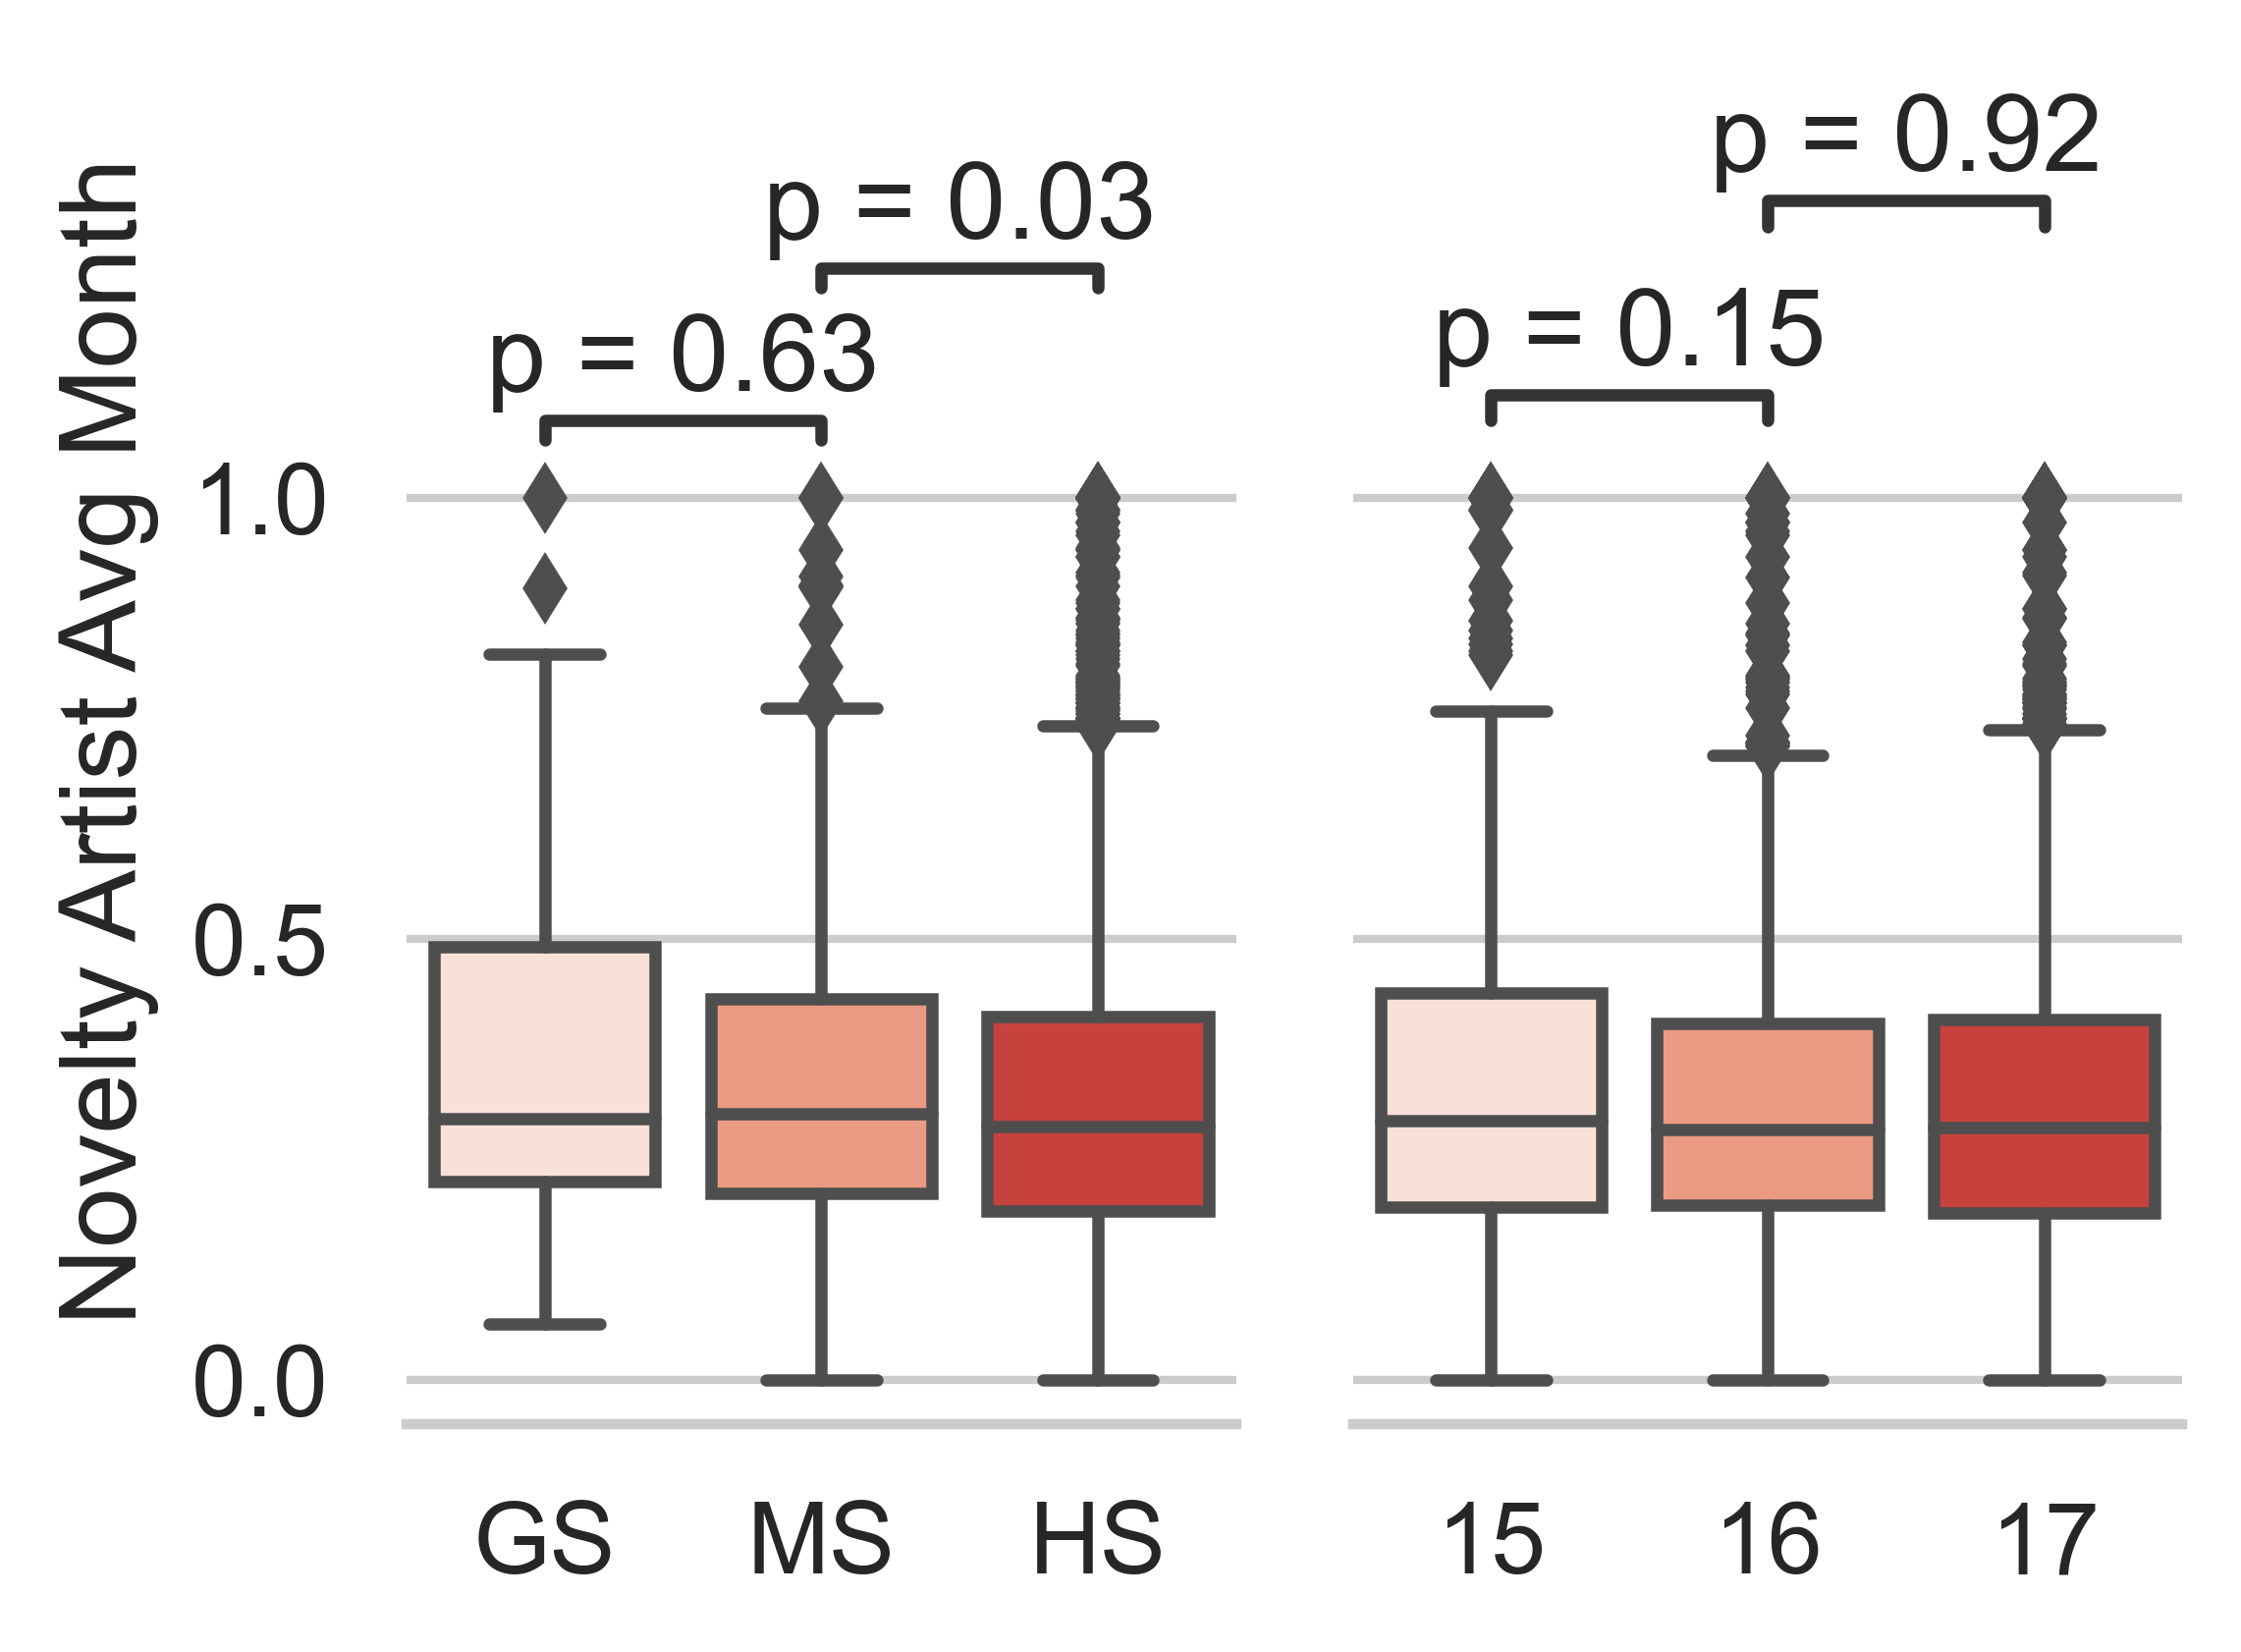

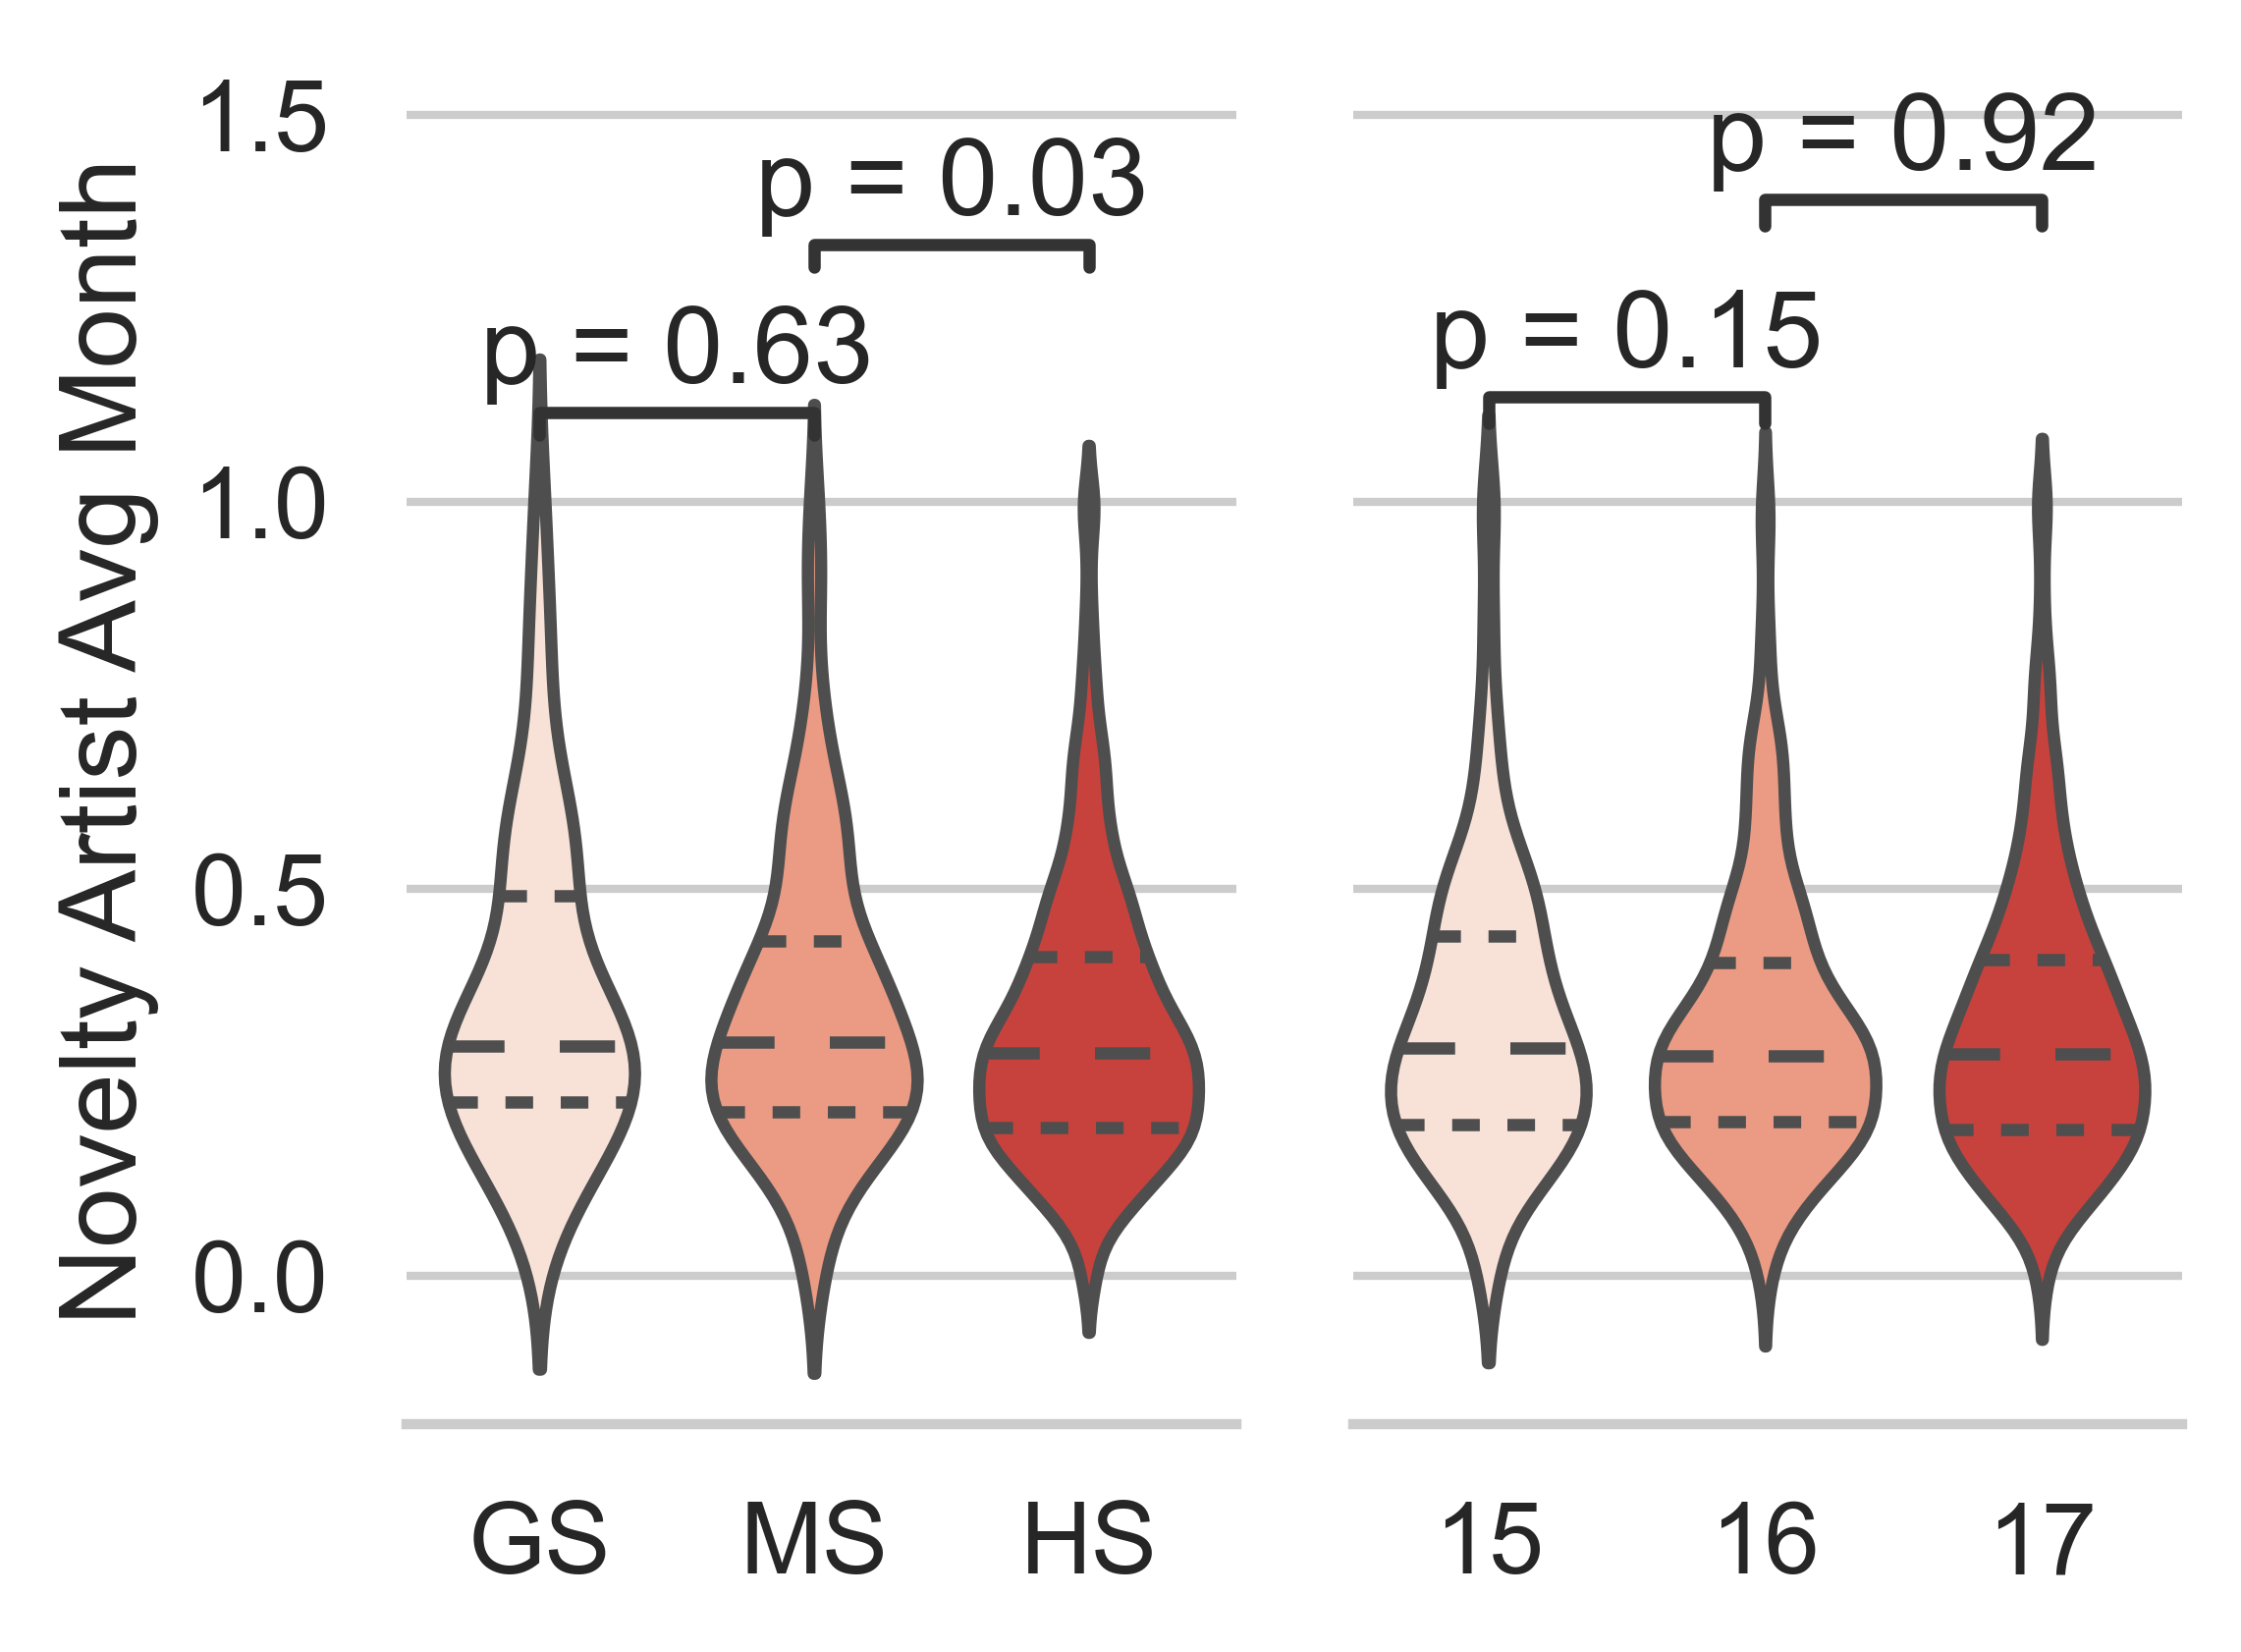

In [19]:
for column in data.columns:
    if (column == 'Education Level' or column == 'User Id' or column == 'Age'):
        continue

    fig, axs = plt.subplots(ncols = 2, figsize=figureSize, sharey = True, dpi = dpi)
    g = sns.boxplot(x = 'Education Level', y = column, data = data, ax = axs[0])
    g.set(xlabel = None)

    test_results = add_stat_annotation(g, data = data, x = 'Education Level', y = column,
                                       box_pairs=pairwise(data['Education Level'].cat.categories),
                                       test='t-test_ind', text_format='simple',
                                       loc='inside', verbose=0, comparisons_correction=None)
    
    graphData = data[data['Education Level'] == 'HS']
    g = sns.boxplot(x = 'Age', y = column, data = graphData, ax = axs[1])

    test_results = add_stat_annotation(g, data = graphData, x = 'Age', y = column,
                                       box_pairs=pairwise(sorted(graphData['Age'].unique())),
                                       test='t-test_ind', text_format='simple',
                                       loc='inside', verbose=0, comparisons_correction=None)
    
    g.set(ylabel = None, xlabel = None)
    
    sns.despine(left = True)
    plt.tight_layout()
    plt.savefig('../output/' + column + fileFormat, bbox_inches='tight', pad_inches = padInches, dpi = dpi)
    plt.show();
    
    fig, axs = plt.subplots(ncols = 2, figsize=figureSize, sharey = True, dpi = dpi)
    g = sns.violinplot(x = 'Education Level', y = column, data = data, inner = 'quartile', ax = axs[0])
    g.set(xlabel = None)

    test_results = add_stat_annotation(g, data = data, x = 'Education Level', y = column,
                                       box_pairs=pairwise(data['Education Level'].cat.categories),
                                       test='t-test_ind', text_format='simple',
                                       loc='inside', verbose=0, comparisons_correction=None)
    
    graphData = data[data['Education Level'] == 'HS']
    g = sns.violinplot(x = 'Age', y = column, data = graphData, inner = 'quartile', ax = axs[1])

    test_results = add_stat_annotation(g, data = graphData, x = 'Age', y = column,
                                       box_pairs=pairwise(sorted(graphData['Age'].unique())),
                                       test='t-test_ind', text_format='simple',
                                       loc='inside', verbose=0, comparisons_correction=None)
    
    g.set(ylabel = None, xlabel = None)
    
    sns.despine(left = True)
    plt.tight_layout()
    plt.savefig('../output/' + column + '-violin' + fileFormat, bbox_inches='tight', pad_inches = padInches, dpi = dpi)
    plt.show();

## Mainstreaminess

### Preping Data

In [20]:
temp = pd.read_parquet('../data/LastFM1bKidUsers.gzip.parquet', columns = ['User Id', 'Education Level', 'Age'])
temp.head()

User Id Education Level  Age
0  2014225              GS   10
1  2484832              GS    6
2  2635077              GS   11
3  2921901              GS    6
4  3556768              MS   14

In [21]:
data = pd.read_parquet('../data/LastFM1bKidUsersAdditional.gzip.parquet', columns = ['User Id', 'Mainstreaminess Avg Month'])
data.fillna(0, inplace = True)
data.head(5)

User Id  Mainstreaminess Avg Month
0  2014225                   0.178763
1  2484832                   0.134789
2  2635077                   0.148655
3  2921901                   0.106080
4  3556768                   0.077599

In [22]:
data = data.merge(temp, on = 'User Id')
data

User Id  Mainstreaminess Avg Month Education Level  Age
0      2014225                   0.178763              GS   10
1      2484832                   0.134789              GS    6
2      2635077                   0.148655              GS   11
3      2921901                   0.106080              GS    6
4      3556768                   0.077599              MS   14
...        ...                        ...             ...  ...
3411  50072414                   0.003672              MS   14
3412  50073544                   0.000000              HS   17
3413  50074162                   0.079494              HS   16
3414  50164546                   0.040971              HS   17
3415  50967444                   0.115332              HS   16

[3416 rows x 4 columns]

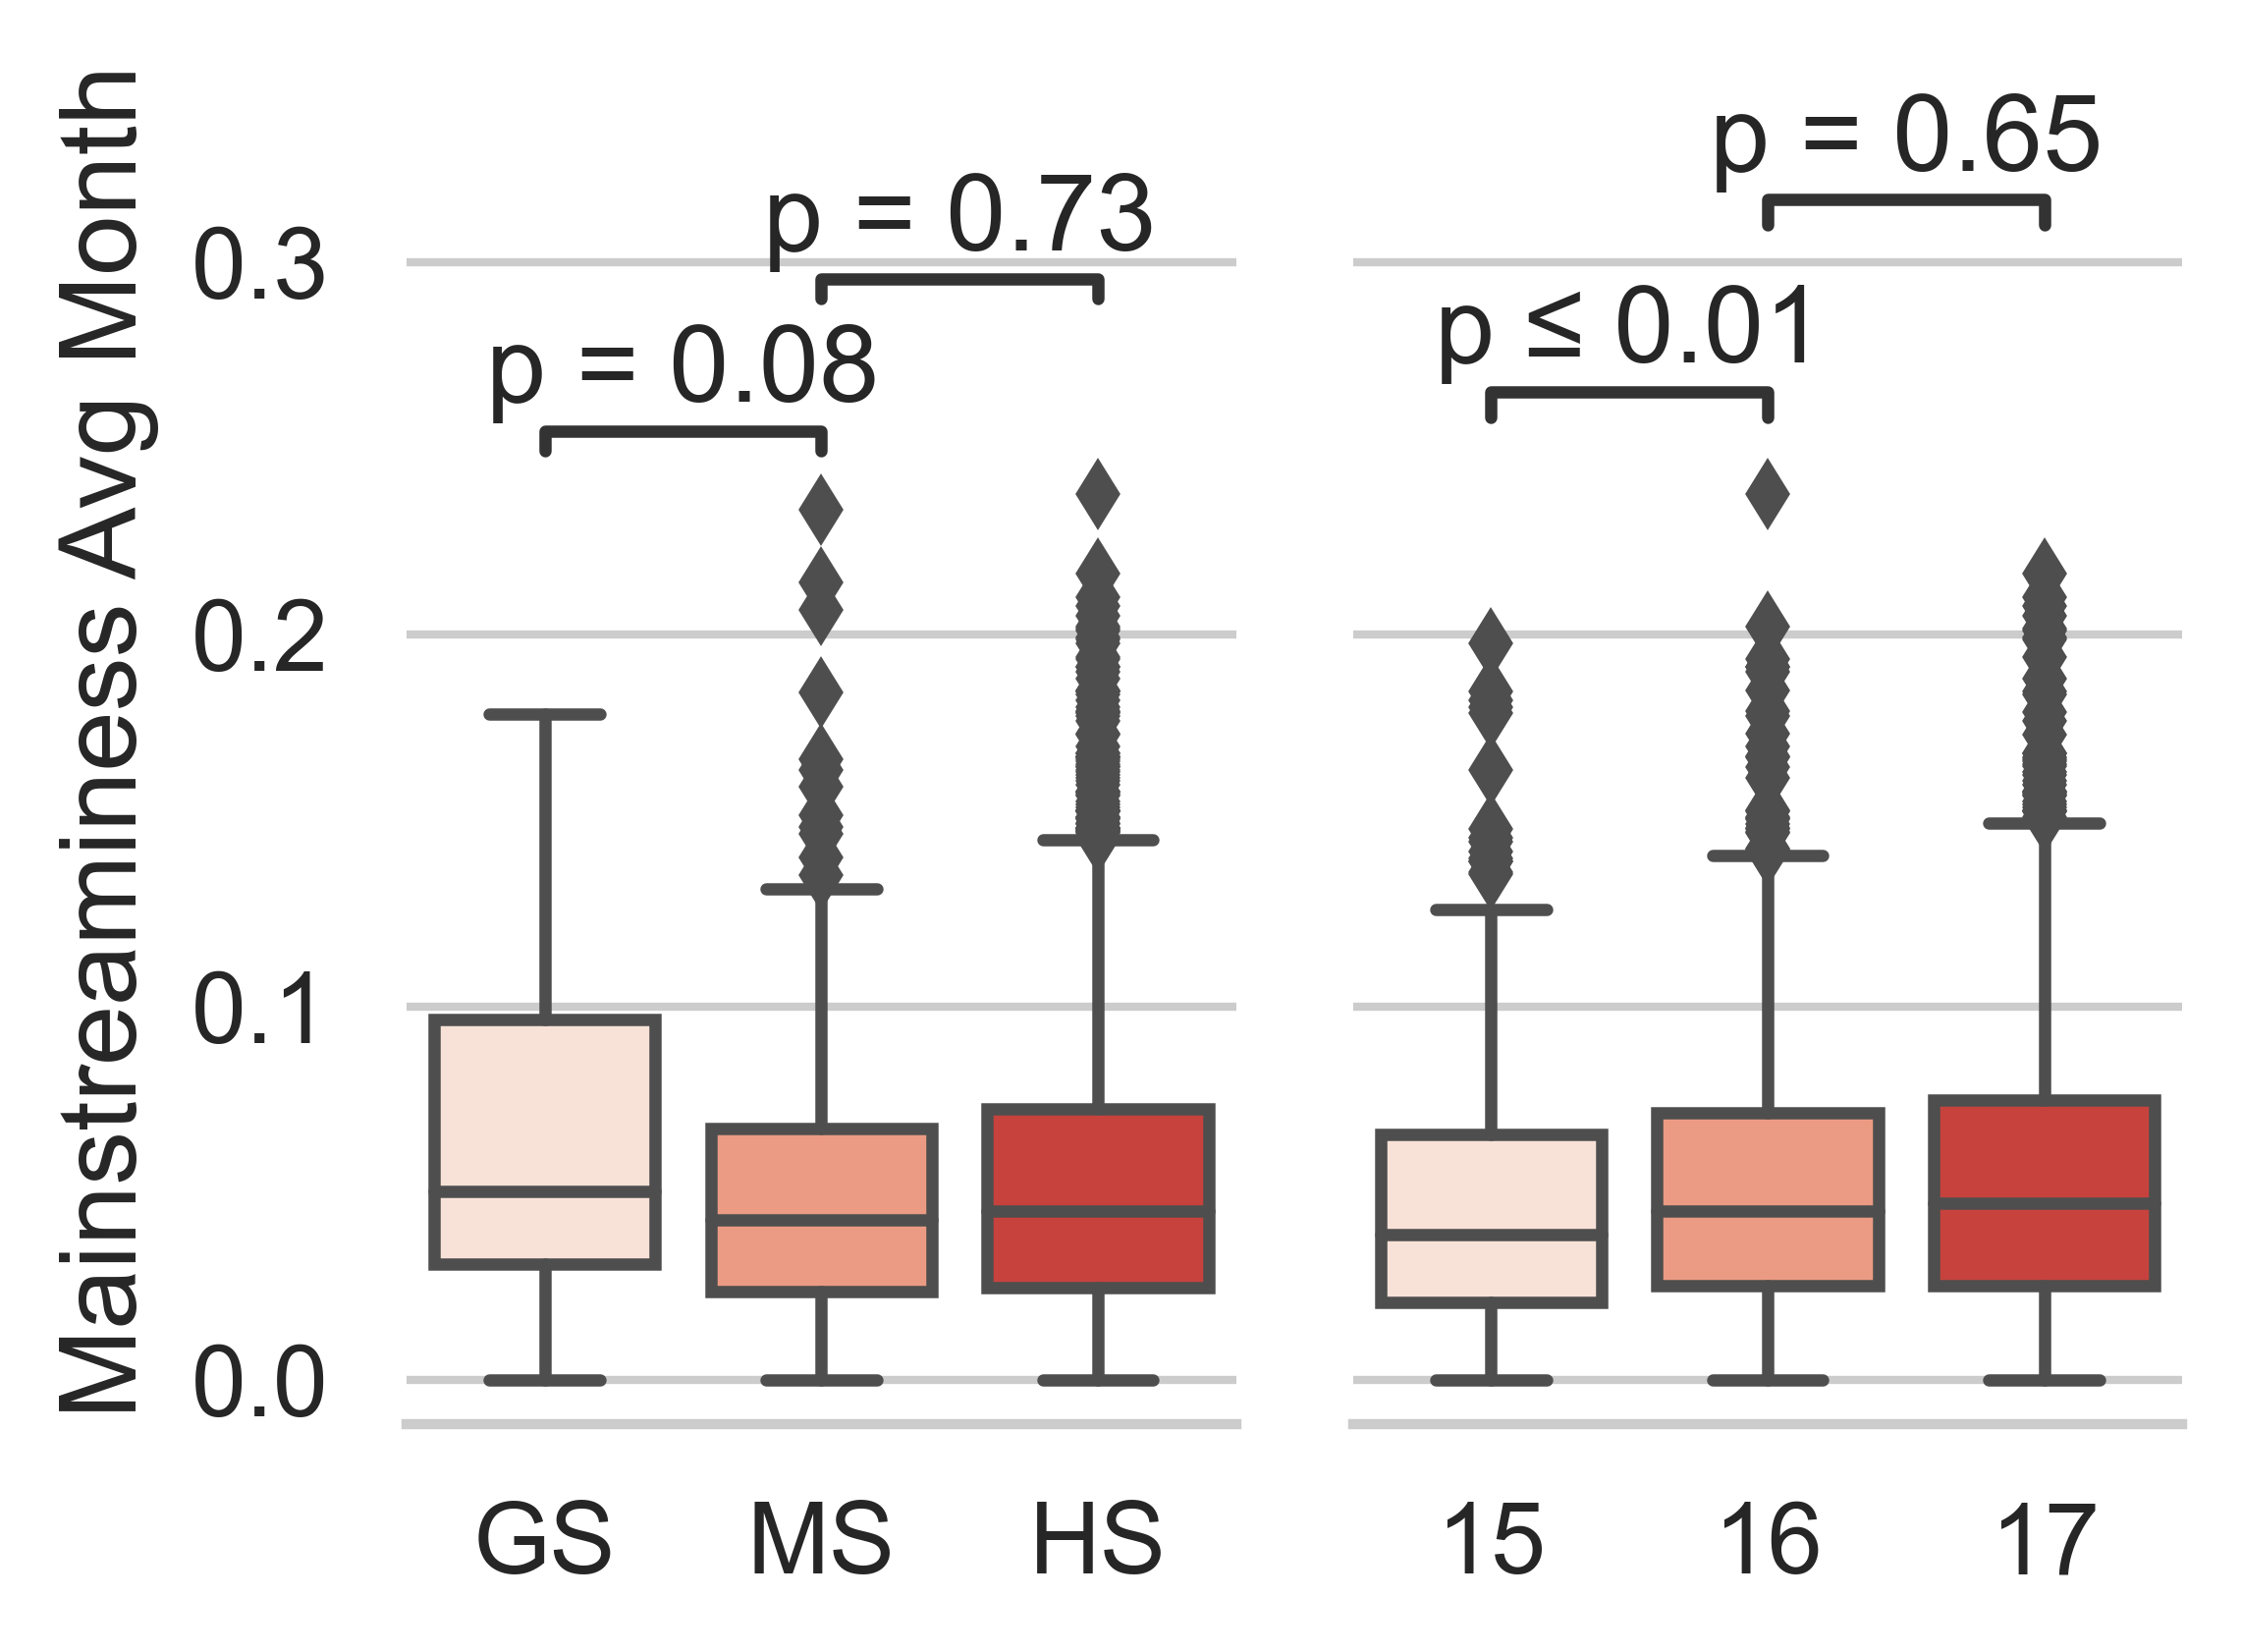

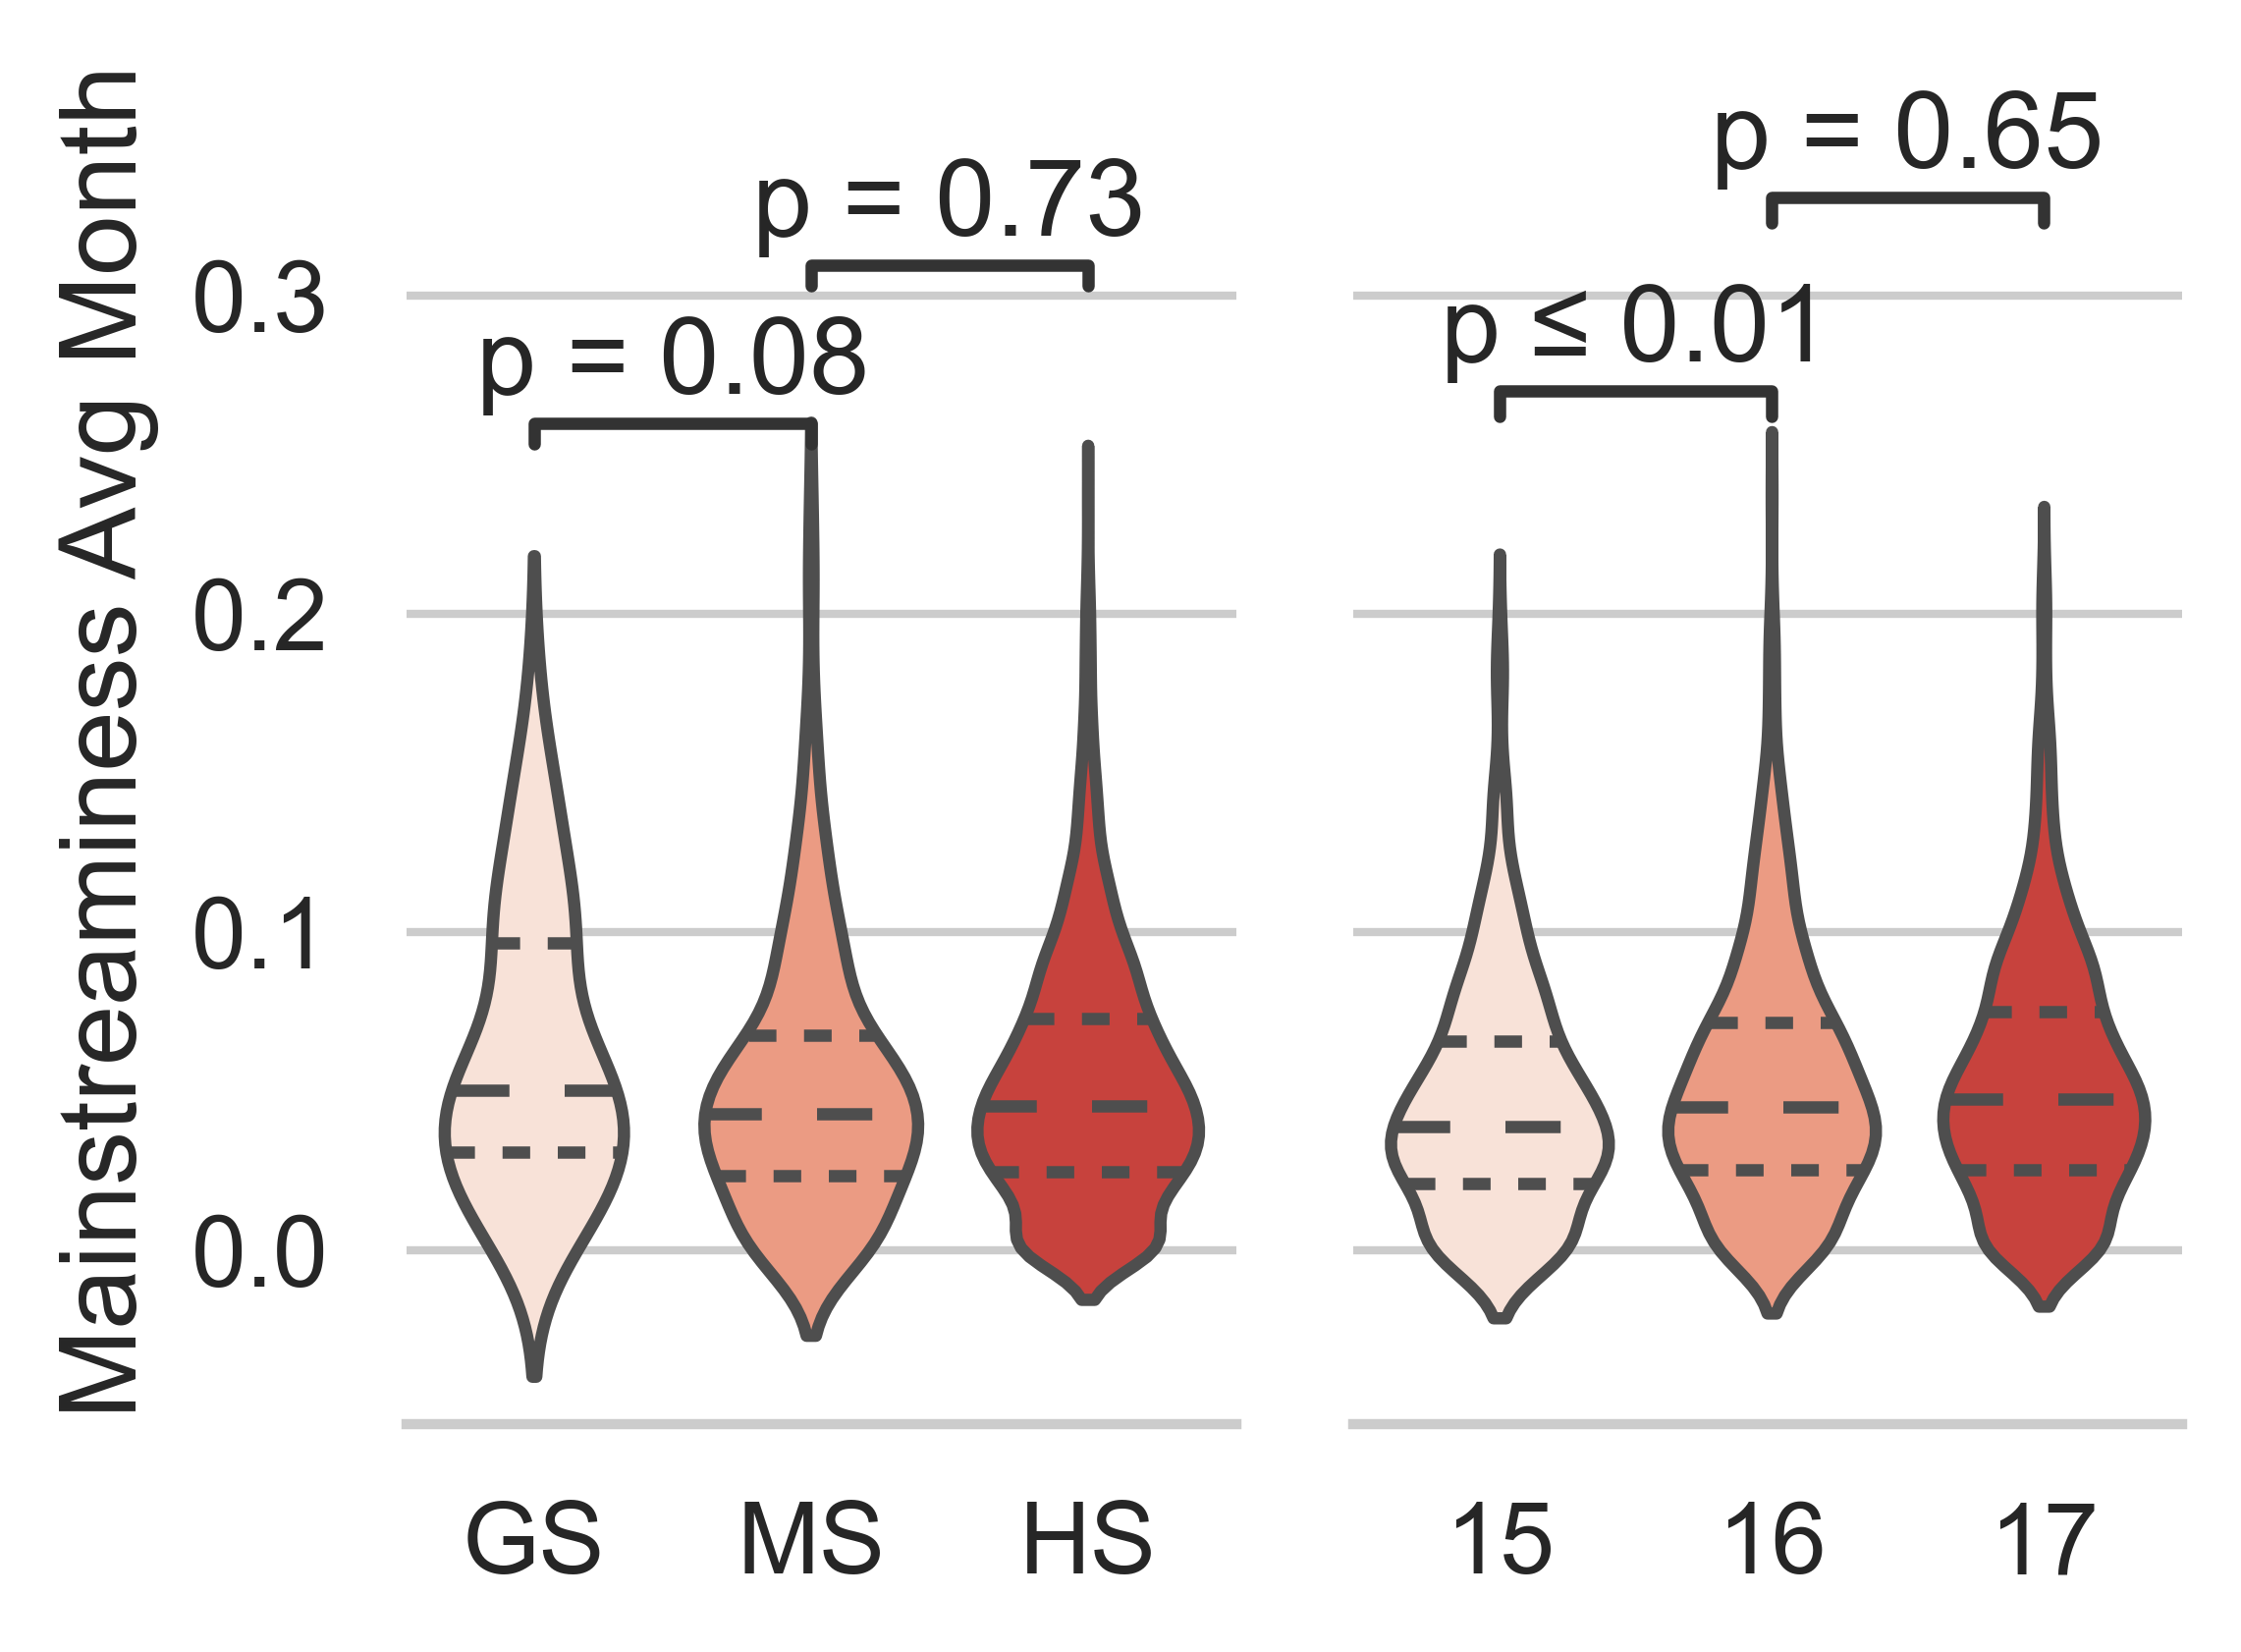

In [23]:
for column in data.columns:
    if (column == 'Education Level' or column == 'User Id' or column == 'Age'):
        continue

    fig, axs = plt.subplots(ncols = 2, figsize=figureSize, sharey = True, dpi = dpi)
    g = sns.boxplot(x = 'Education Level', y = column, data = data, ax = axs[0])
    g.set(xlabel = None)

    test_results = add_stat_annotation(g, data = data, x = 'Education Level', y = column,
                                       box_pairs=pairwise(data['Education Level'].cat.categories),
                                       test='t-test_ind', text_format='simple',
                                       loc='inside', verbose=0, comparisons_correction=None)
    
    graphData = data[data['Education Level'] == 'HS']
    g = sns.boxplot(x = 'Age', y = column, data = graphData, ax = axs[1])

    test_results = add_stat_annotation(g, data = graphData, x = 'Age', y = column,
                                       box_pairs=pairwise(sorted(graphData['Age'].unique())),
                                       test='t-test_ind', text_format='simple',
                                       loc='inside', verbose=0, comparisons_correction=None)
    
    g.set(ylabel = None, xlabel = None)
    
    sns.despine(left = True)
    plt.tight_layout()
    plt.savefig('../output/' + column + fileFormat, bbox_inches='tight', pad_inches = padInches, dpi = dpi)
    plt.show();
    
    fig, axs = plt.subplots(ncols = 2, figsize=figureSize, sharey = True, dpi = dpi)
    g = sns.violinplot(x = 'Education Level', y = column, data = data, inner = 'quartile', ax = axs[0])
    g.set(xlabel = None)

    test_results = add_stat_annotation(g, data = data, x = 'Education Level', y = column,
                                       box_pairs=pairwise(data['Education Level'].cat.categories),
                                       test='t-test_ind', text_format='simple',
                                       loc='inside', verbose=0, comparisons_correction=None)
    
    graphData = data[data['Education Level'] == 'HS']
    g = sns.violinplot(x = 'Age', y = column, data = graphData, inner = 'quartile', ax = axs[1])

    test_results = add_stat_annotation(g, data = graphData, x = 'Age', y = column,
                                       box_pairs=pairwise(sorted(graphData['Age'].unique())),
                                       test='t-test_ind', text_format='simple',
                                       loc='inside', verbose=0, comparisons_correction=None)
    
    g.set(ylabel = None, xlabel = None)
    
    sns.despine(left = True)
    plt.tight_layout()
    plt.savefig('../output/' + column + '-violin' + fileFormat, bbox_inches='tight', pad_inches = padInches, dpi = dpi)
    plt.show();

## Audio Features

### Prep Data

In [24]:
data = pd.read_parquet('../data/KidListeningEventsWithAudioFeatures.gzip.parquet')#, columns = ['Age', 'Education Level', 'User Id', 'Energy', 'Valence', 'Tempo'])
data.drop(columns = ['Artist Id', 'Album Id', 'Track Id', 'Event Unixtime', 'Artist', 'Album', 'Track', 'Key', 'Mode', 'Time Signature'], inplace = True)
data = data[data['Valence'].isna() == False]
data

Age Education Level   User Id  Danceability  Energy  Loudness  \
2          16              HS  15397460         0.442   0.739    -5.619   
3          16              HS  15397460         0.316   0.944    -4.815   
4          16              HS  15397460         0.496   0.962    -4.482   
5          16              HS  15397460         0.371   0.341    -9.475   
6          16              HS  15397460         0.519   0.964    -5.148   
...       ...             ...       ...           ...     ...       ...   
37096507   16              HS  47574621         0.513   0.858    -5.383   
37096509   16              HS  47574621         0.573   0.954    -4.210   
37096510   16              HS  47574621         0.487   0.742    -4.788   
37096512   16              HS  47574621         0.317   0.988    -2.848   
37096513   16              HS  47574621         0.368   0.888    -5.285   

          Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
2              0.0384      0.014800          0.154000    0.3680    0.112   
3              0.1740      0.000066          0.000000    0.1050    0.407   
4              0.2280      0.000018          0.000000    0.3330    0.552   
5              0.0319      0.570000          0.000031    0.1010    0.196   
6              0.2010      0.000763          0.000000    0.2020    0.381   
...               ...           ...               ...       ...      ...   
37096507       0.0423      0.001110          0.000000    0.3590    0.555   
37096509       0.0715      0.003030          0.000000    0.3490    0.755   
37096510       0.0355      0.000203          0.000000    0.1180    0.174   
37096512       0.2100      0.003810          0.013900    0.3170    0.184   
37096513       0.1340      0.000438          0.001440    0.0737    0.655   

            Tempo  Duration Ms  
2         134.019     252427.0  
3         180.104     185400.0  
4         139.956     191200.0  
5          89.038     367133.0  
6          94.981     241000.0  
...           ...          ...  
37096507  100.076     250880.0  
37096509   94.995     237907.0  
37096510  142.016     262667.0  
37096512  169.296     167916.0  
37096513  182.048     138667.0  

[21579859 rows x 13 columns]

### Graph

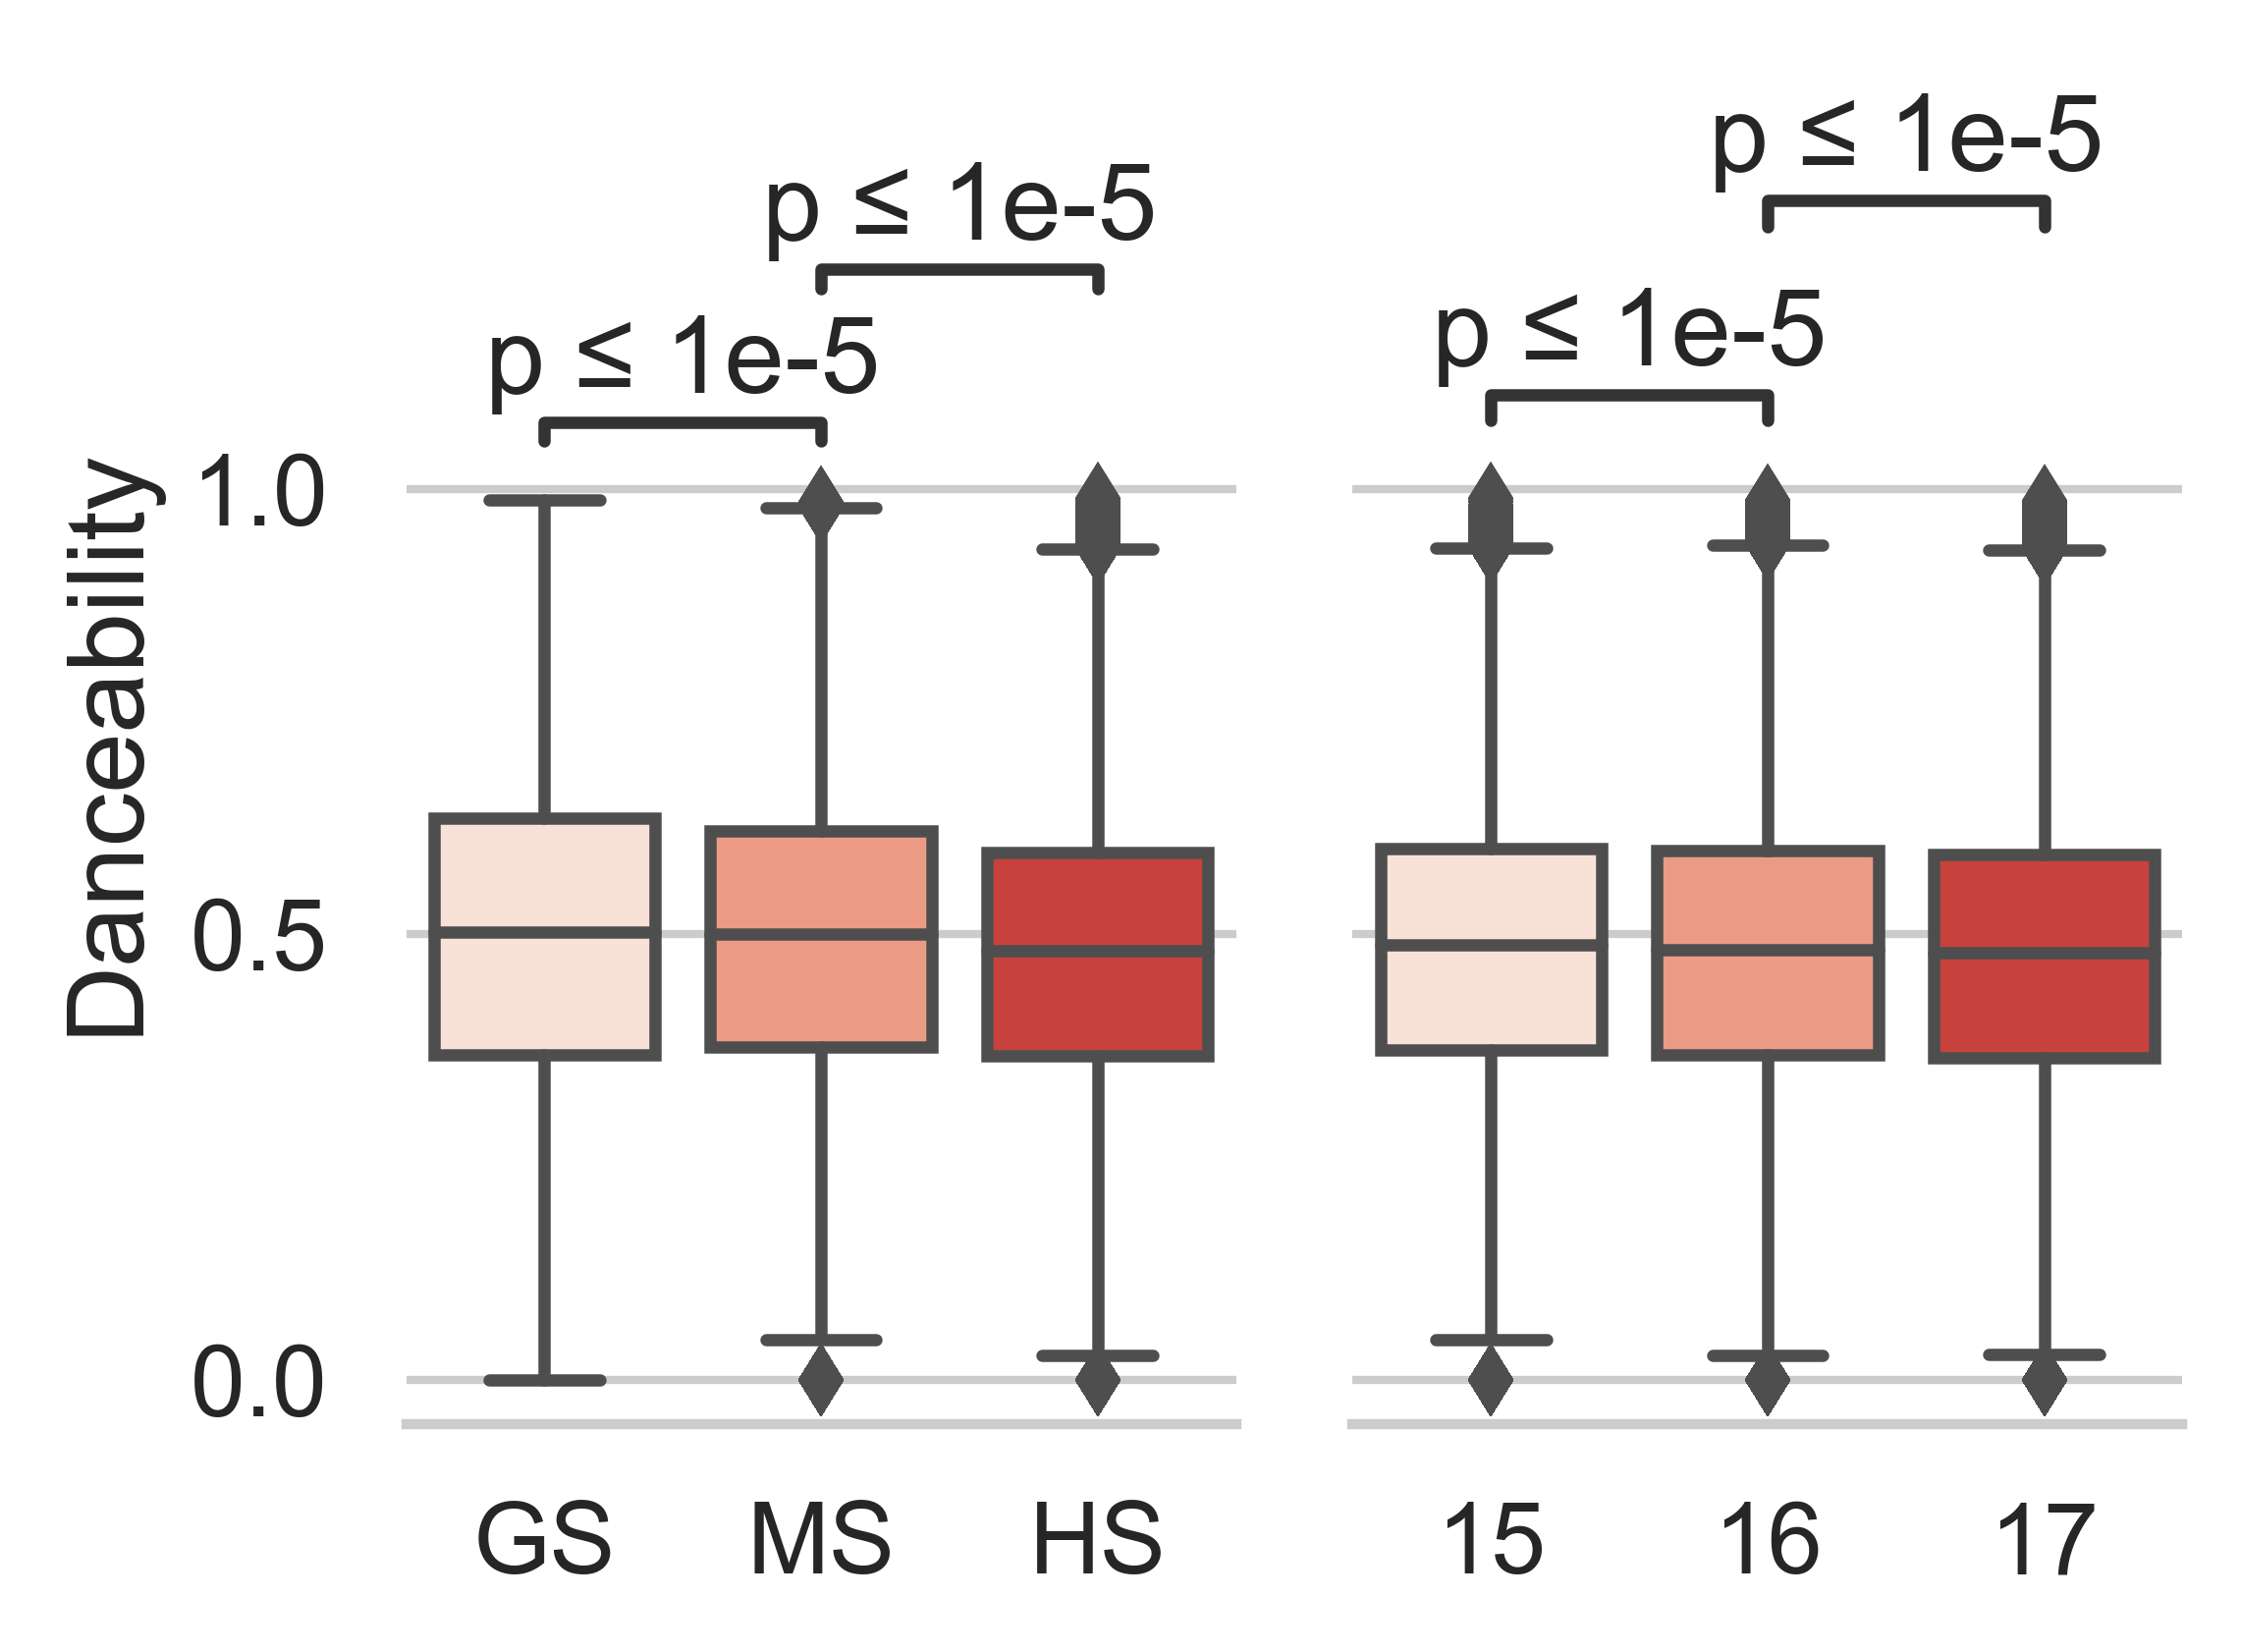

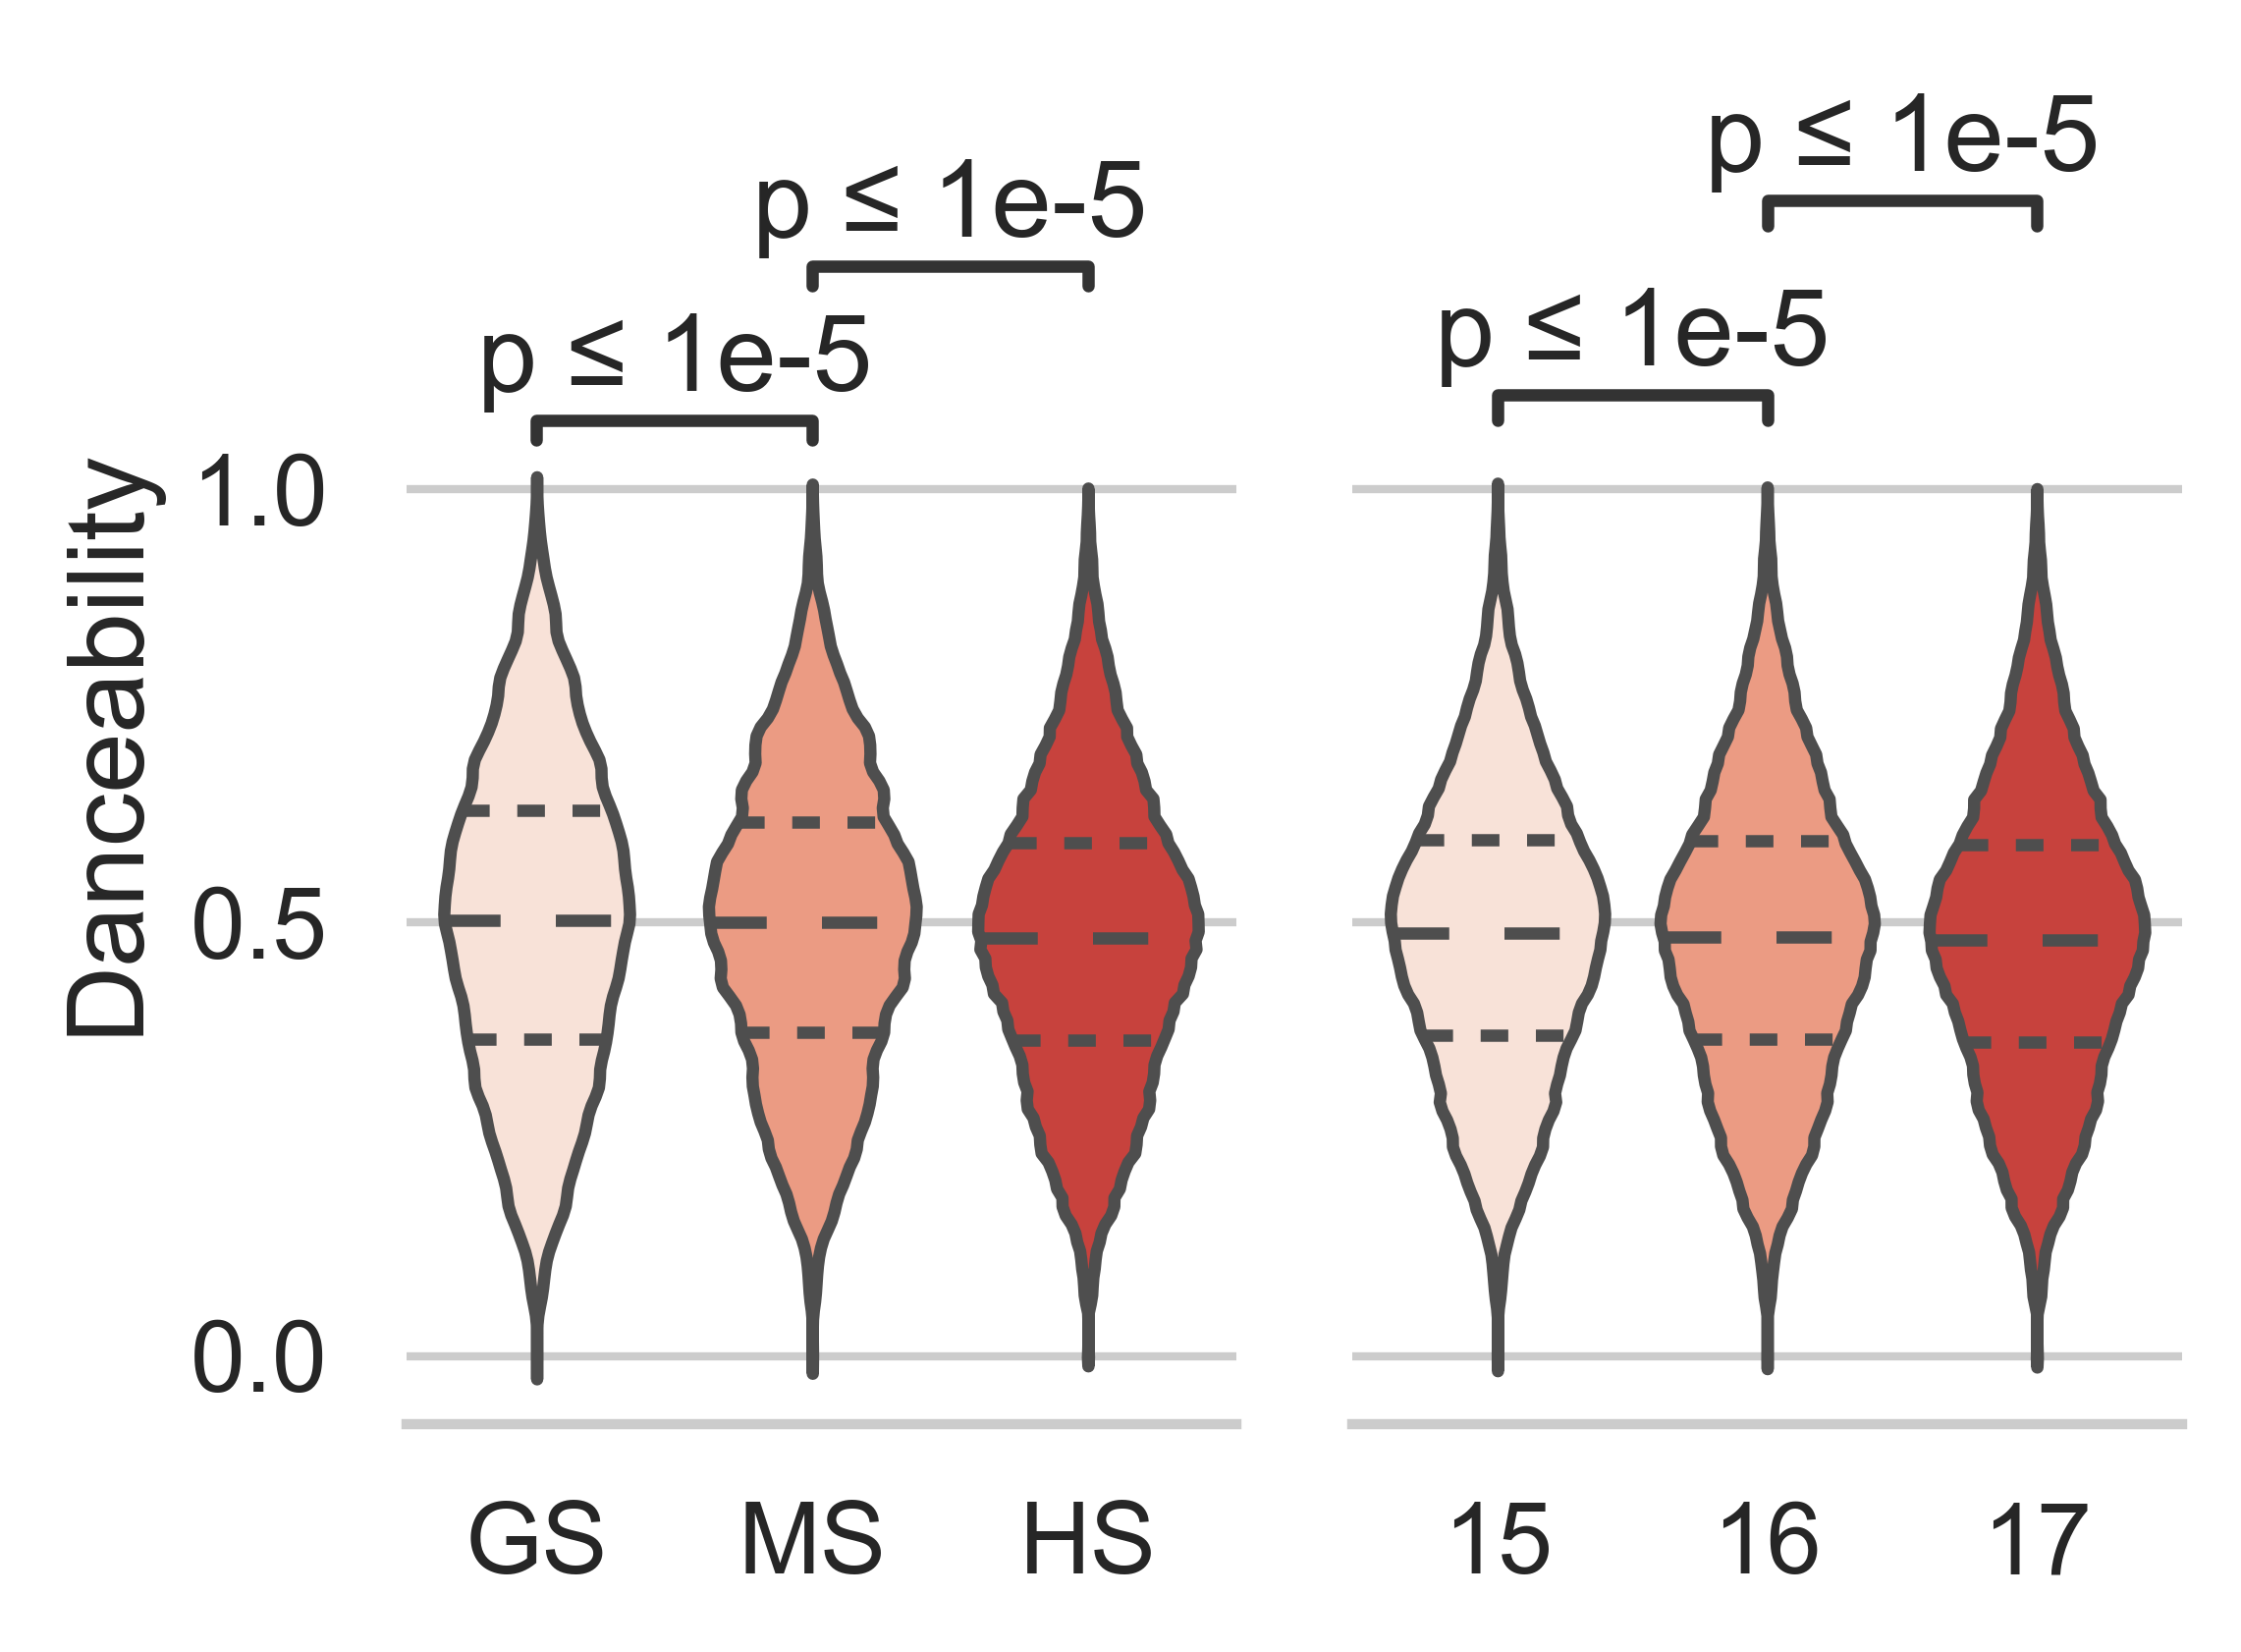

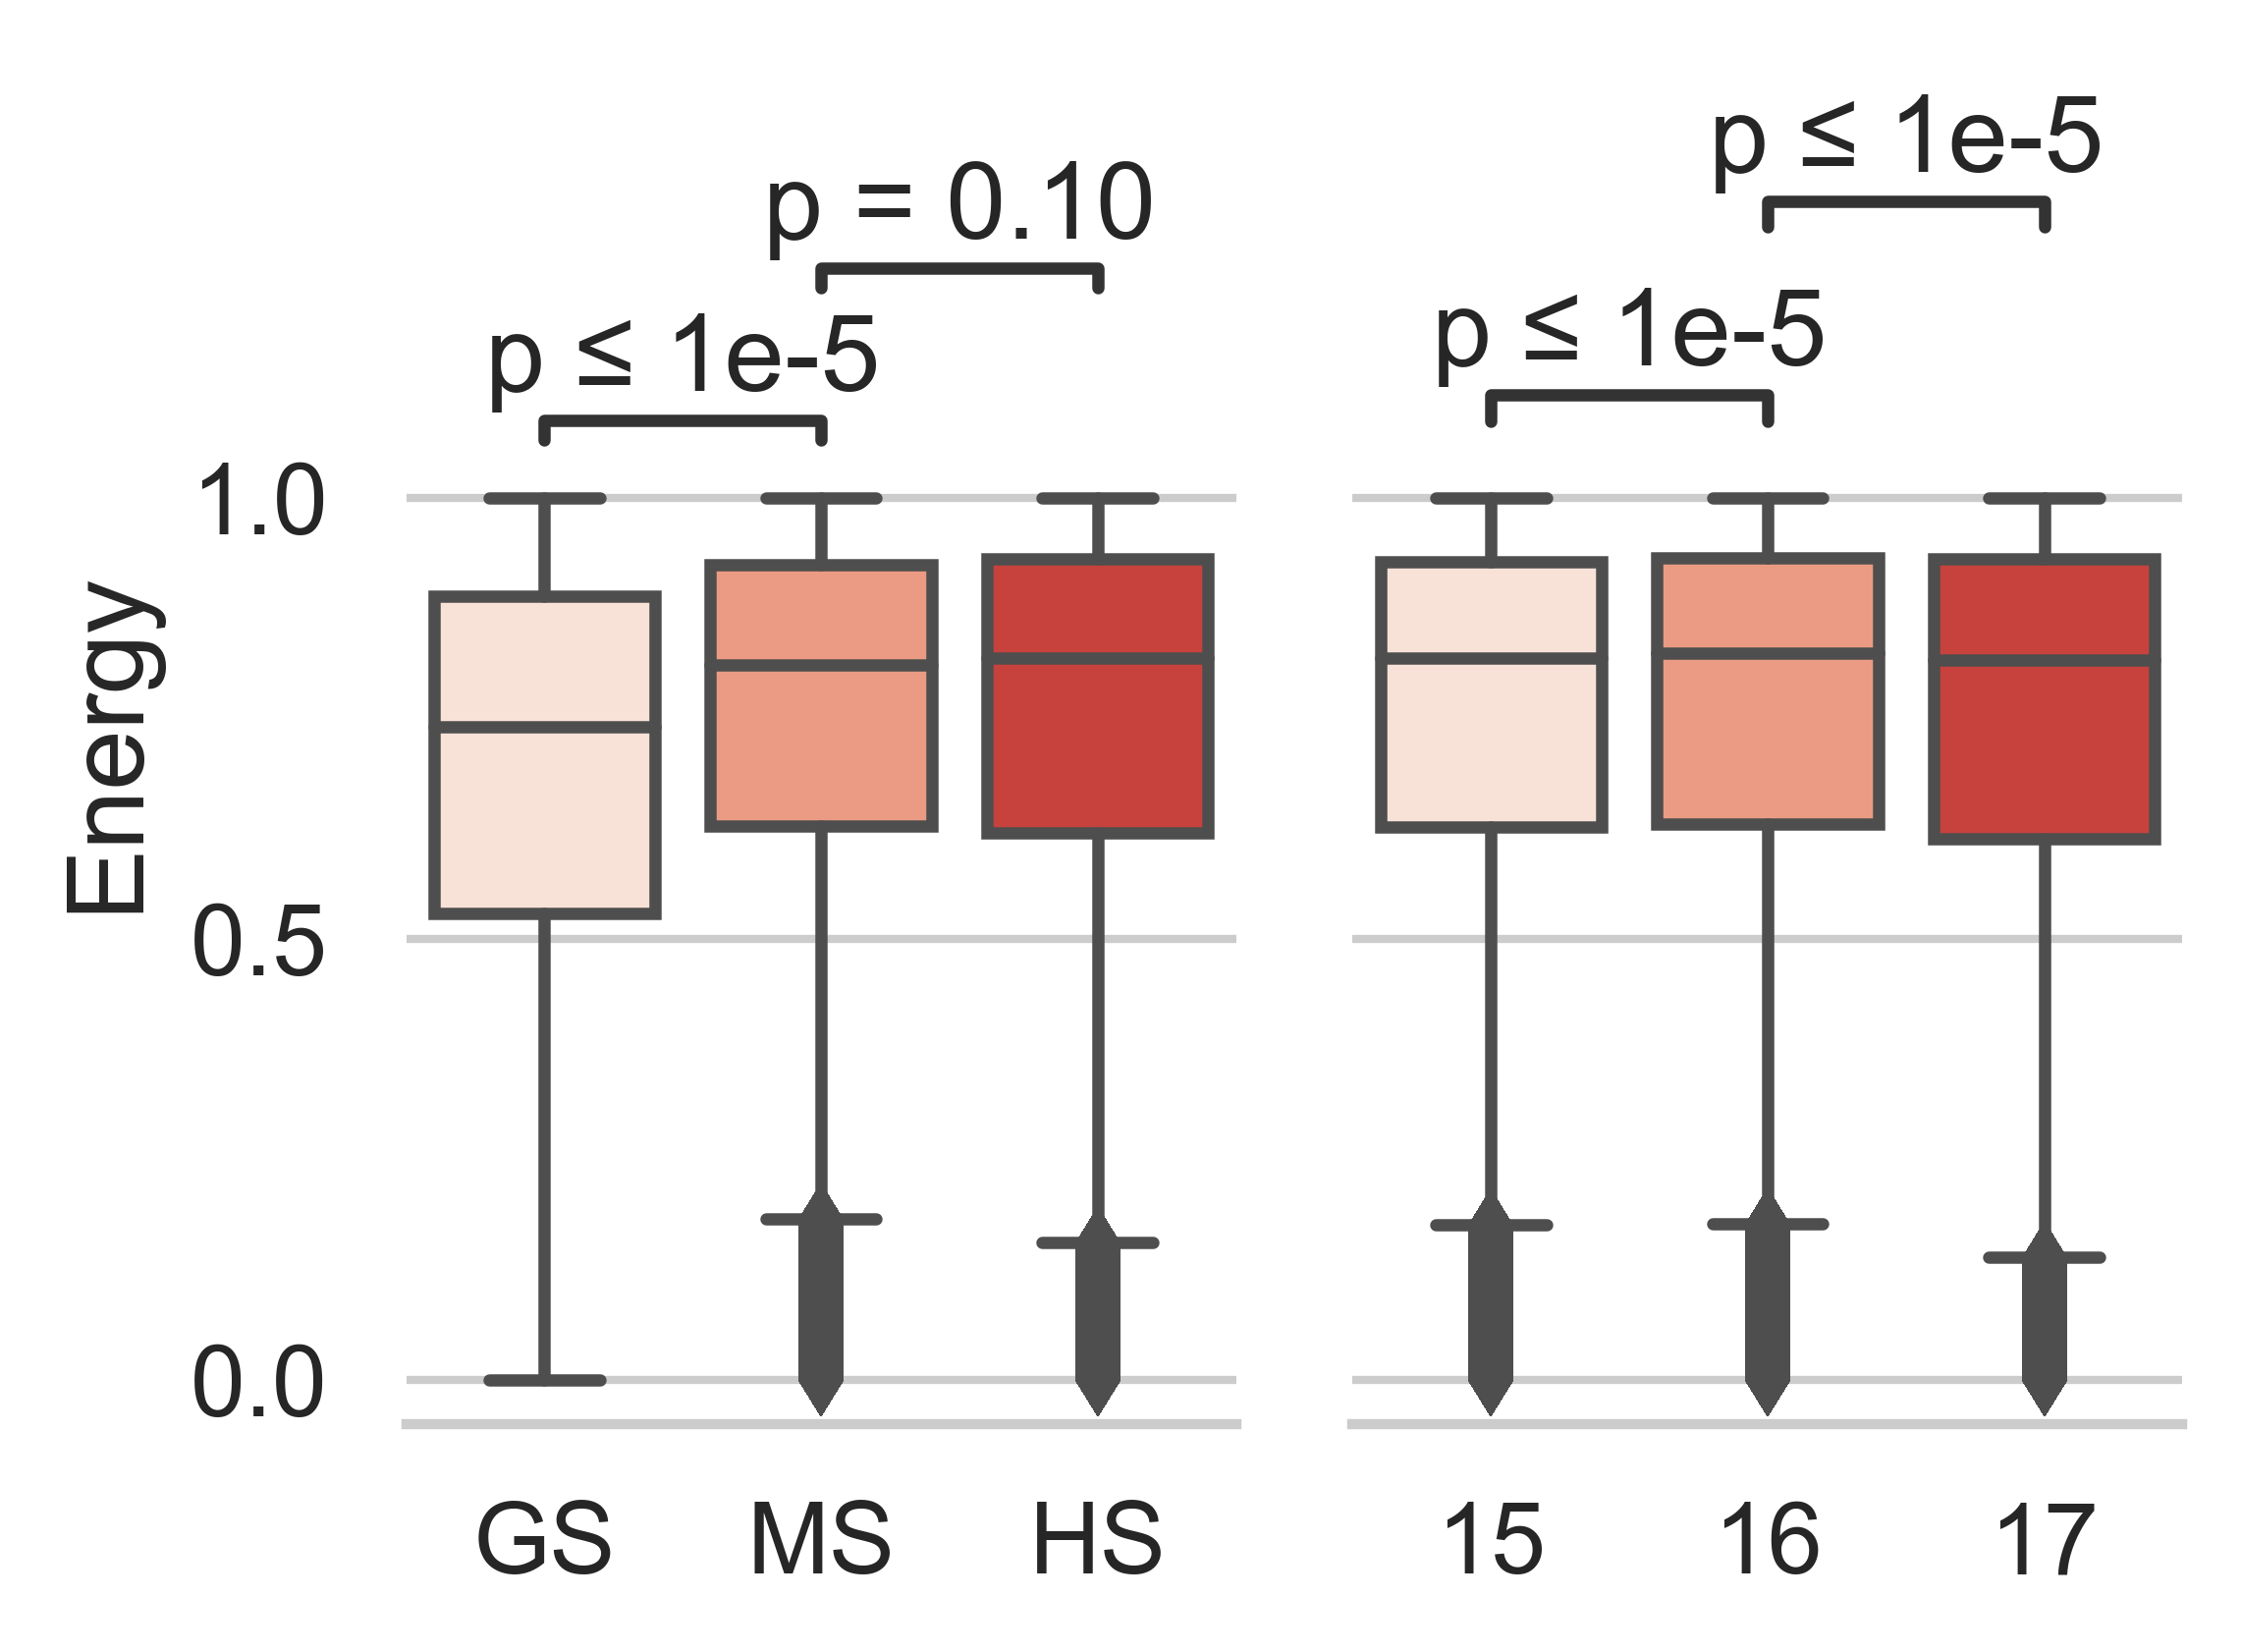

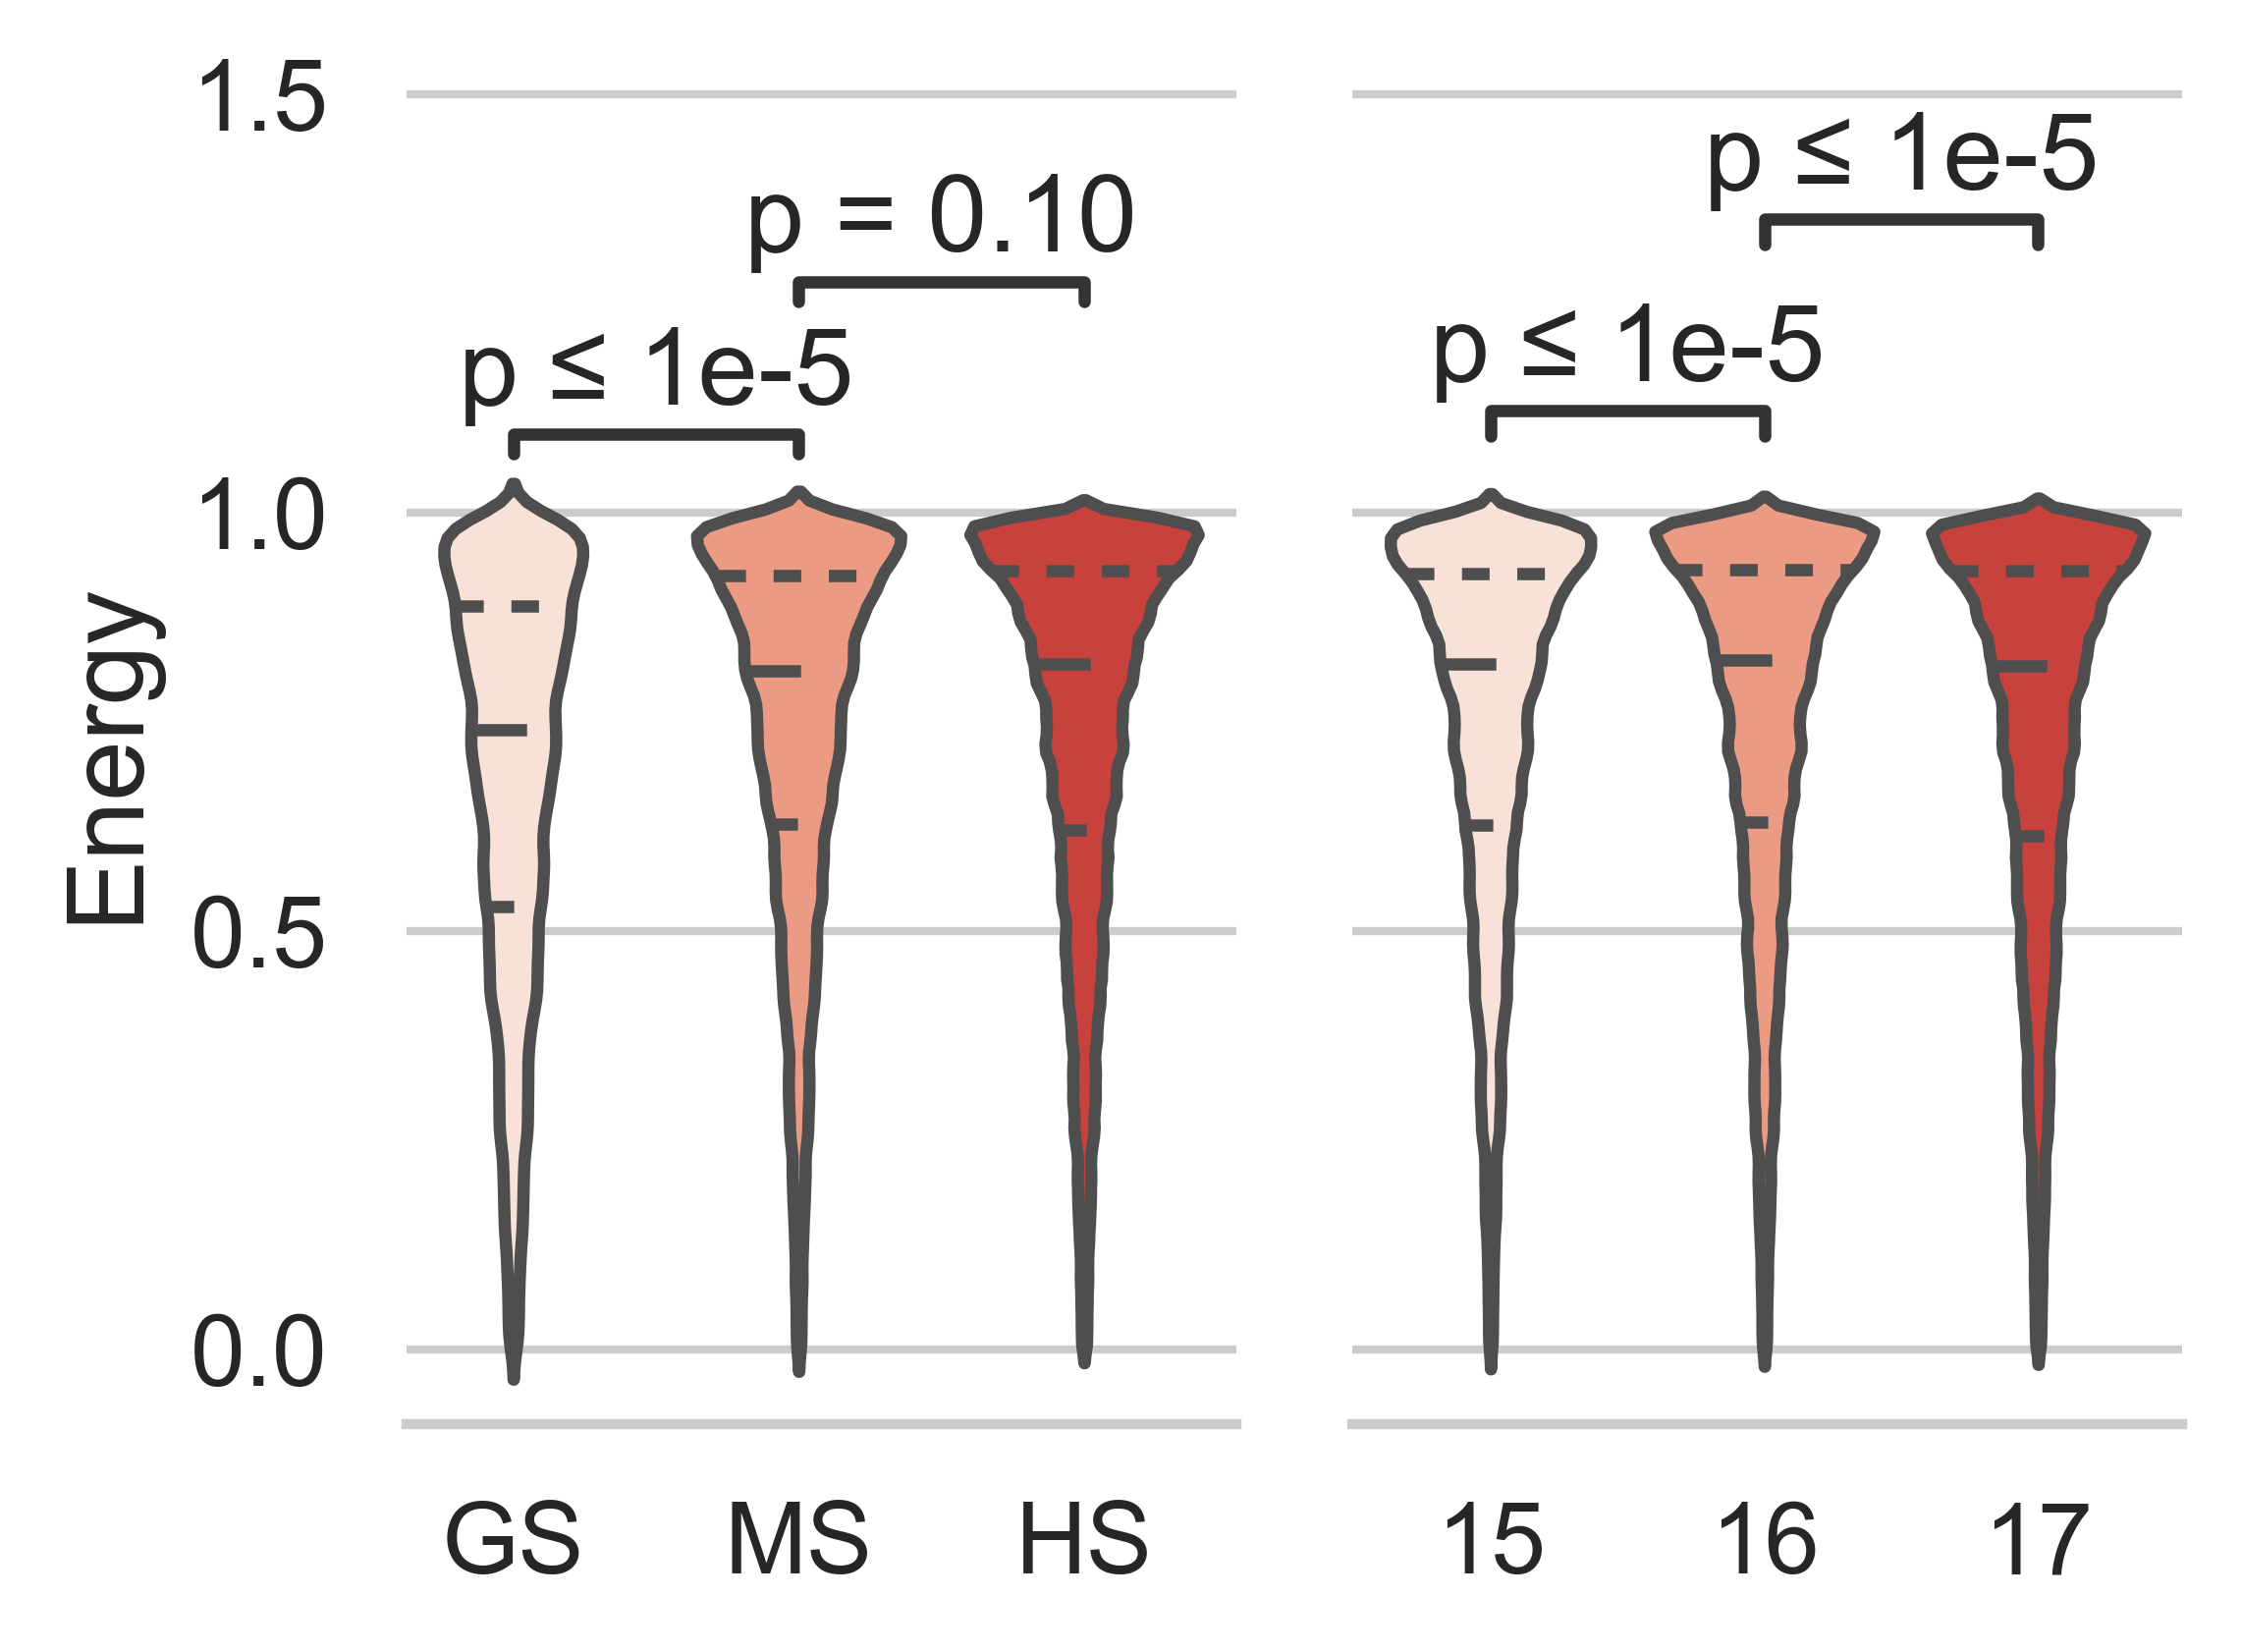

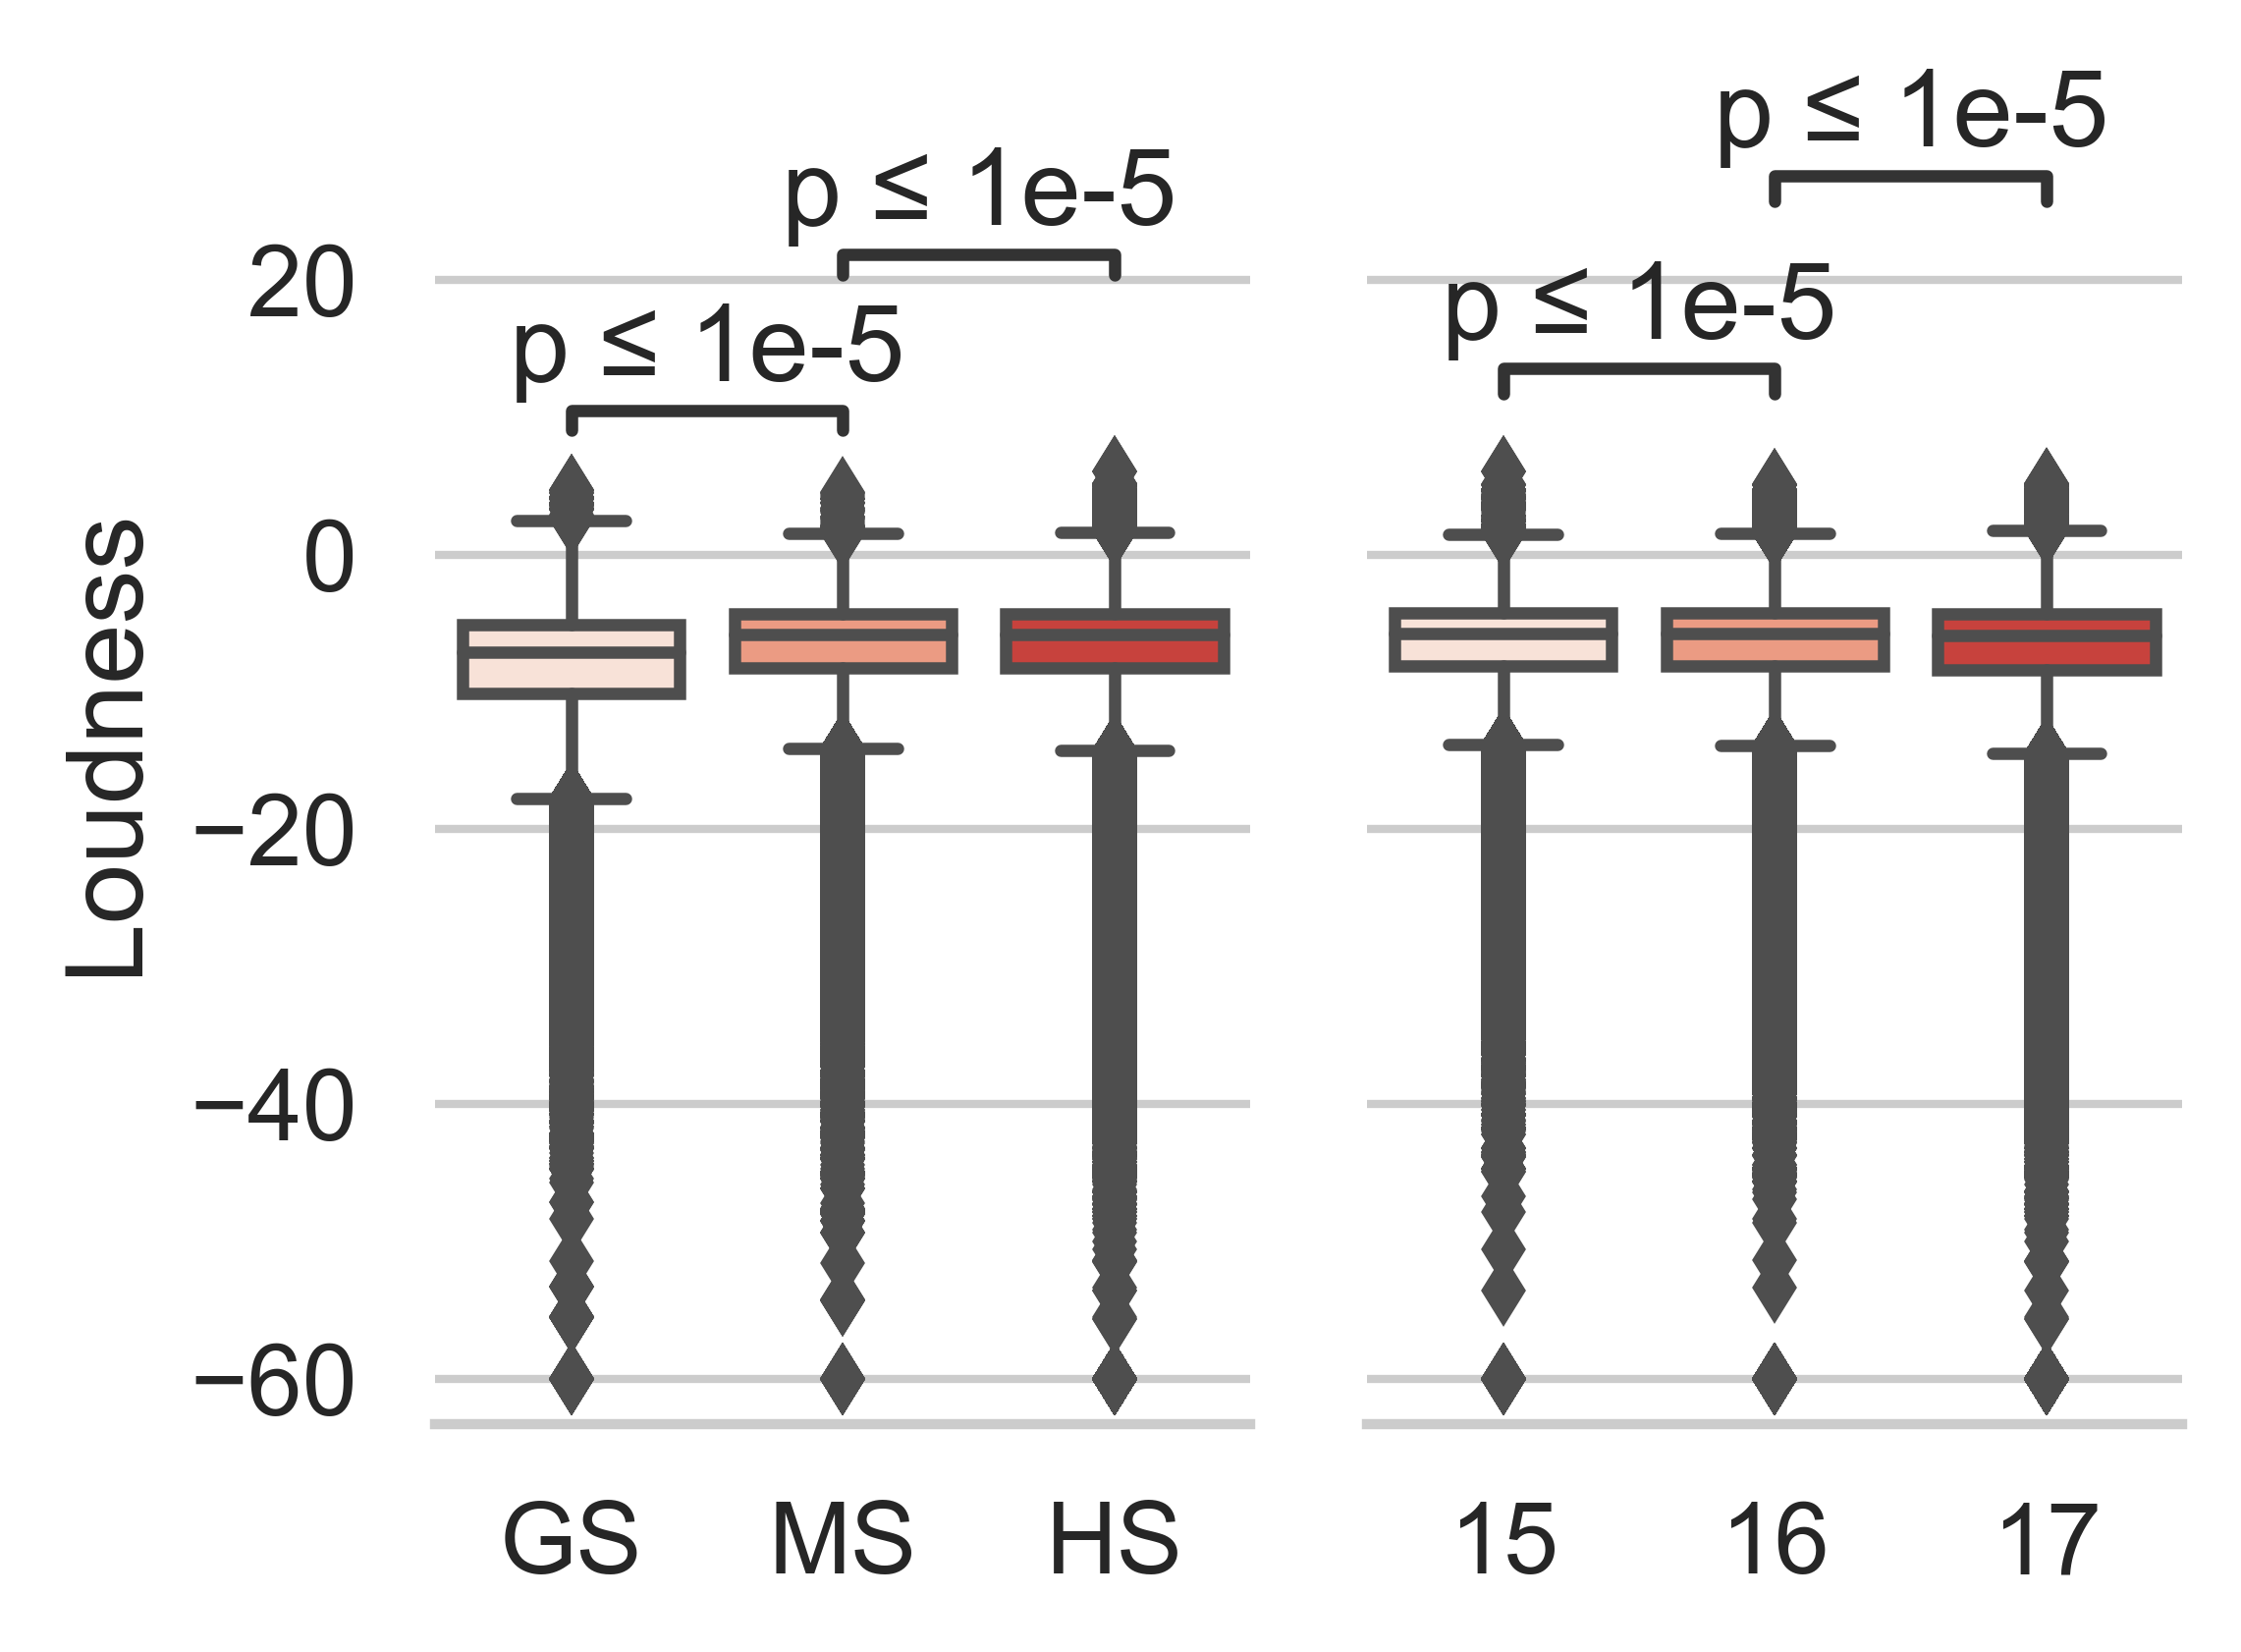

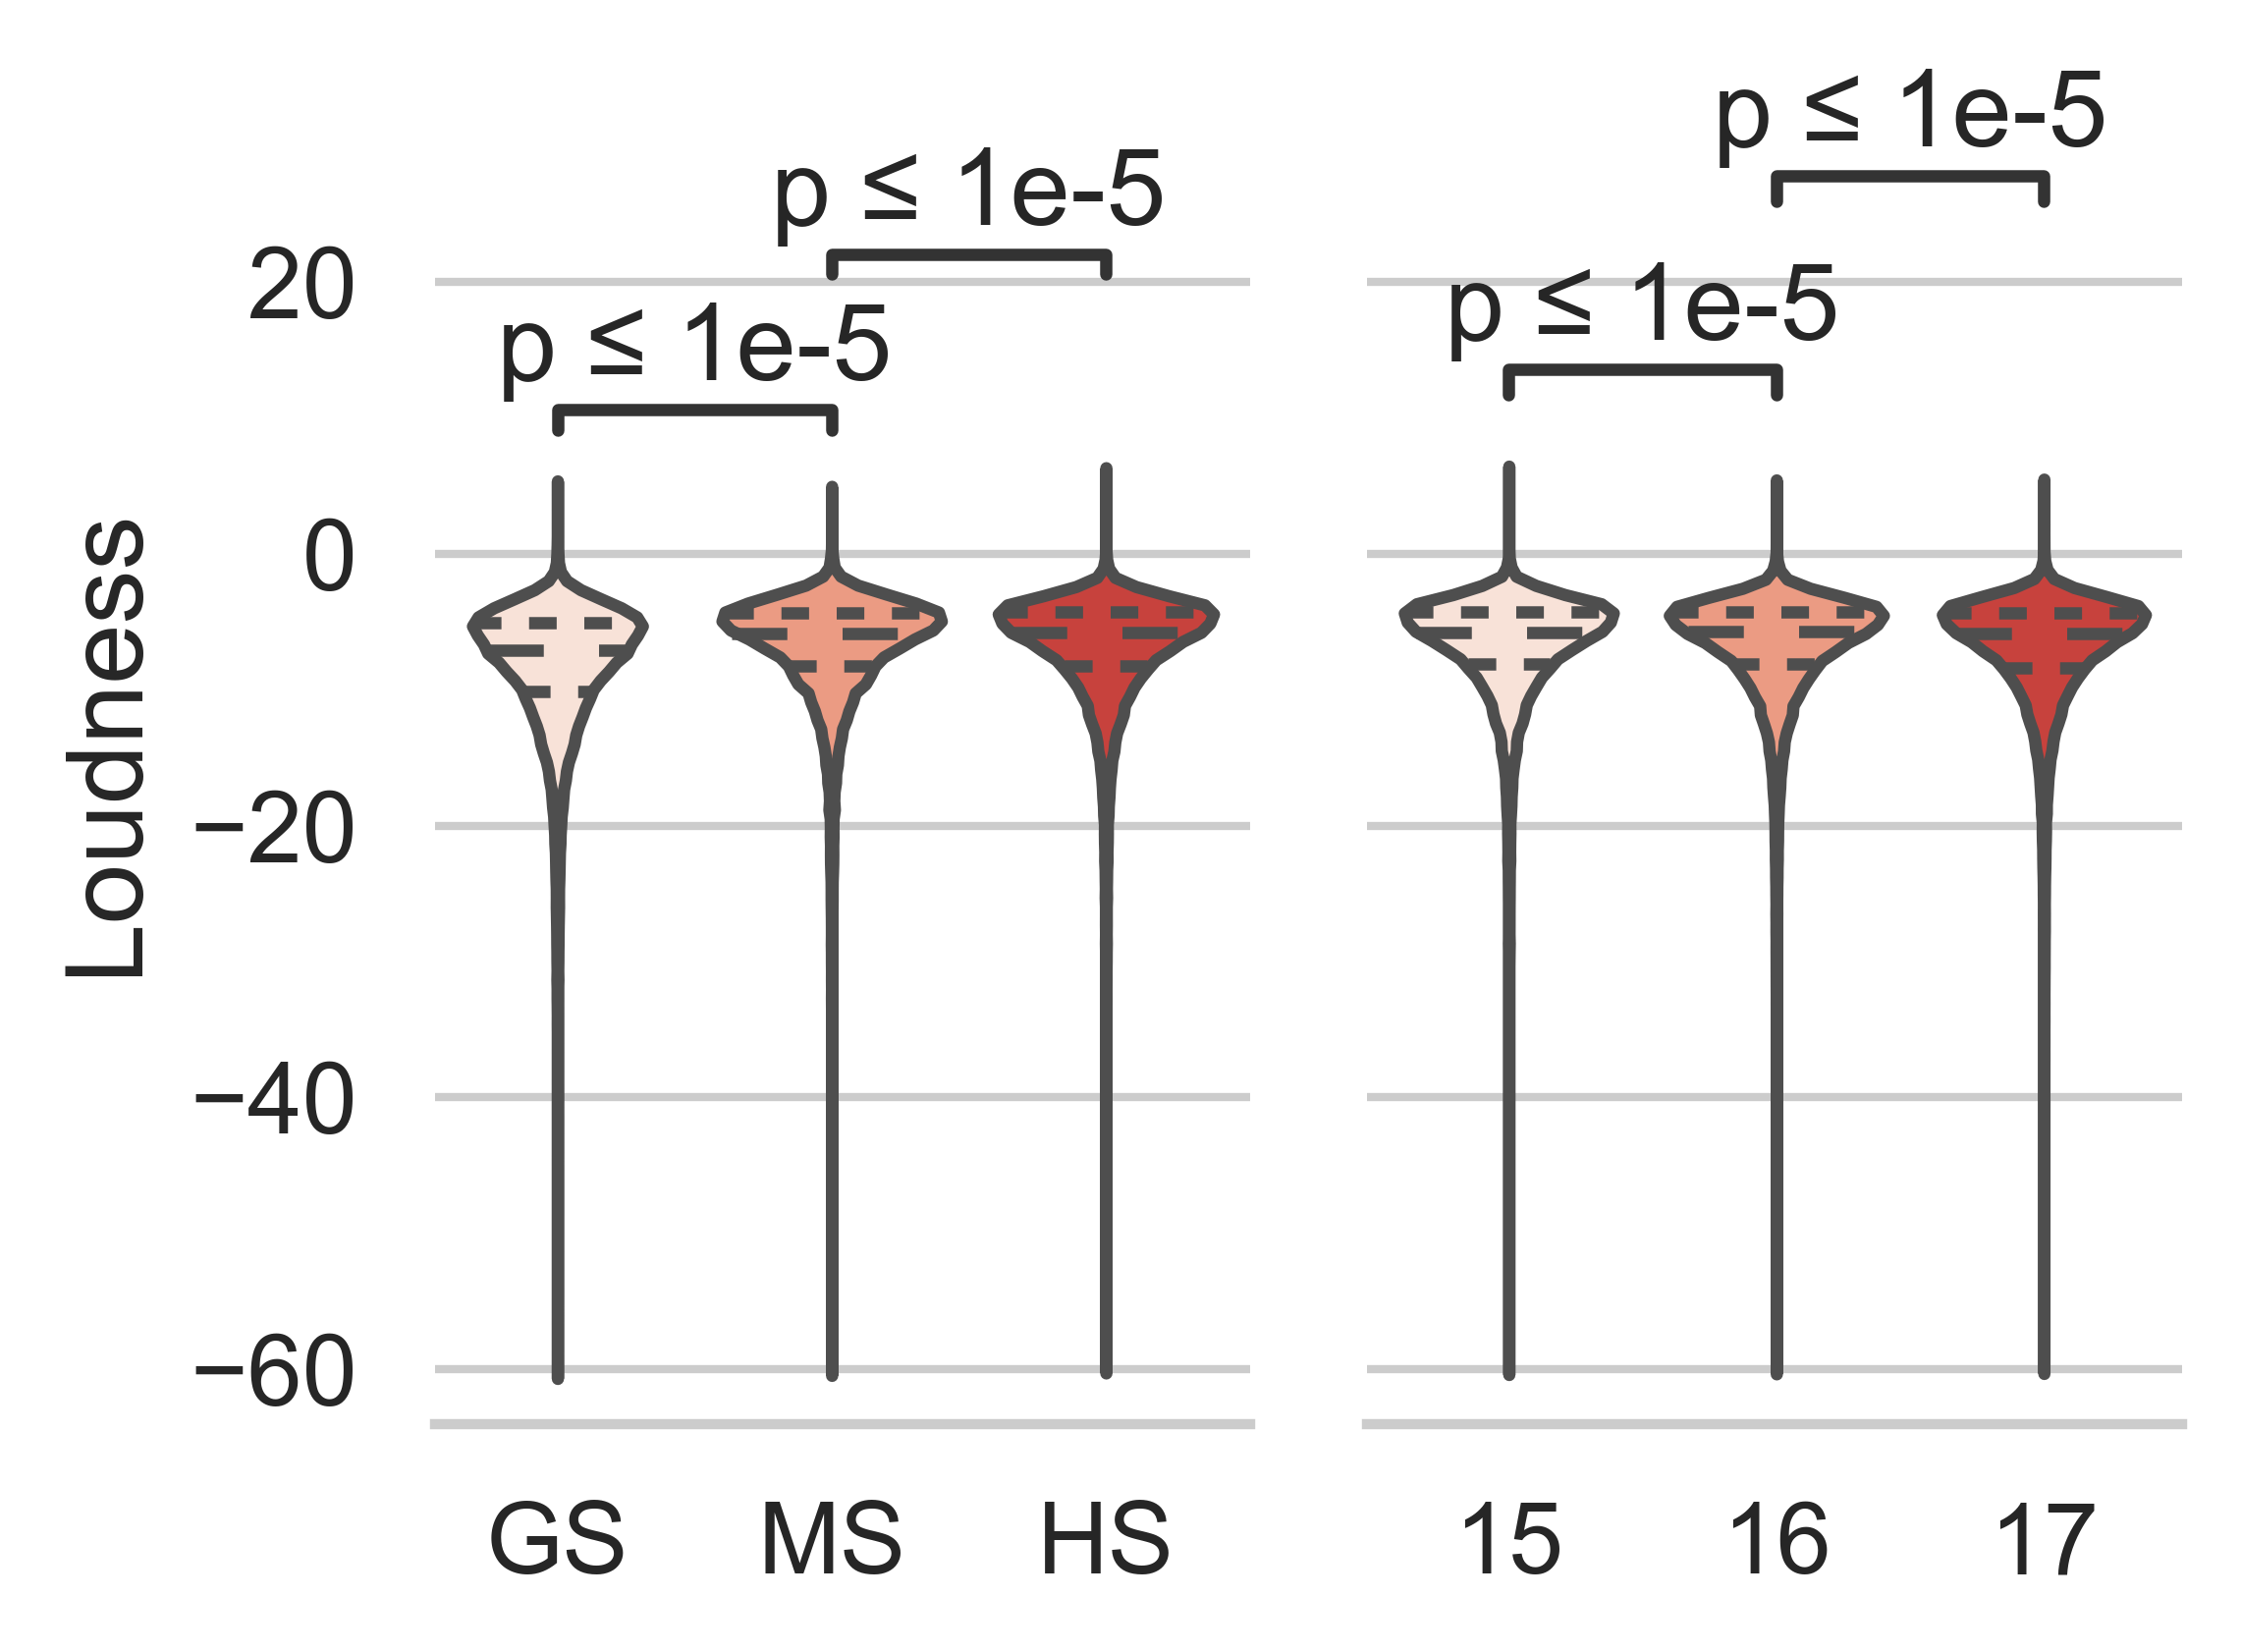

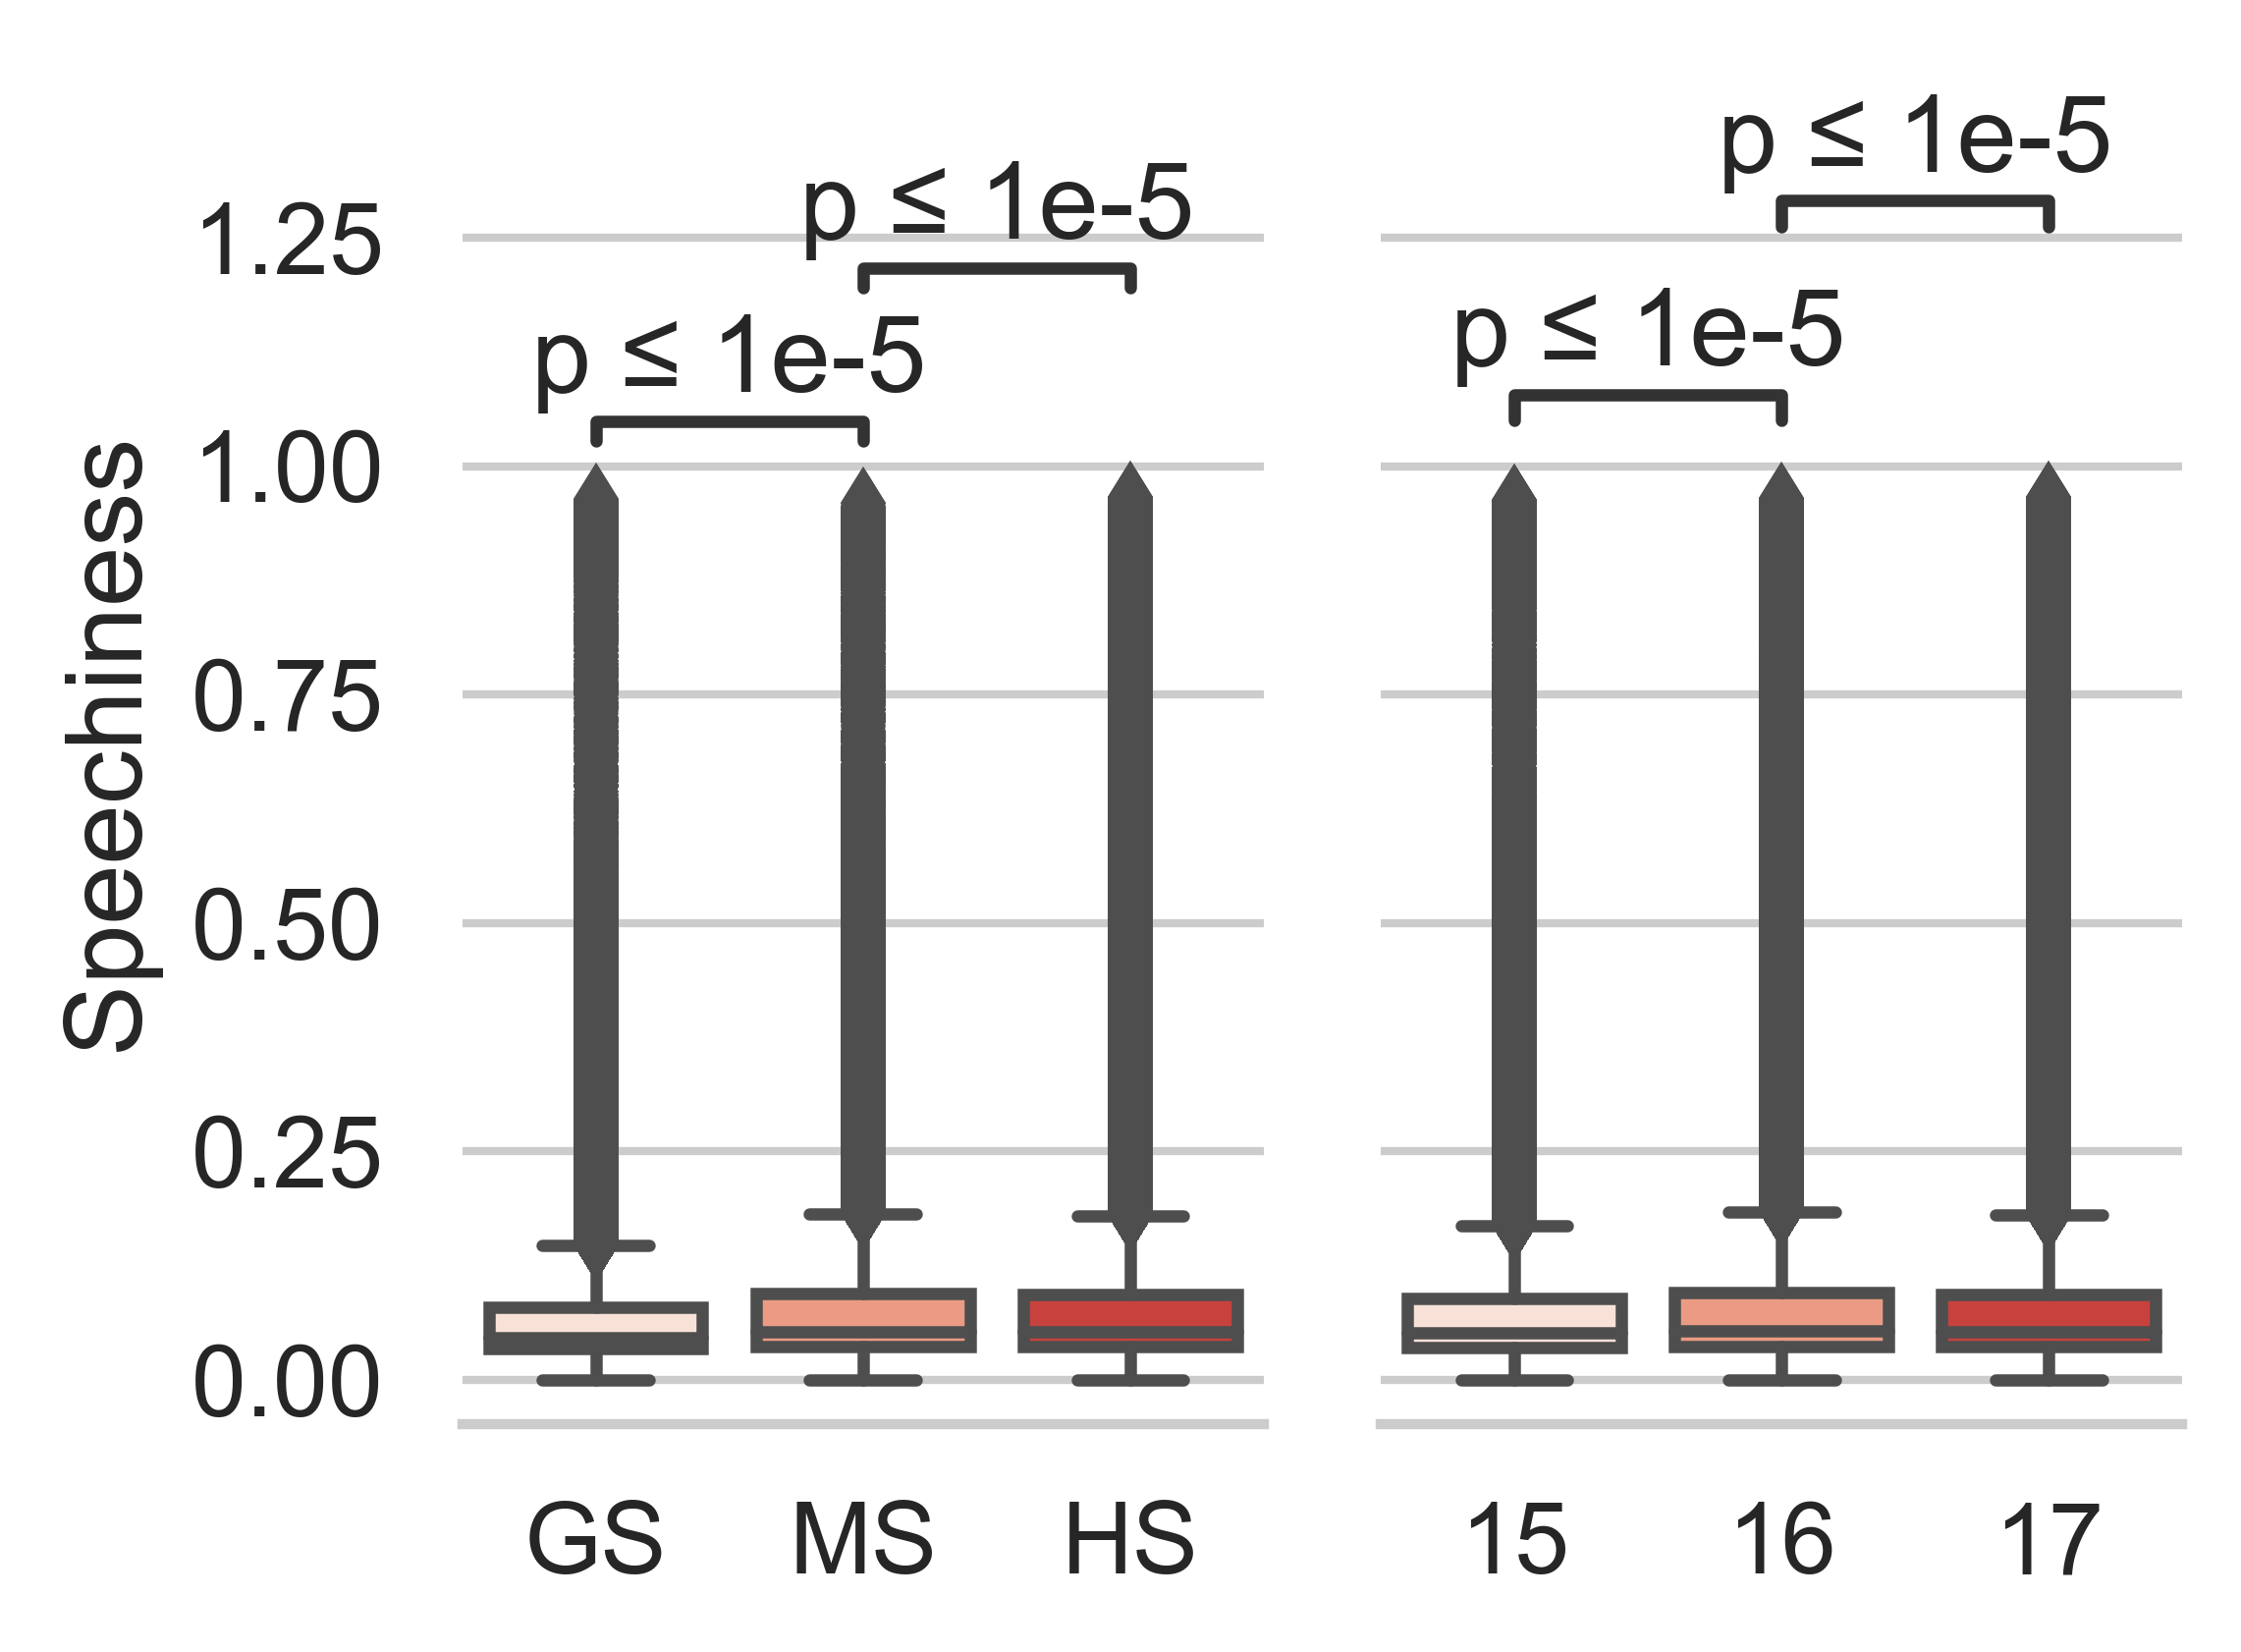

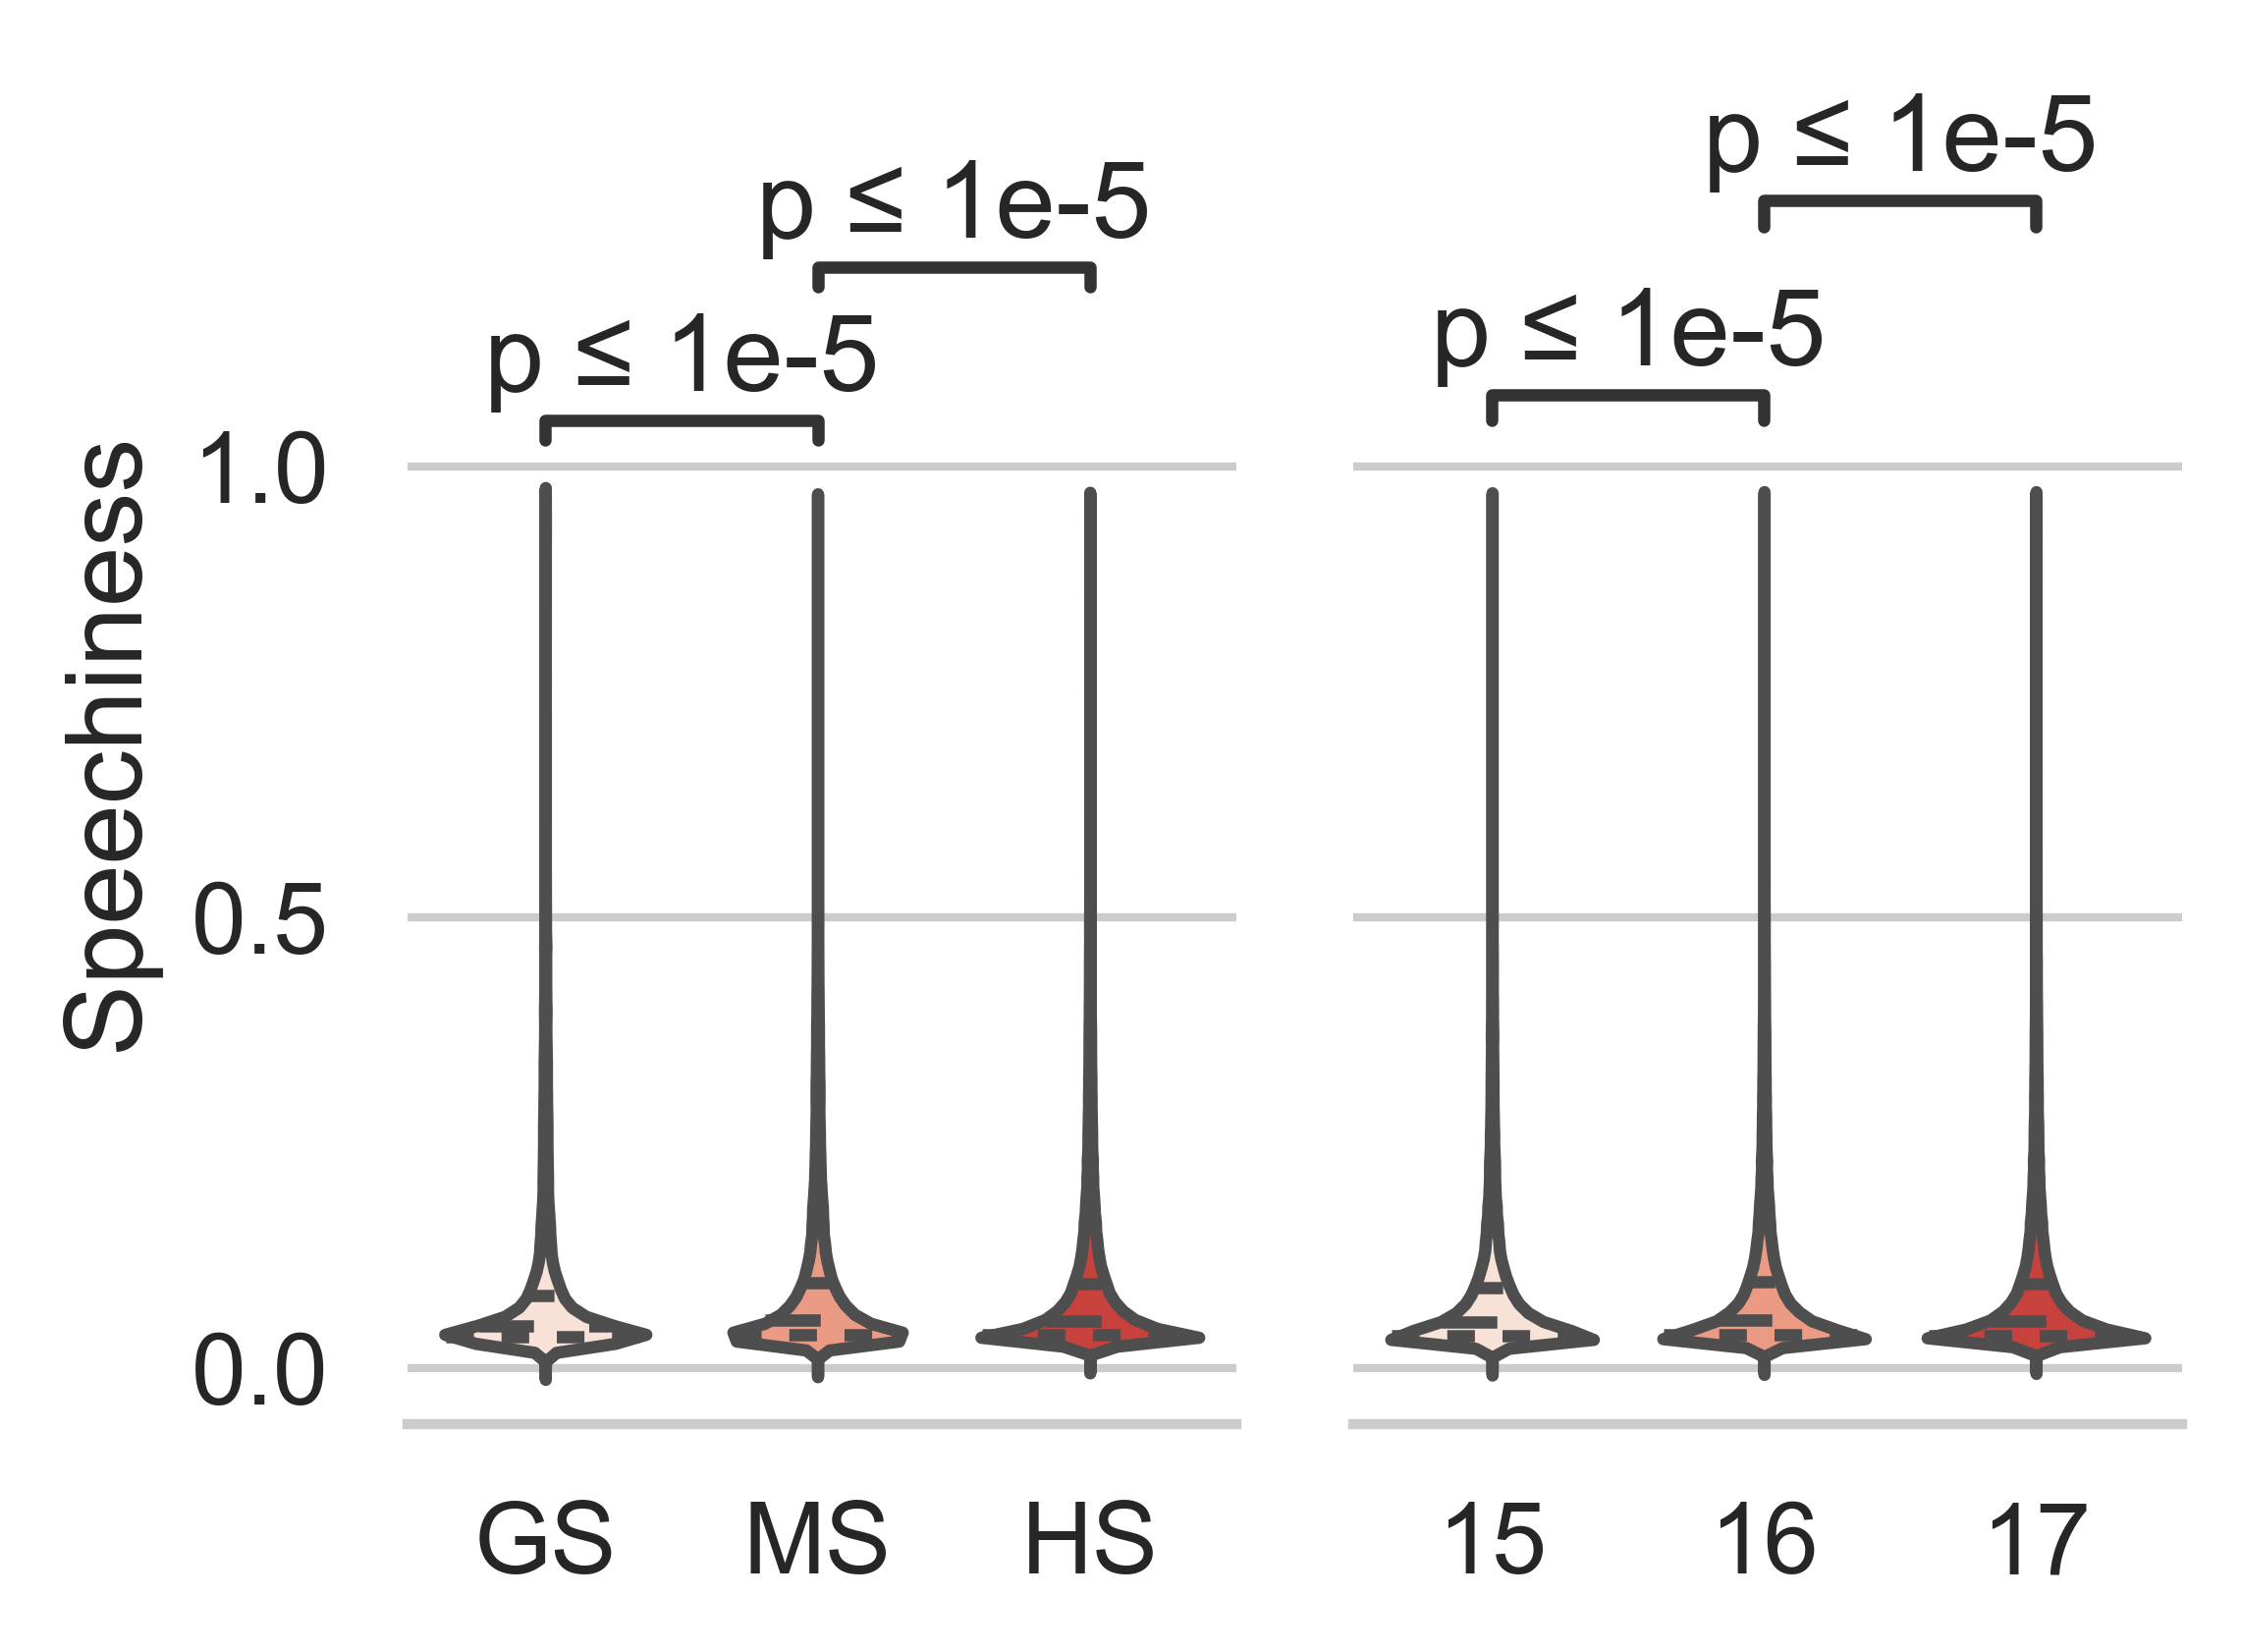

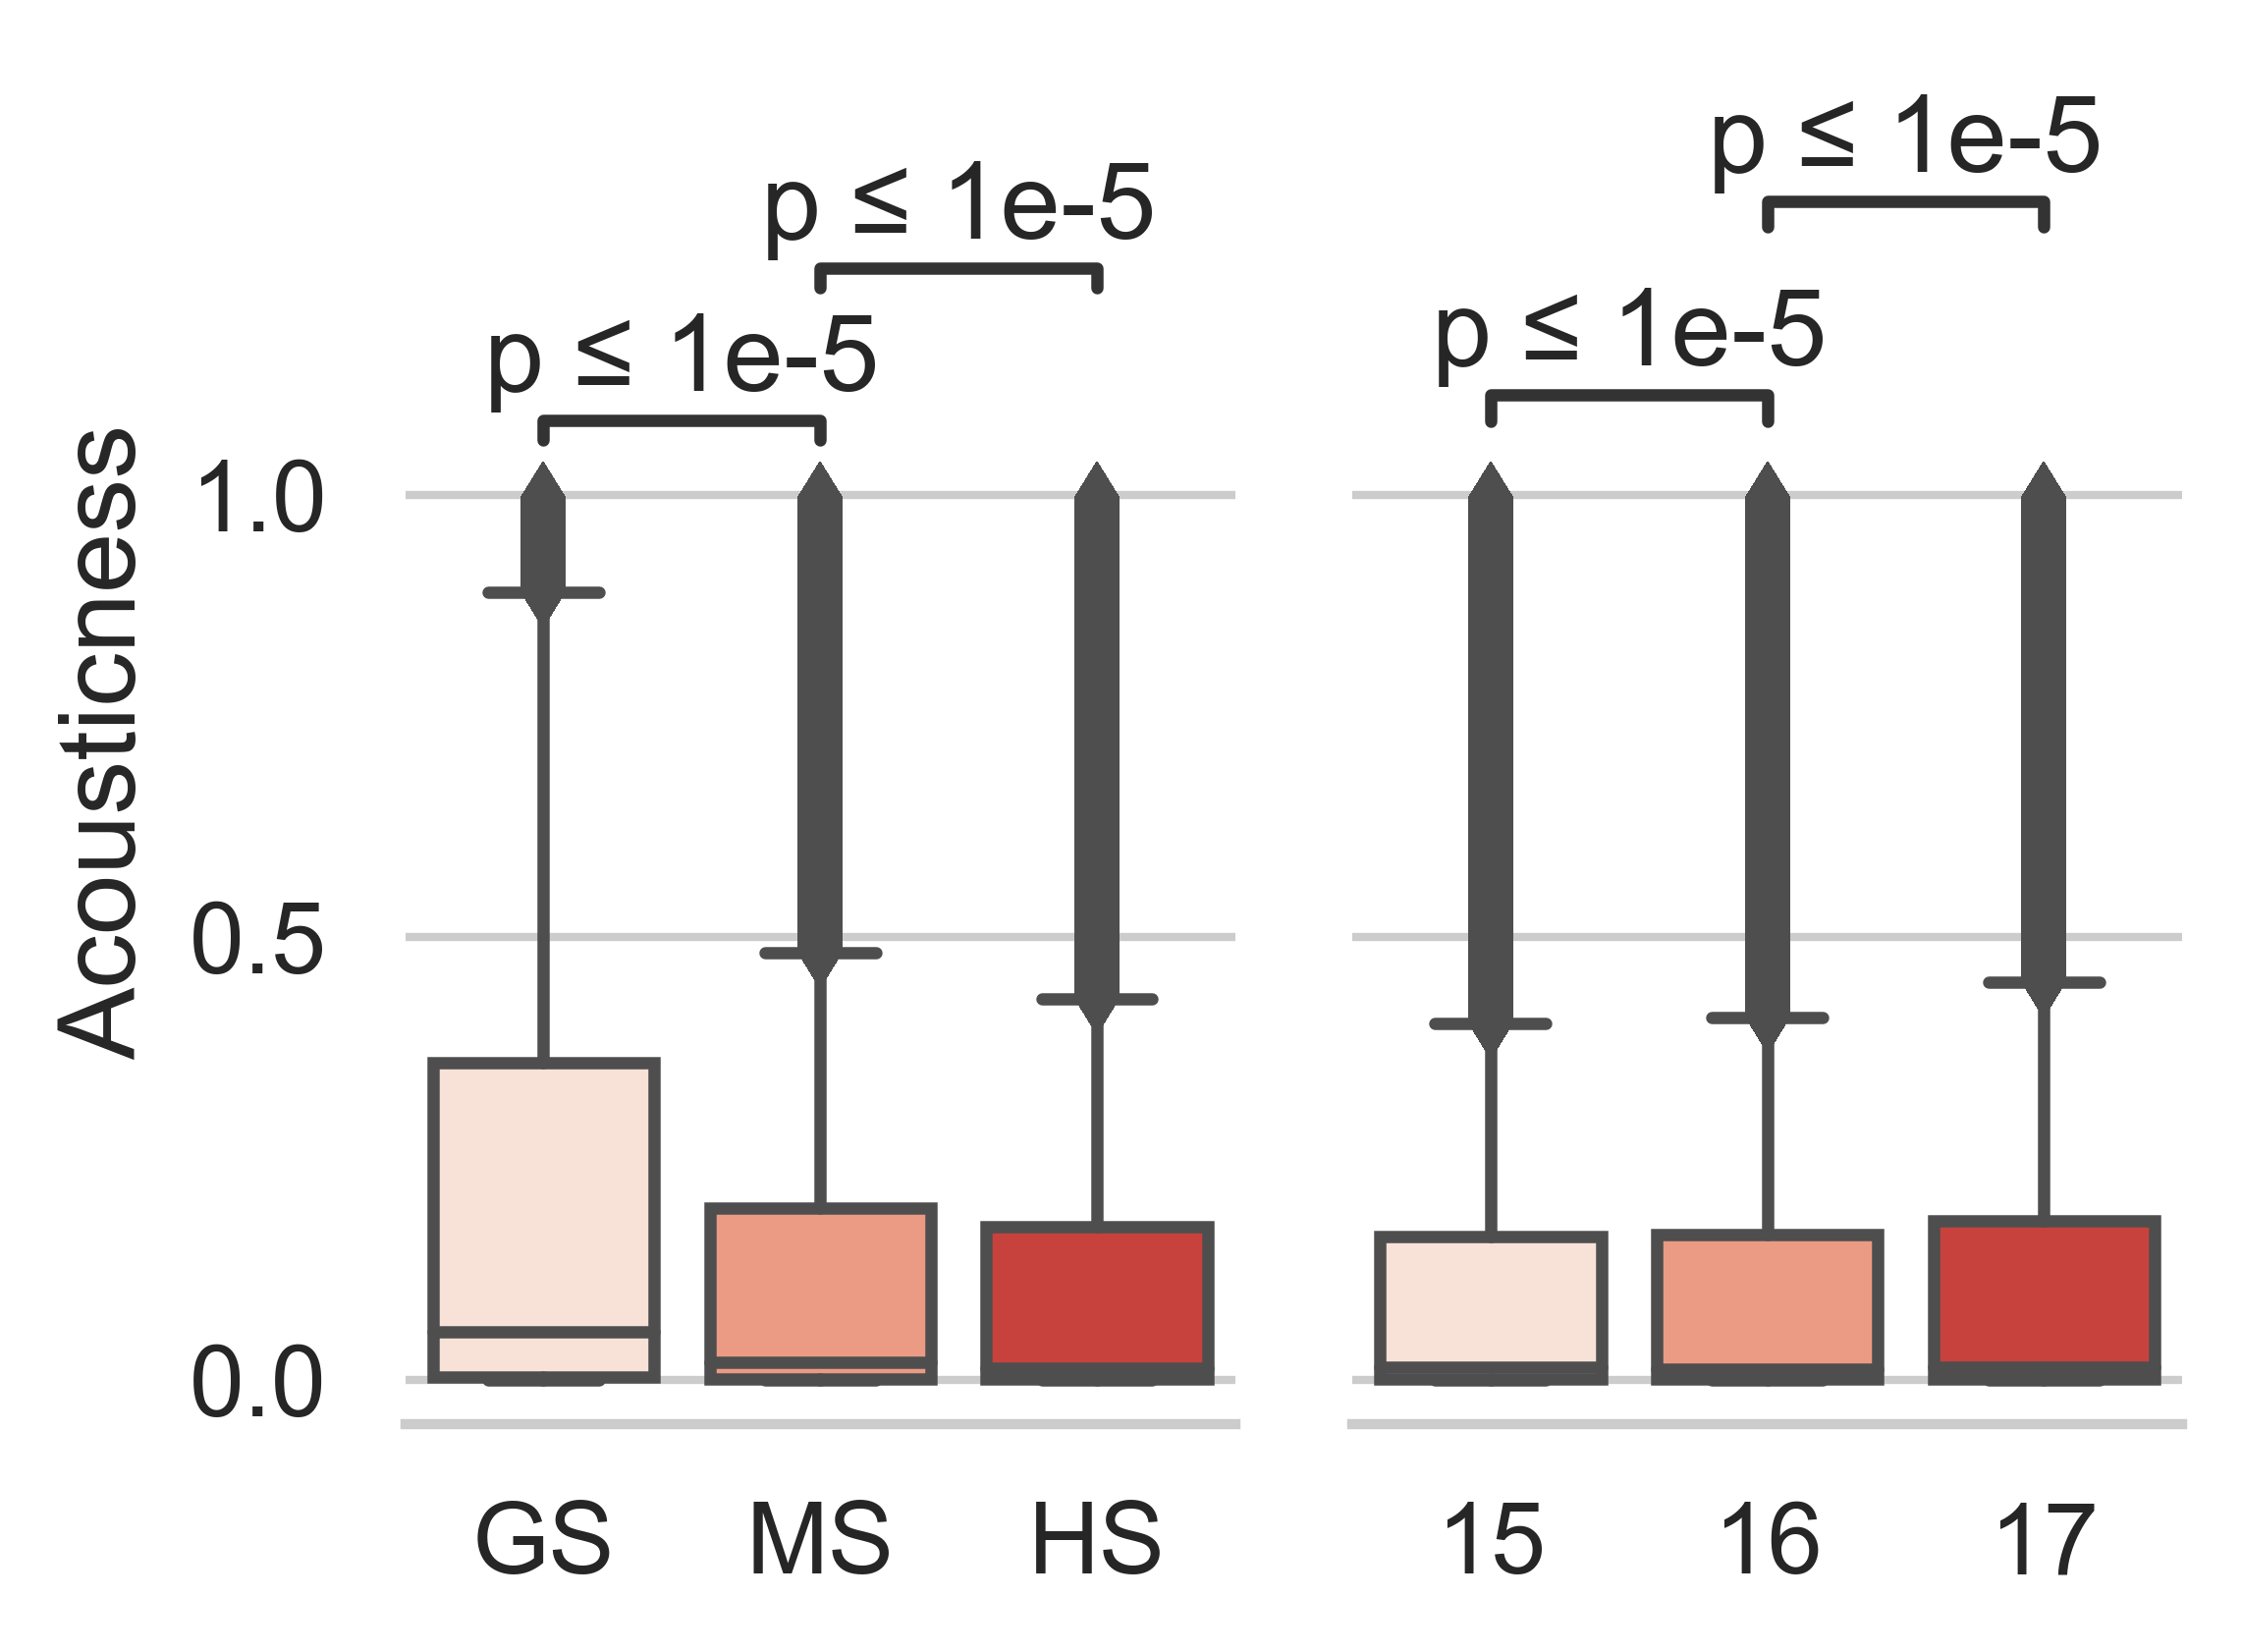

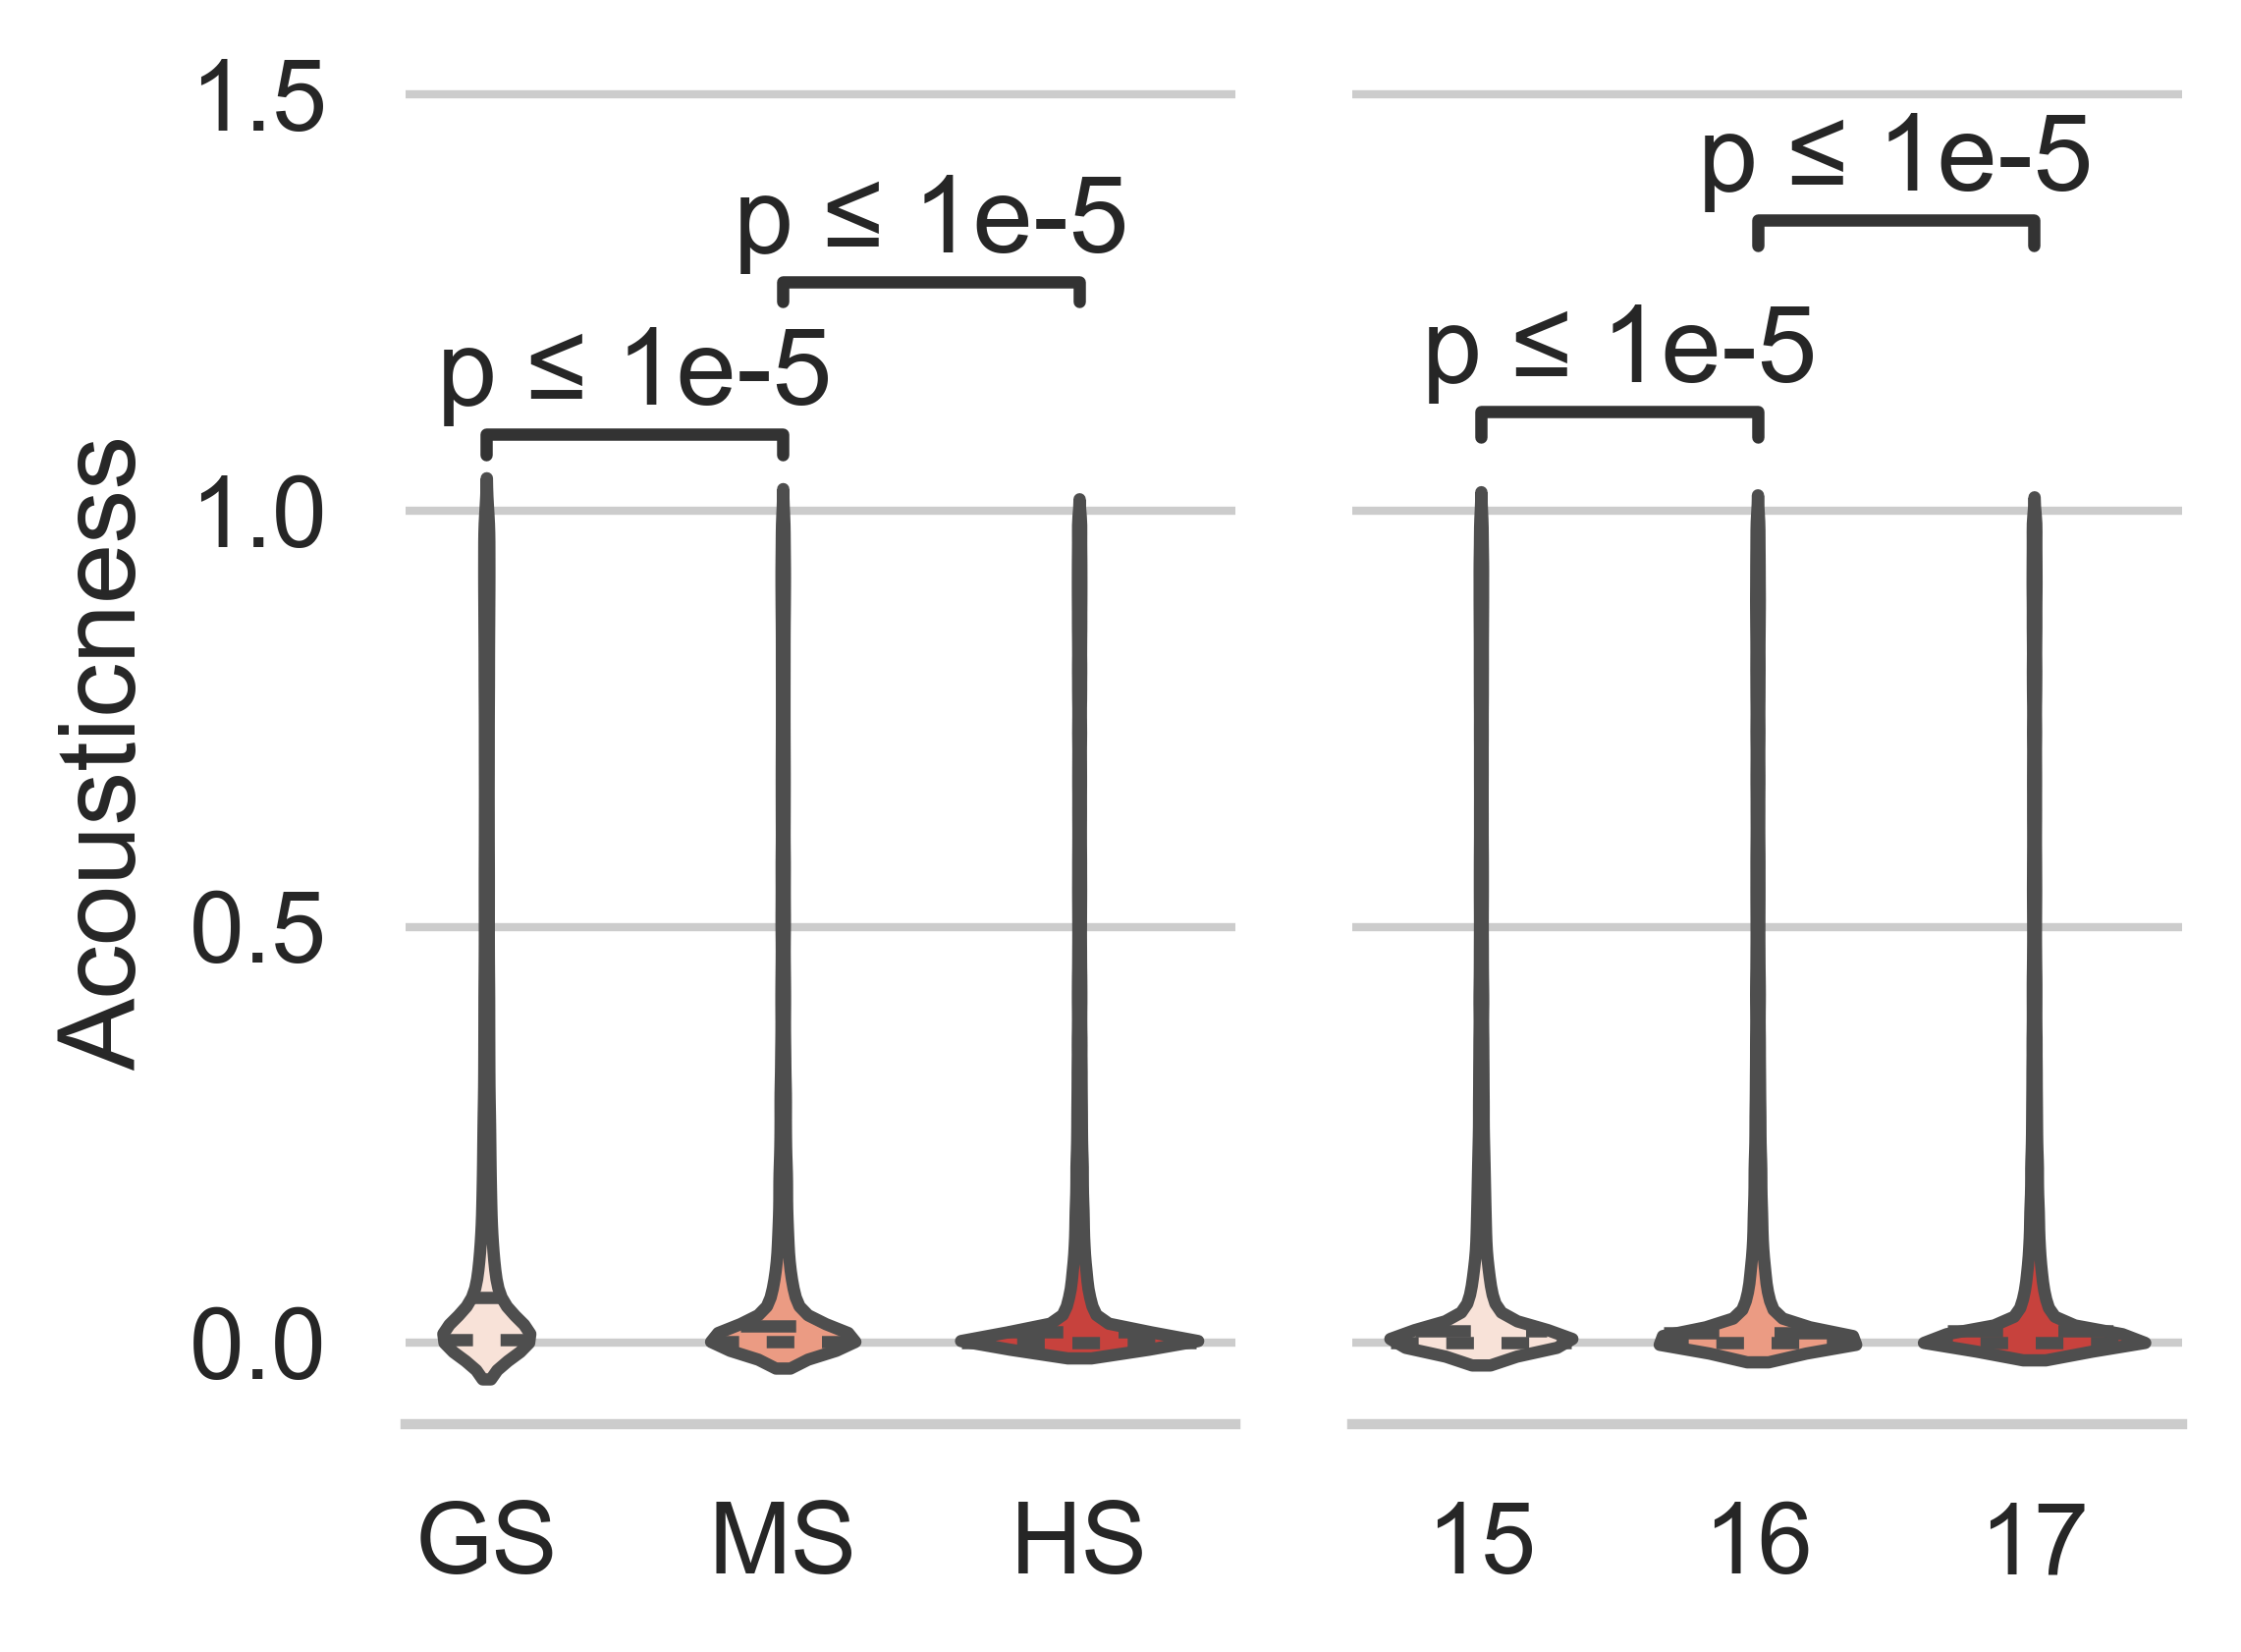

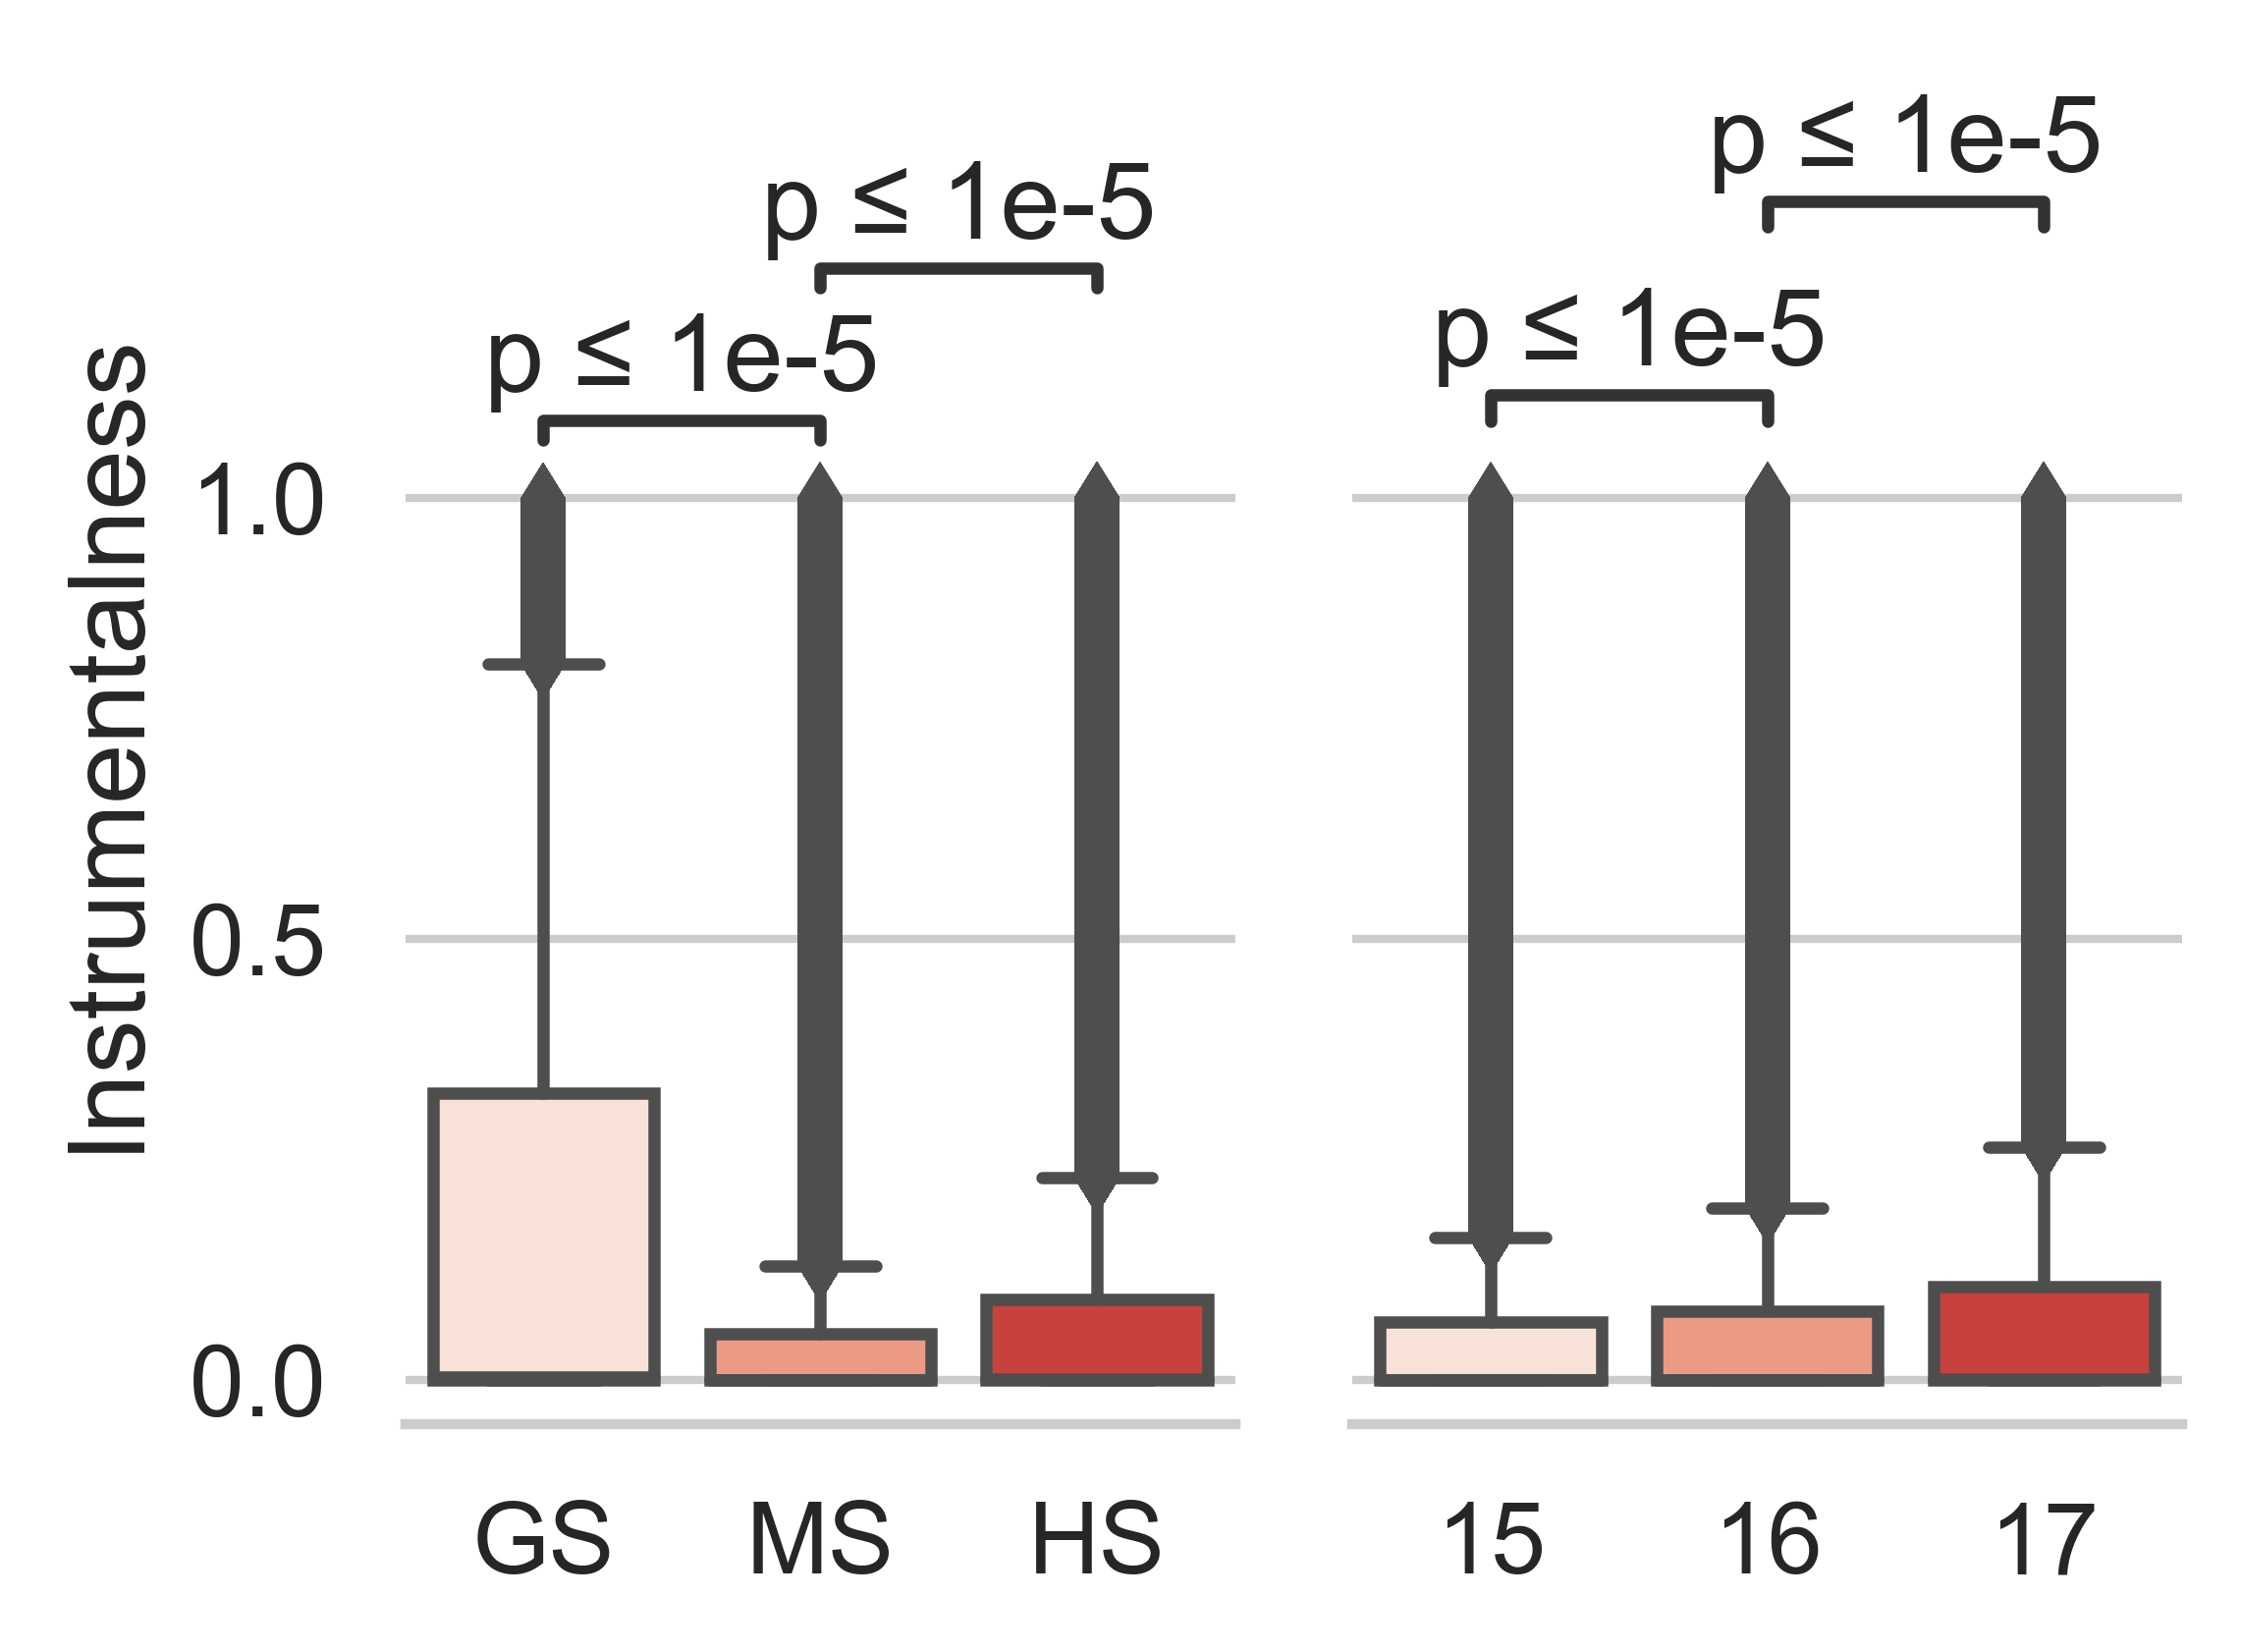

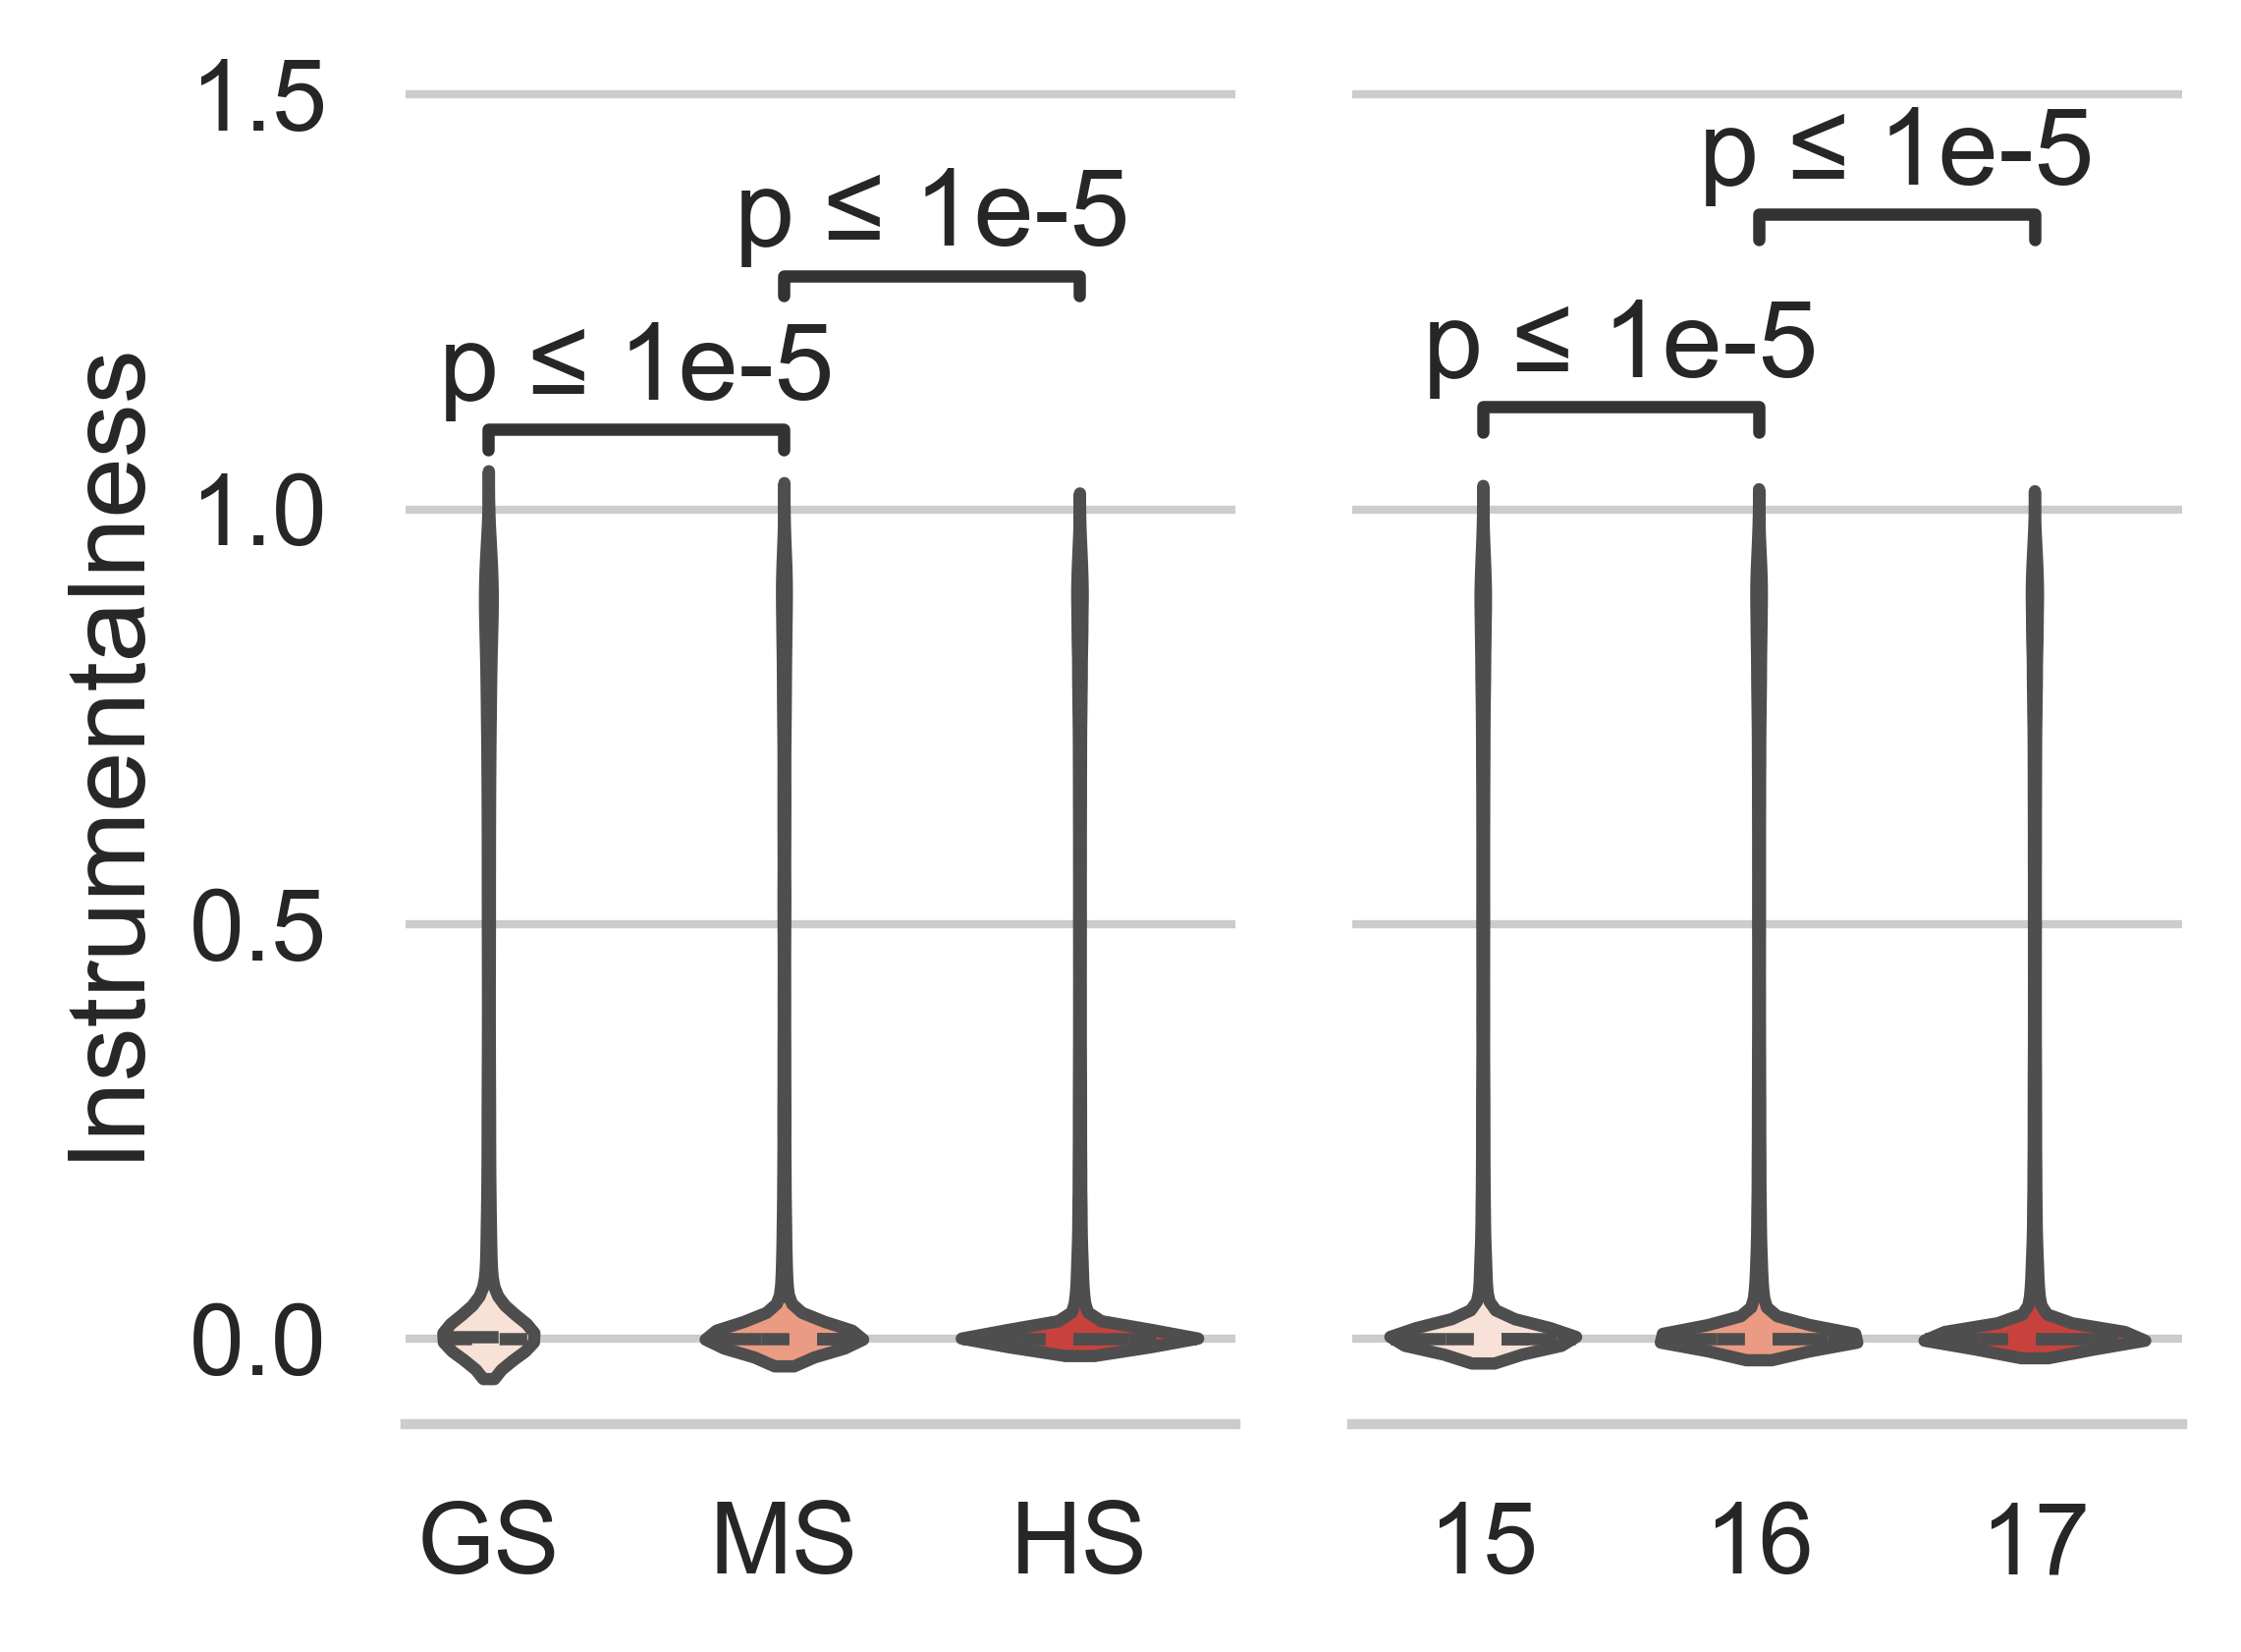

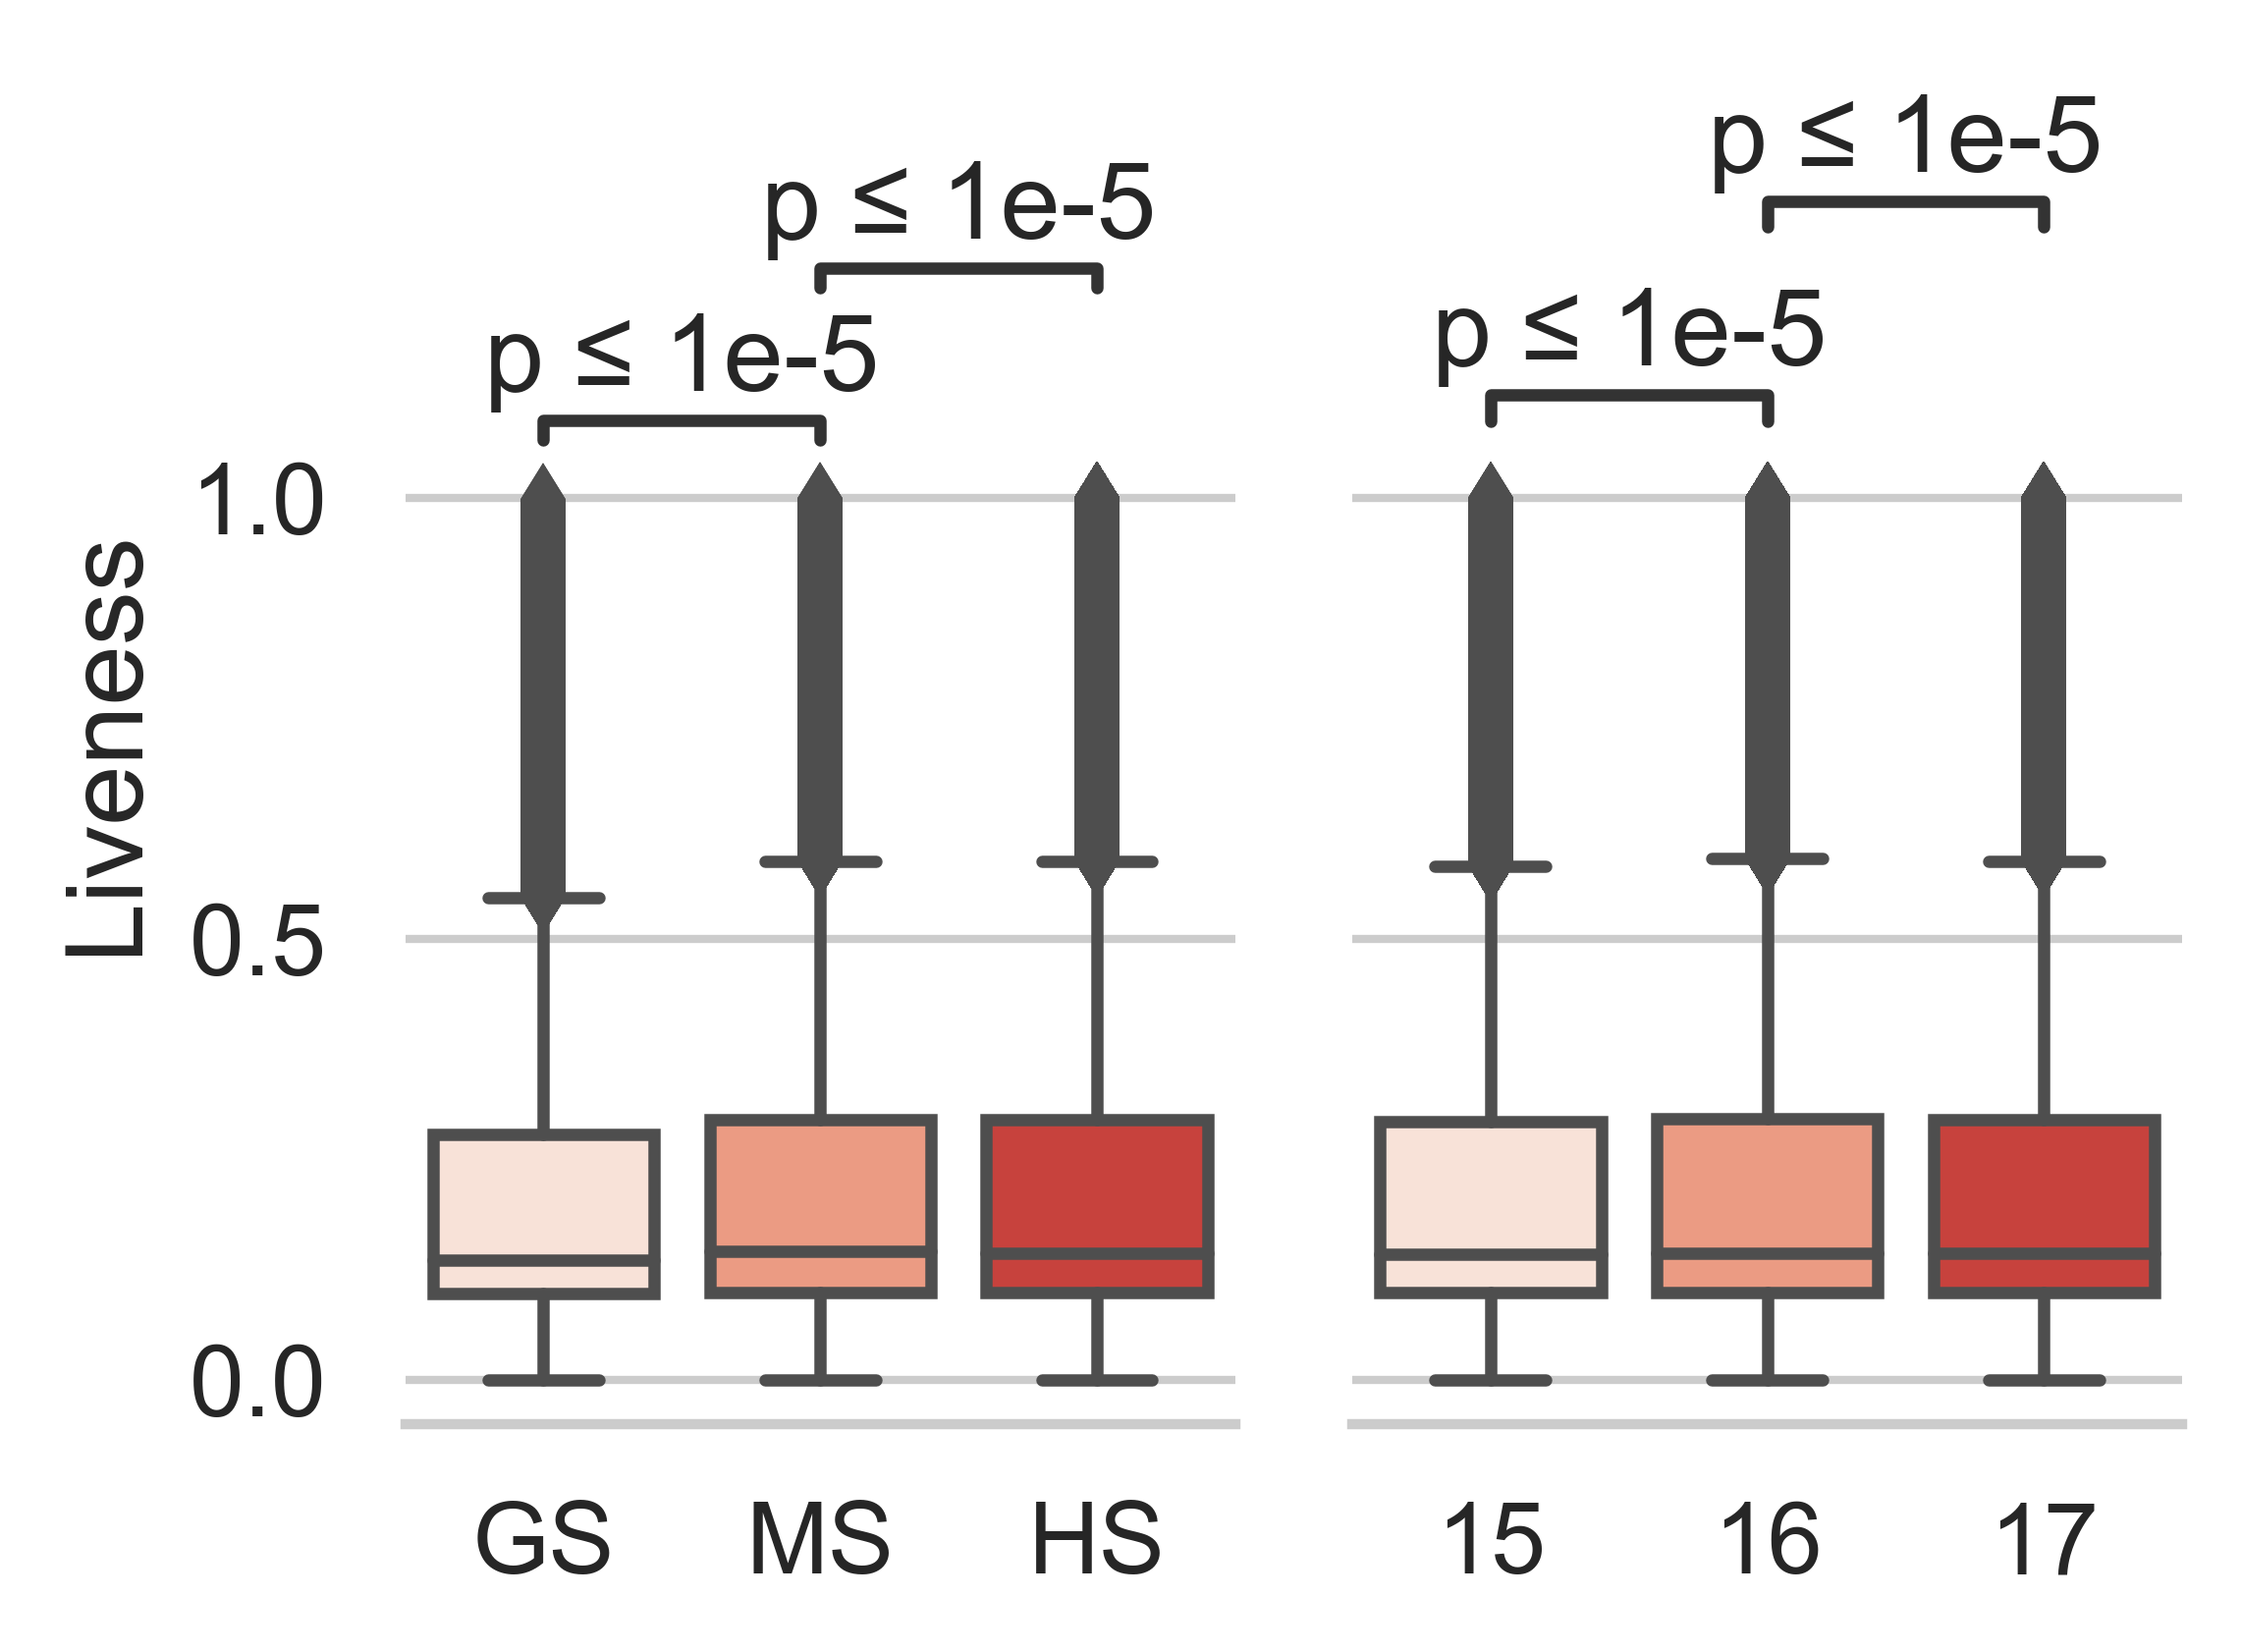

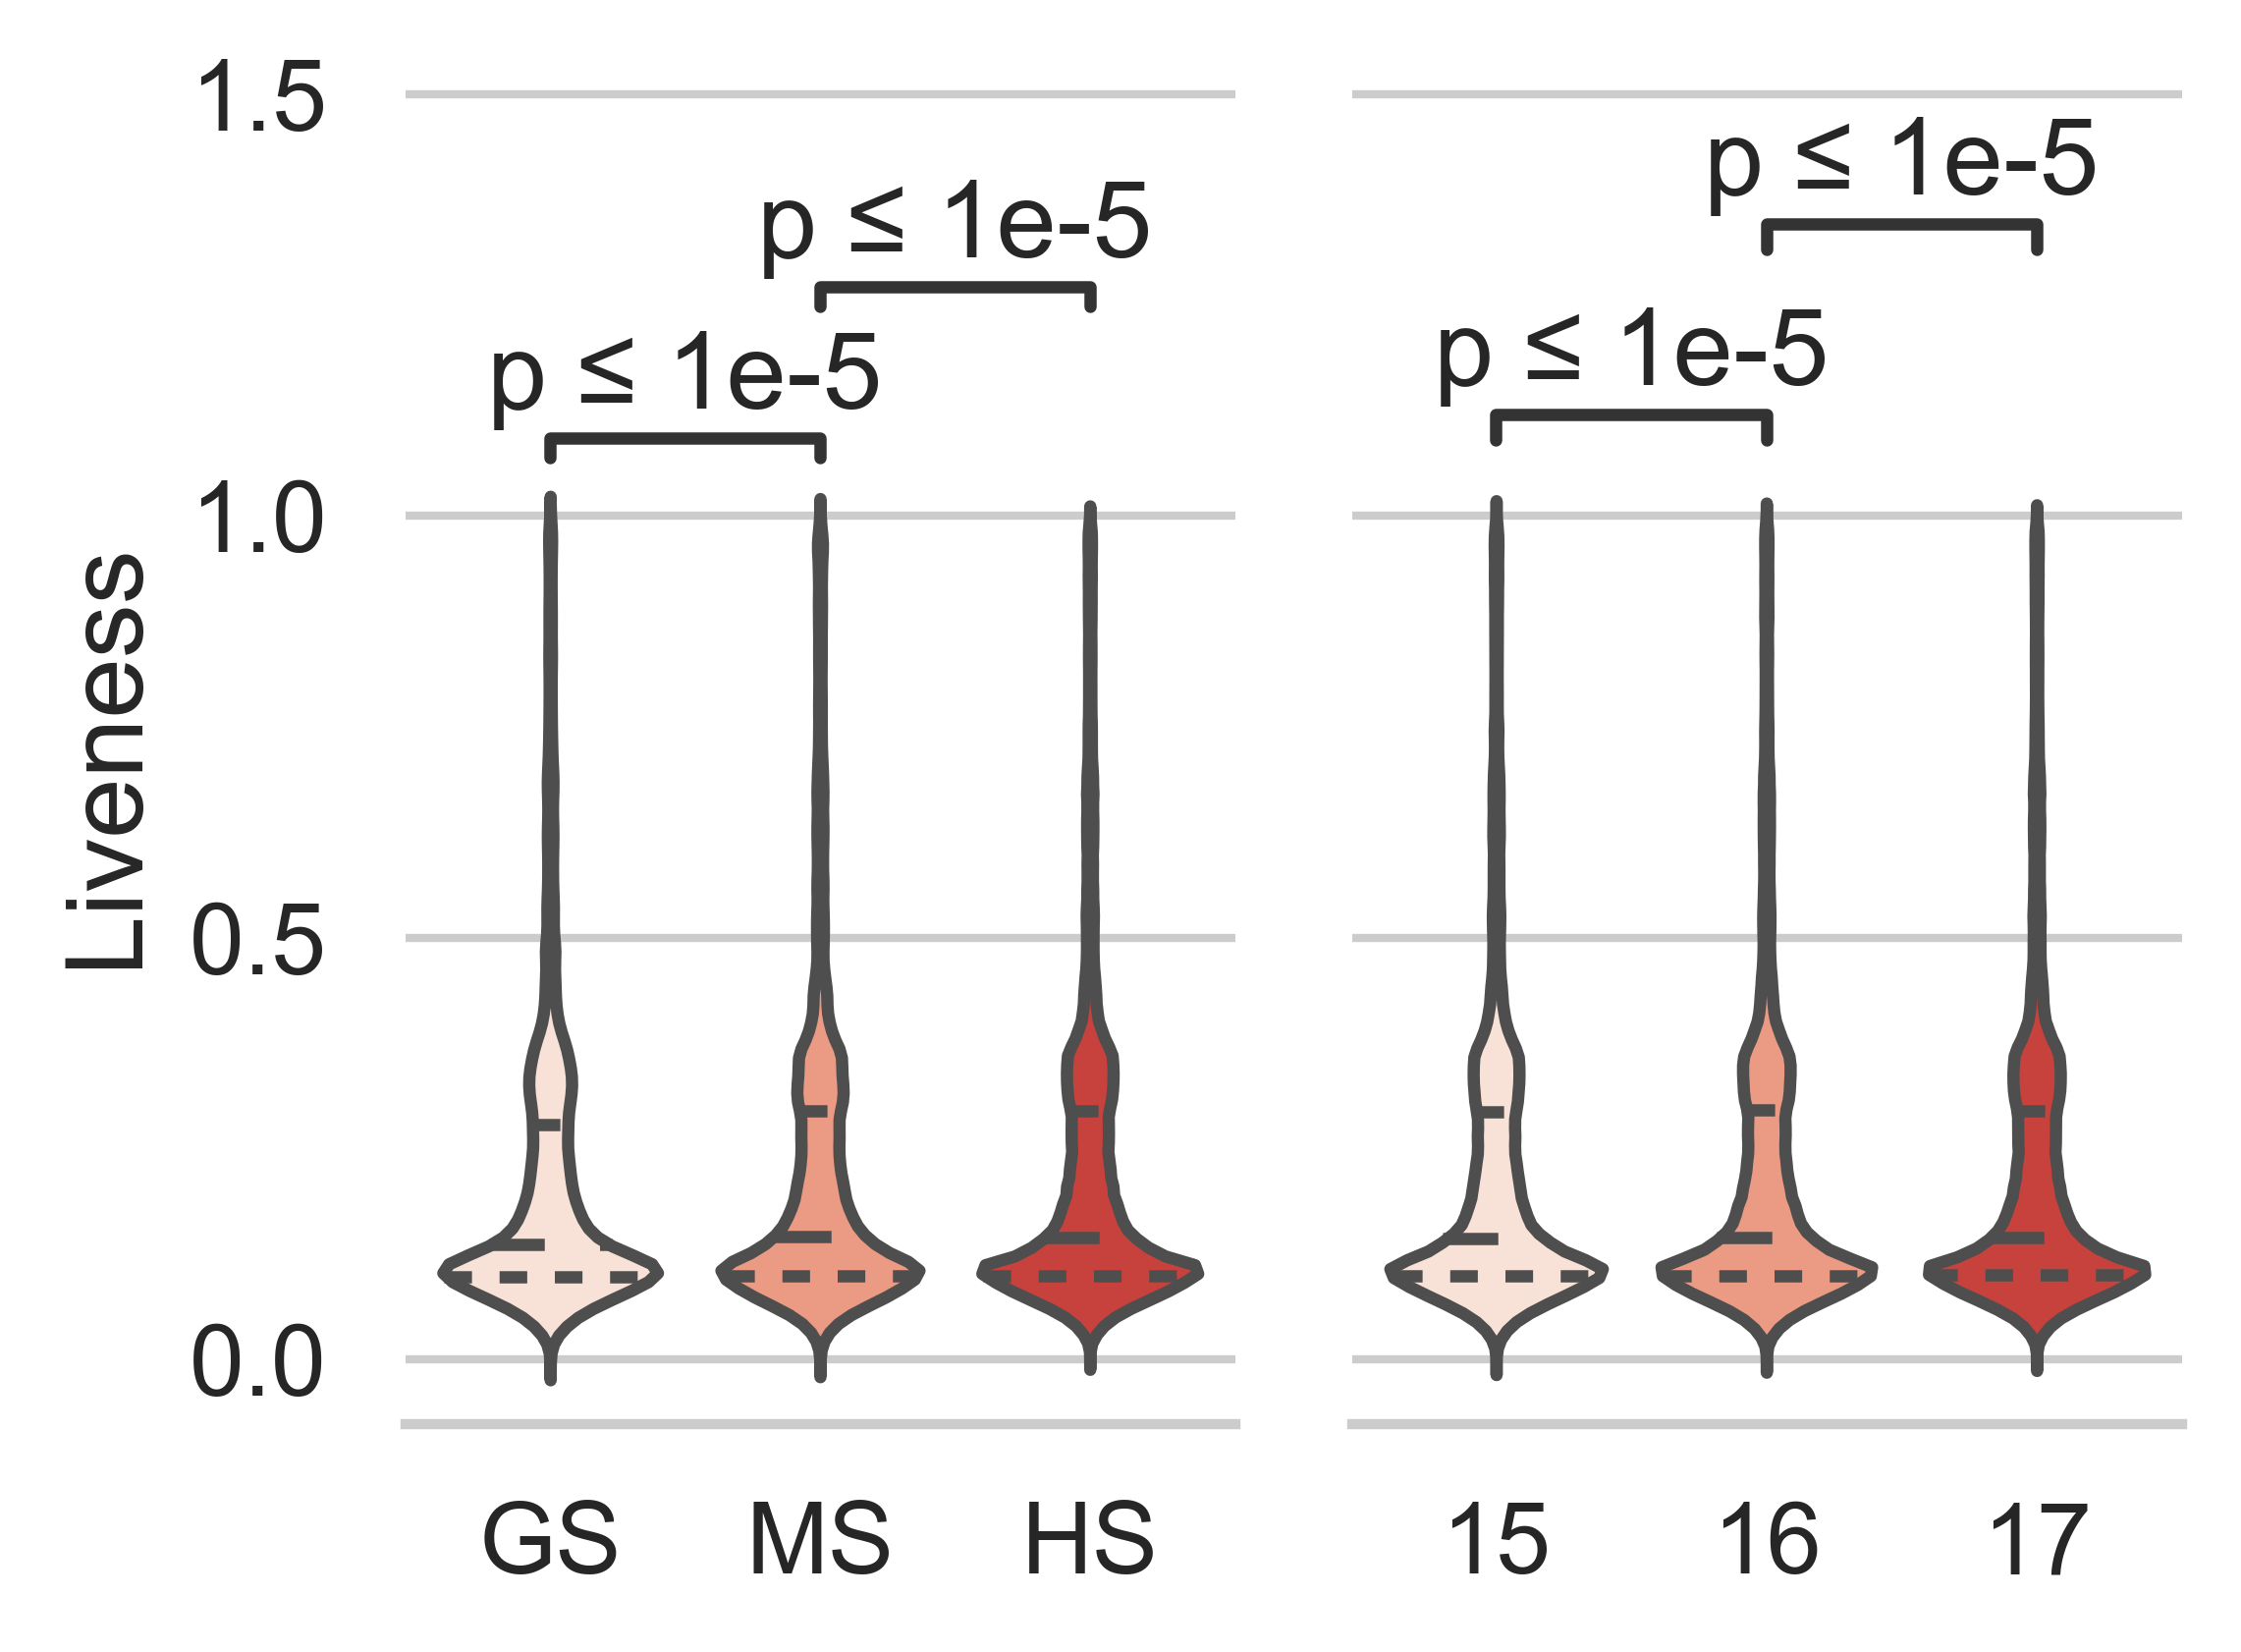

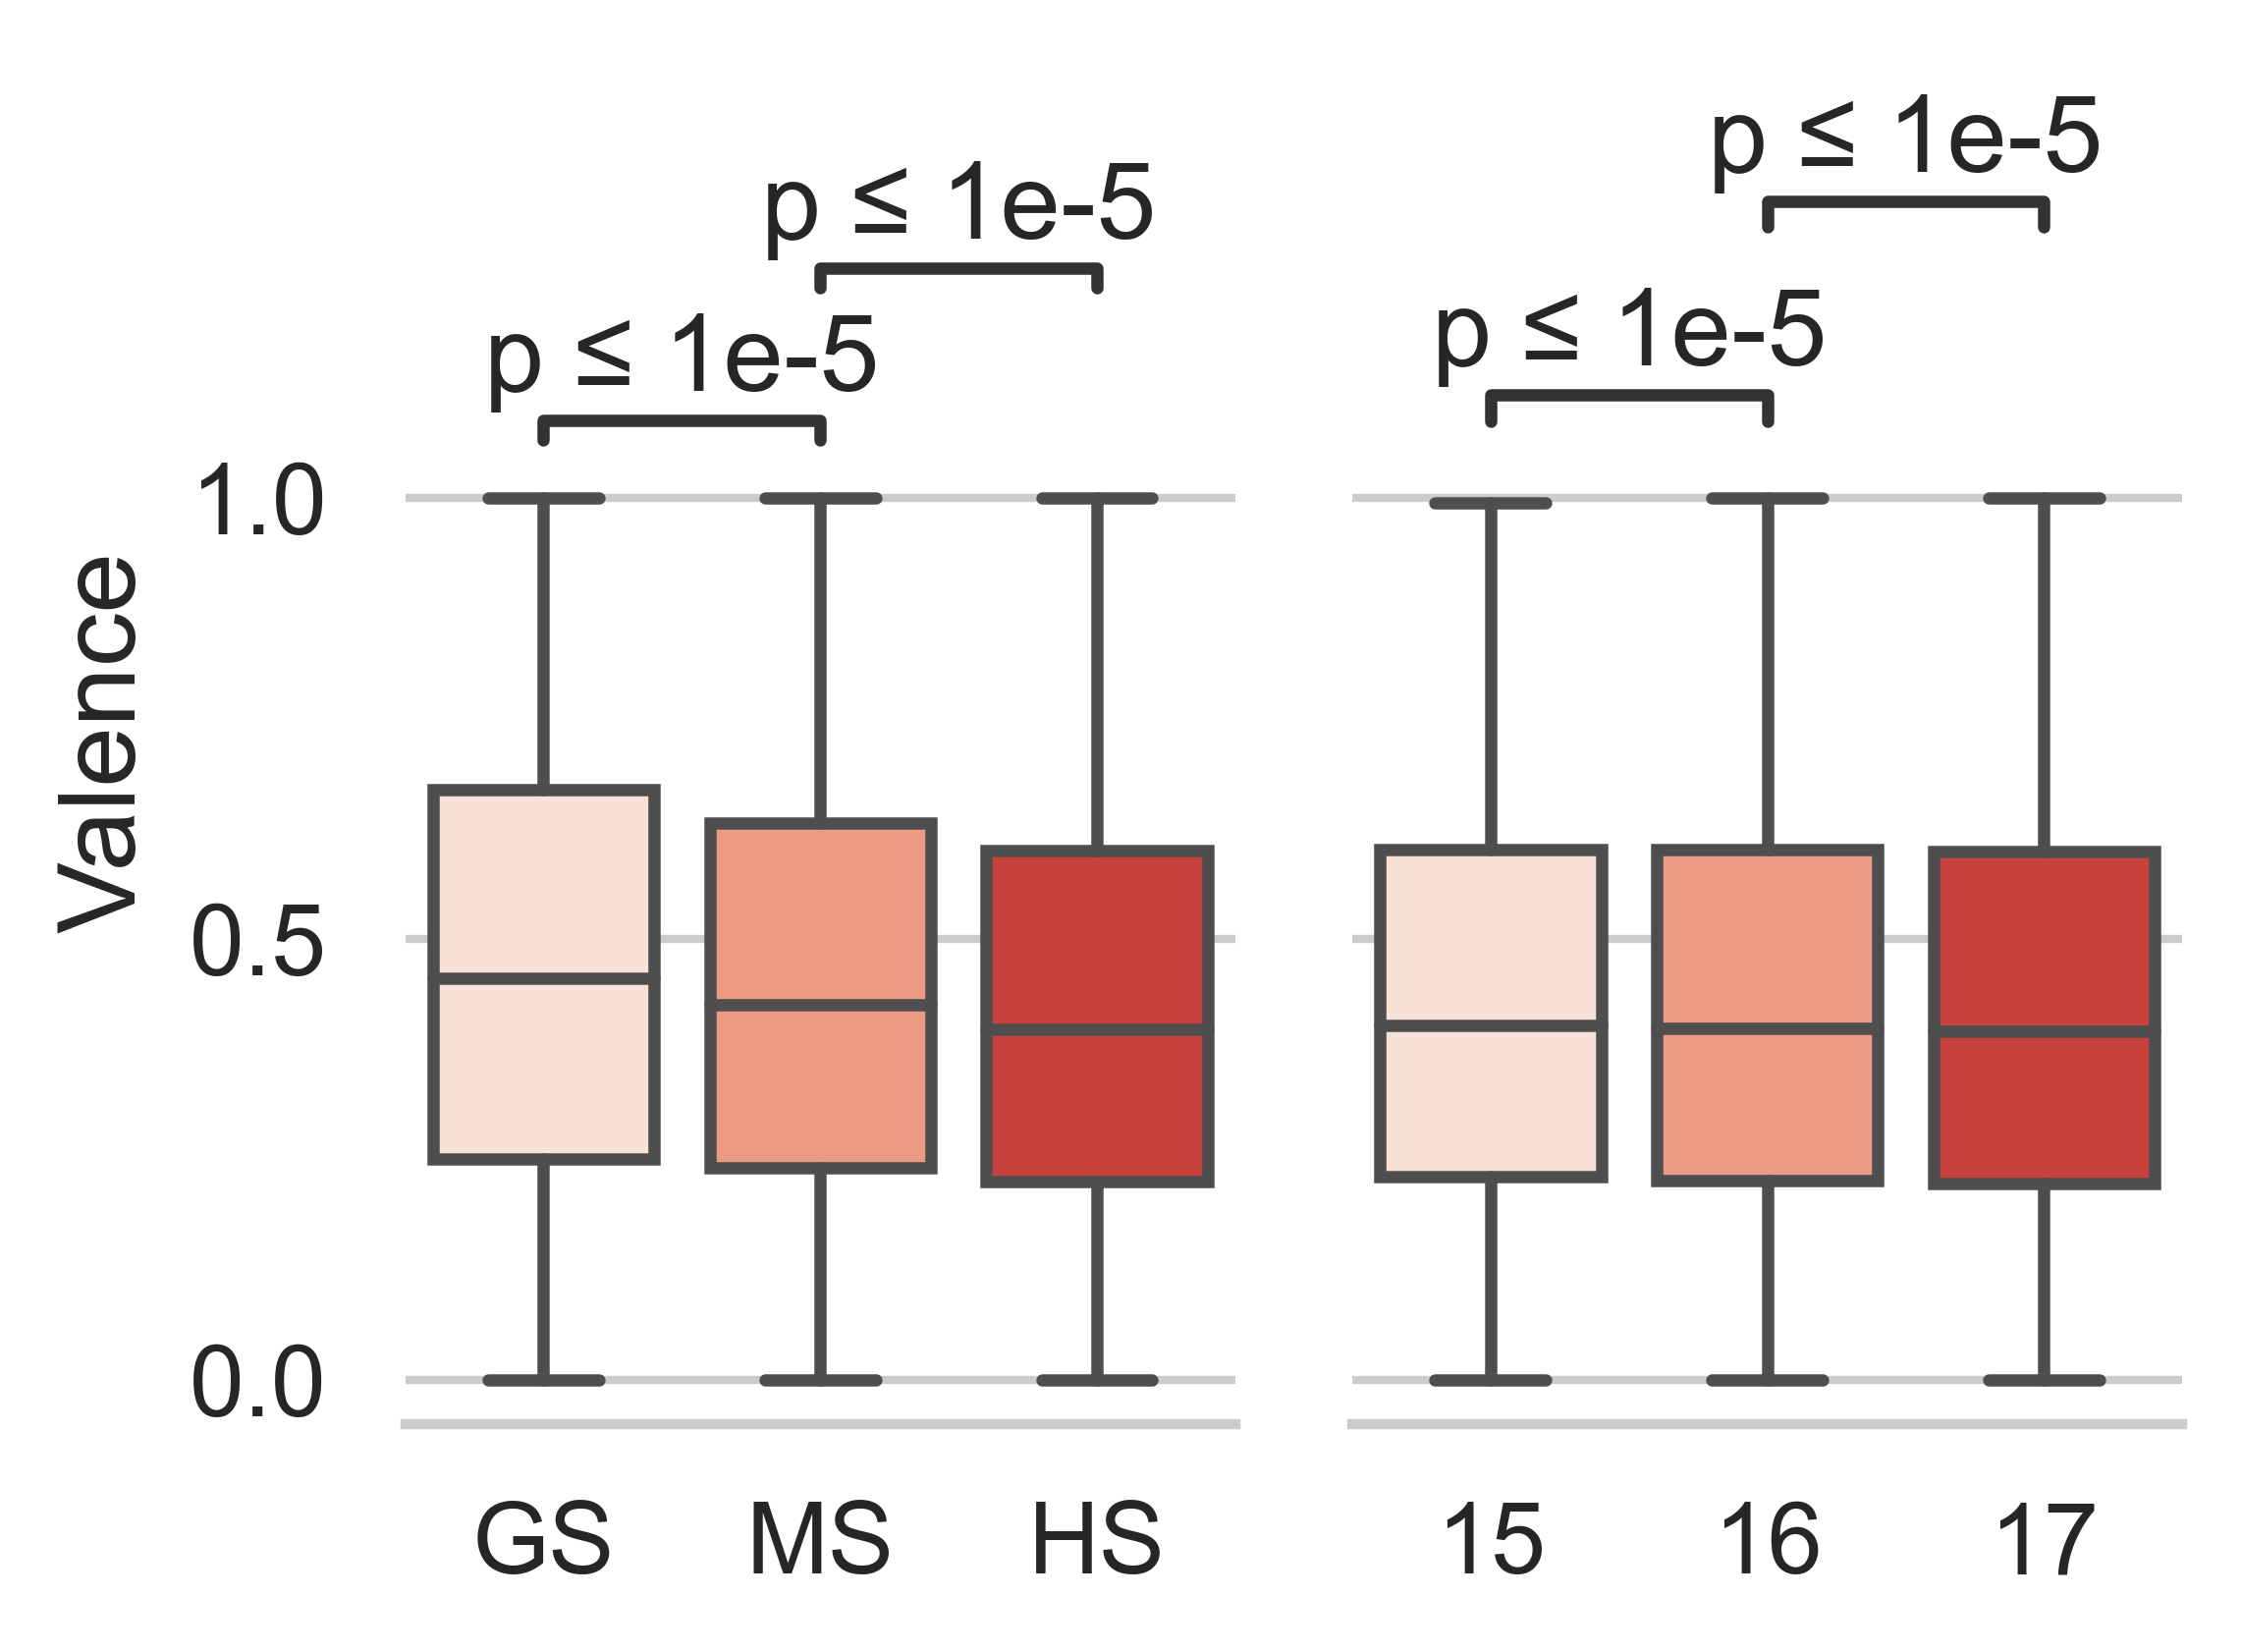

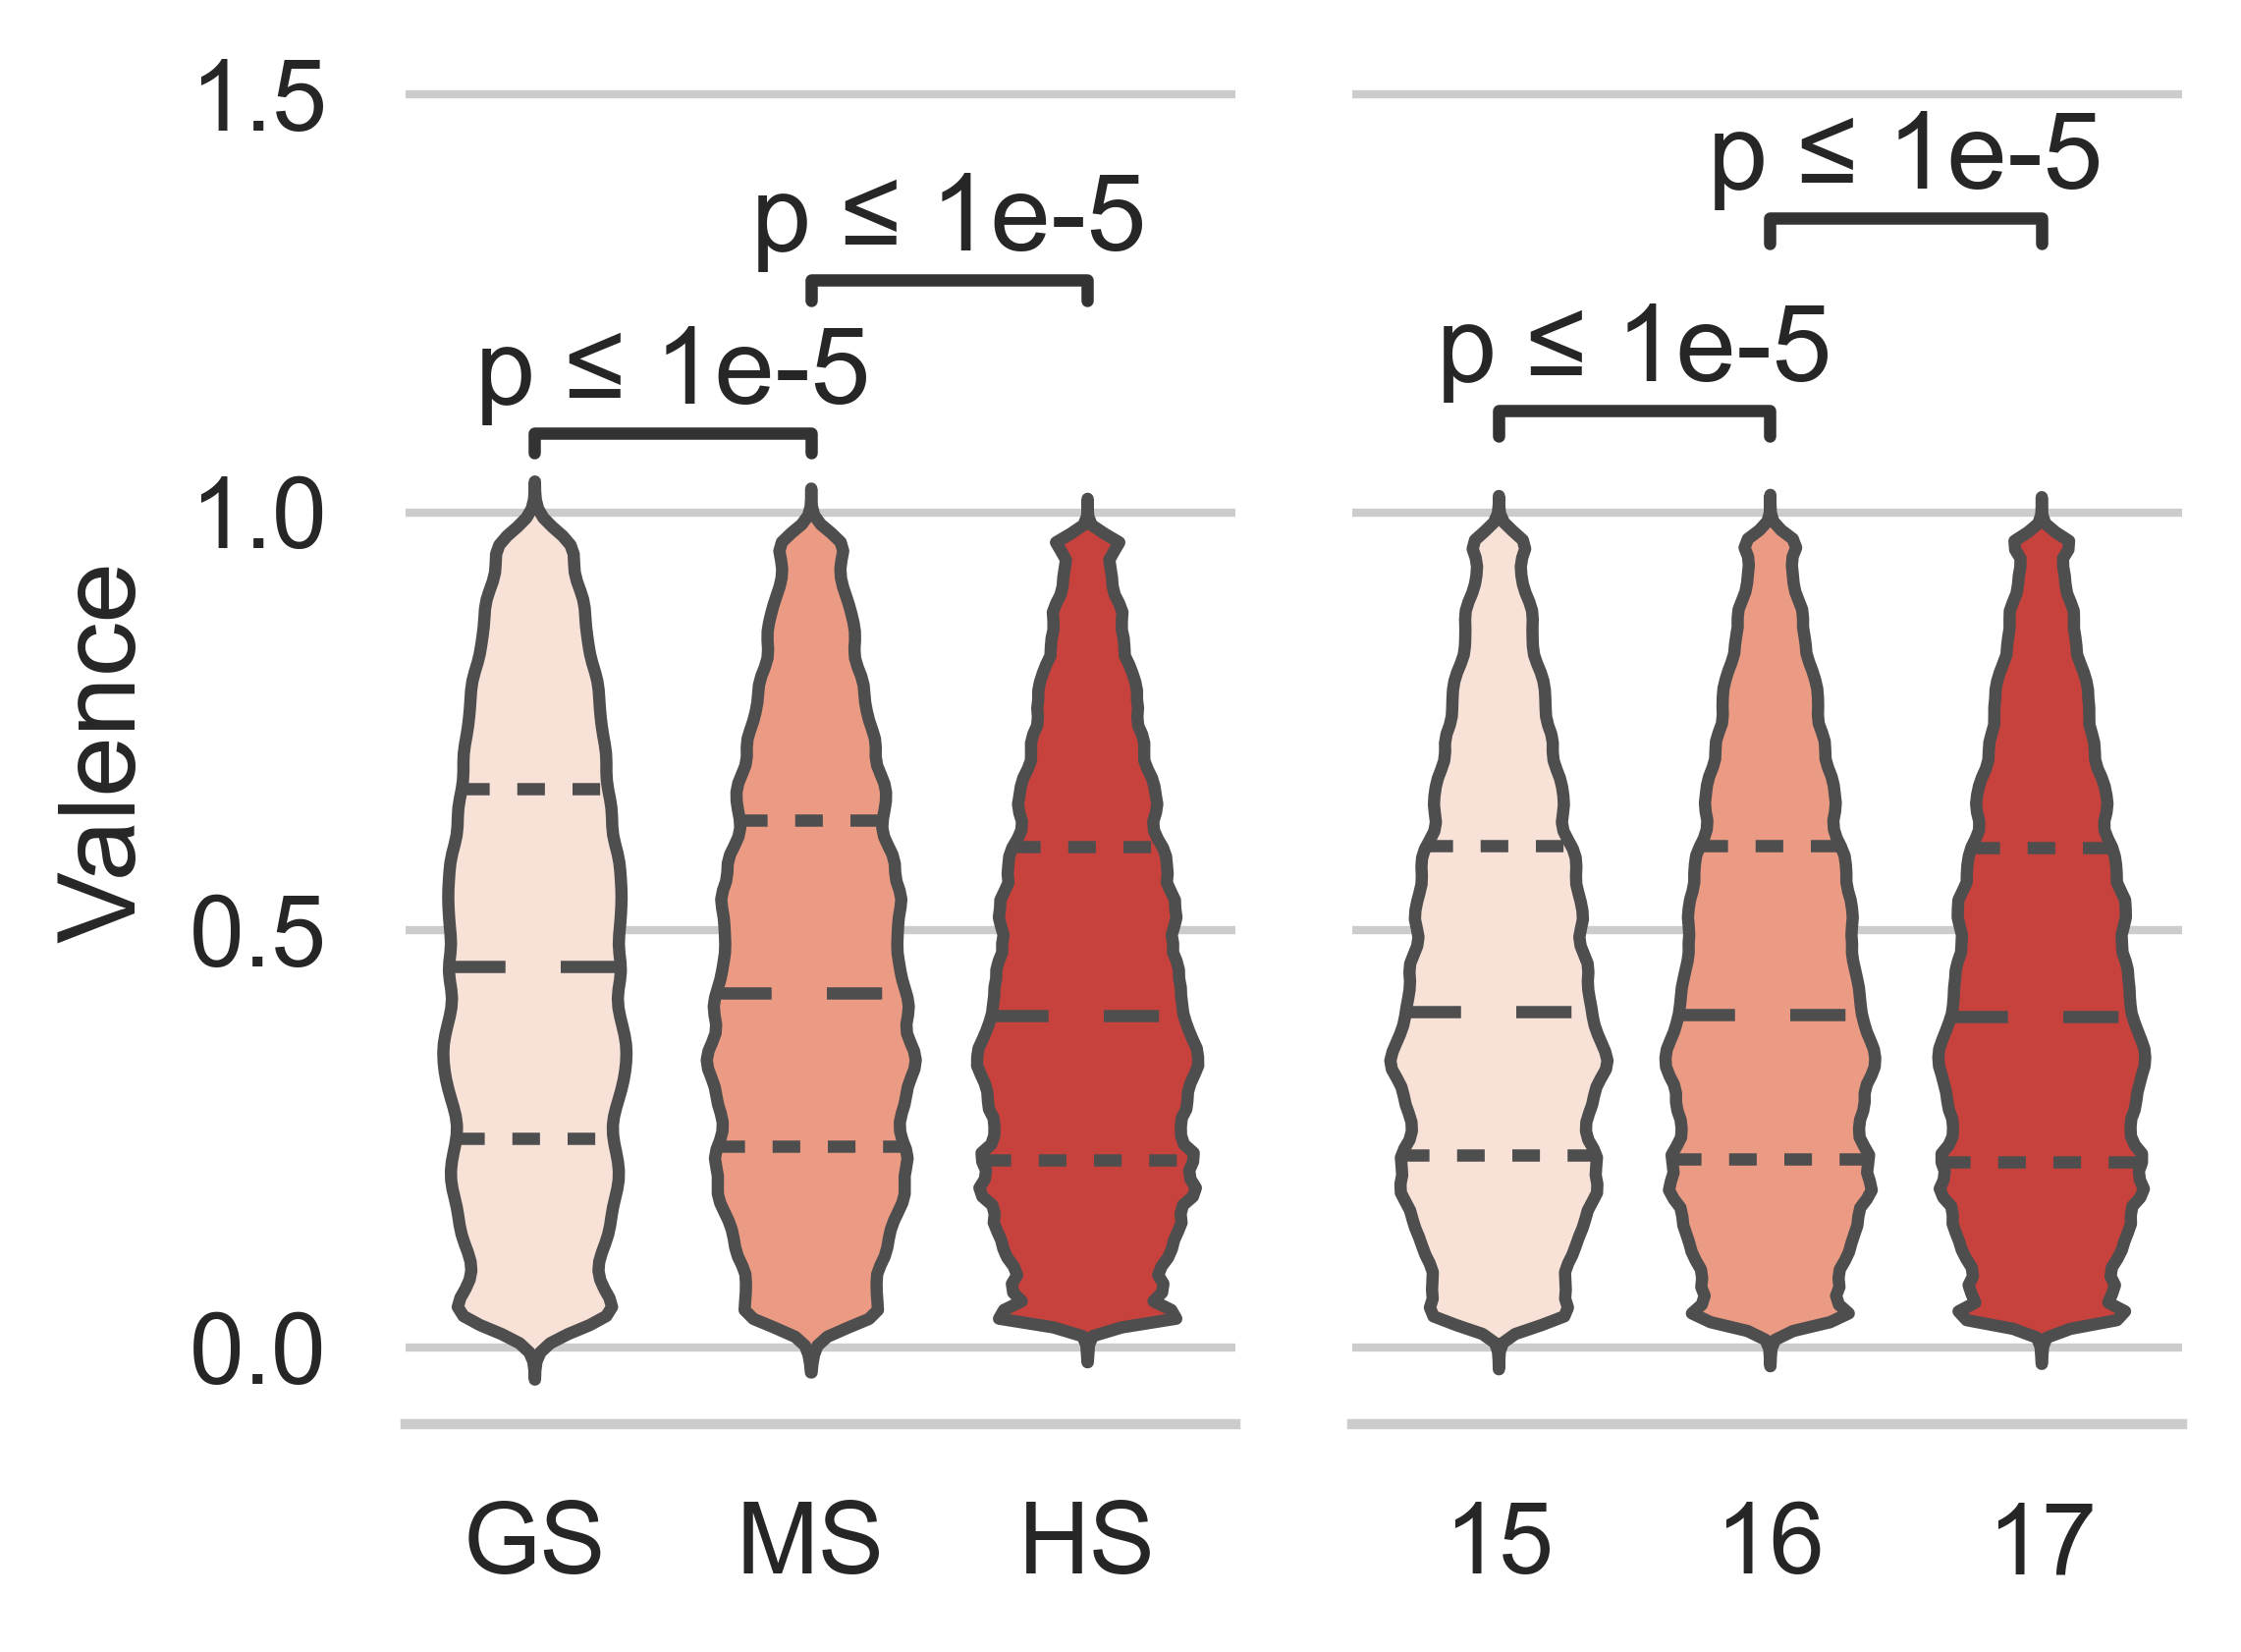

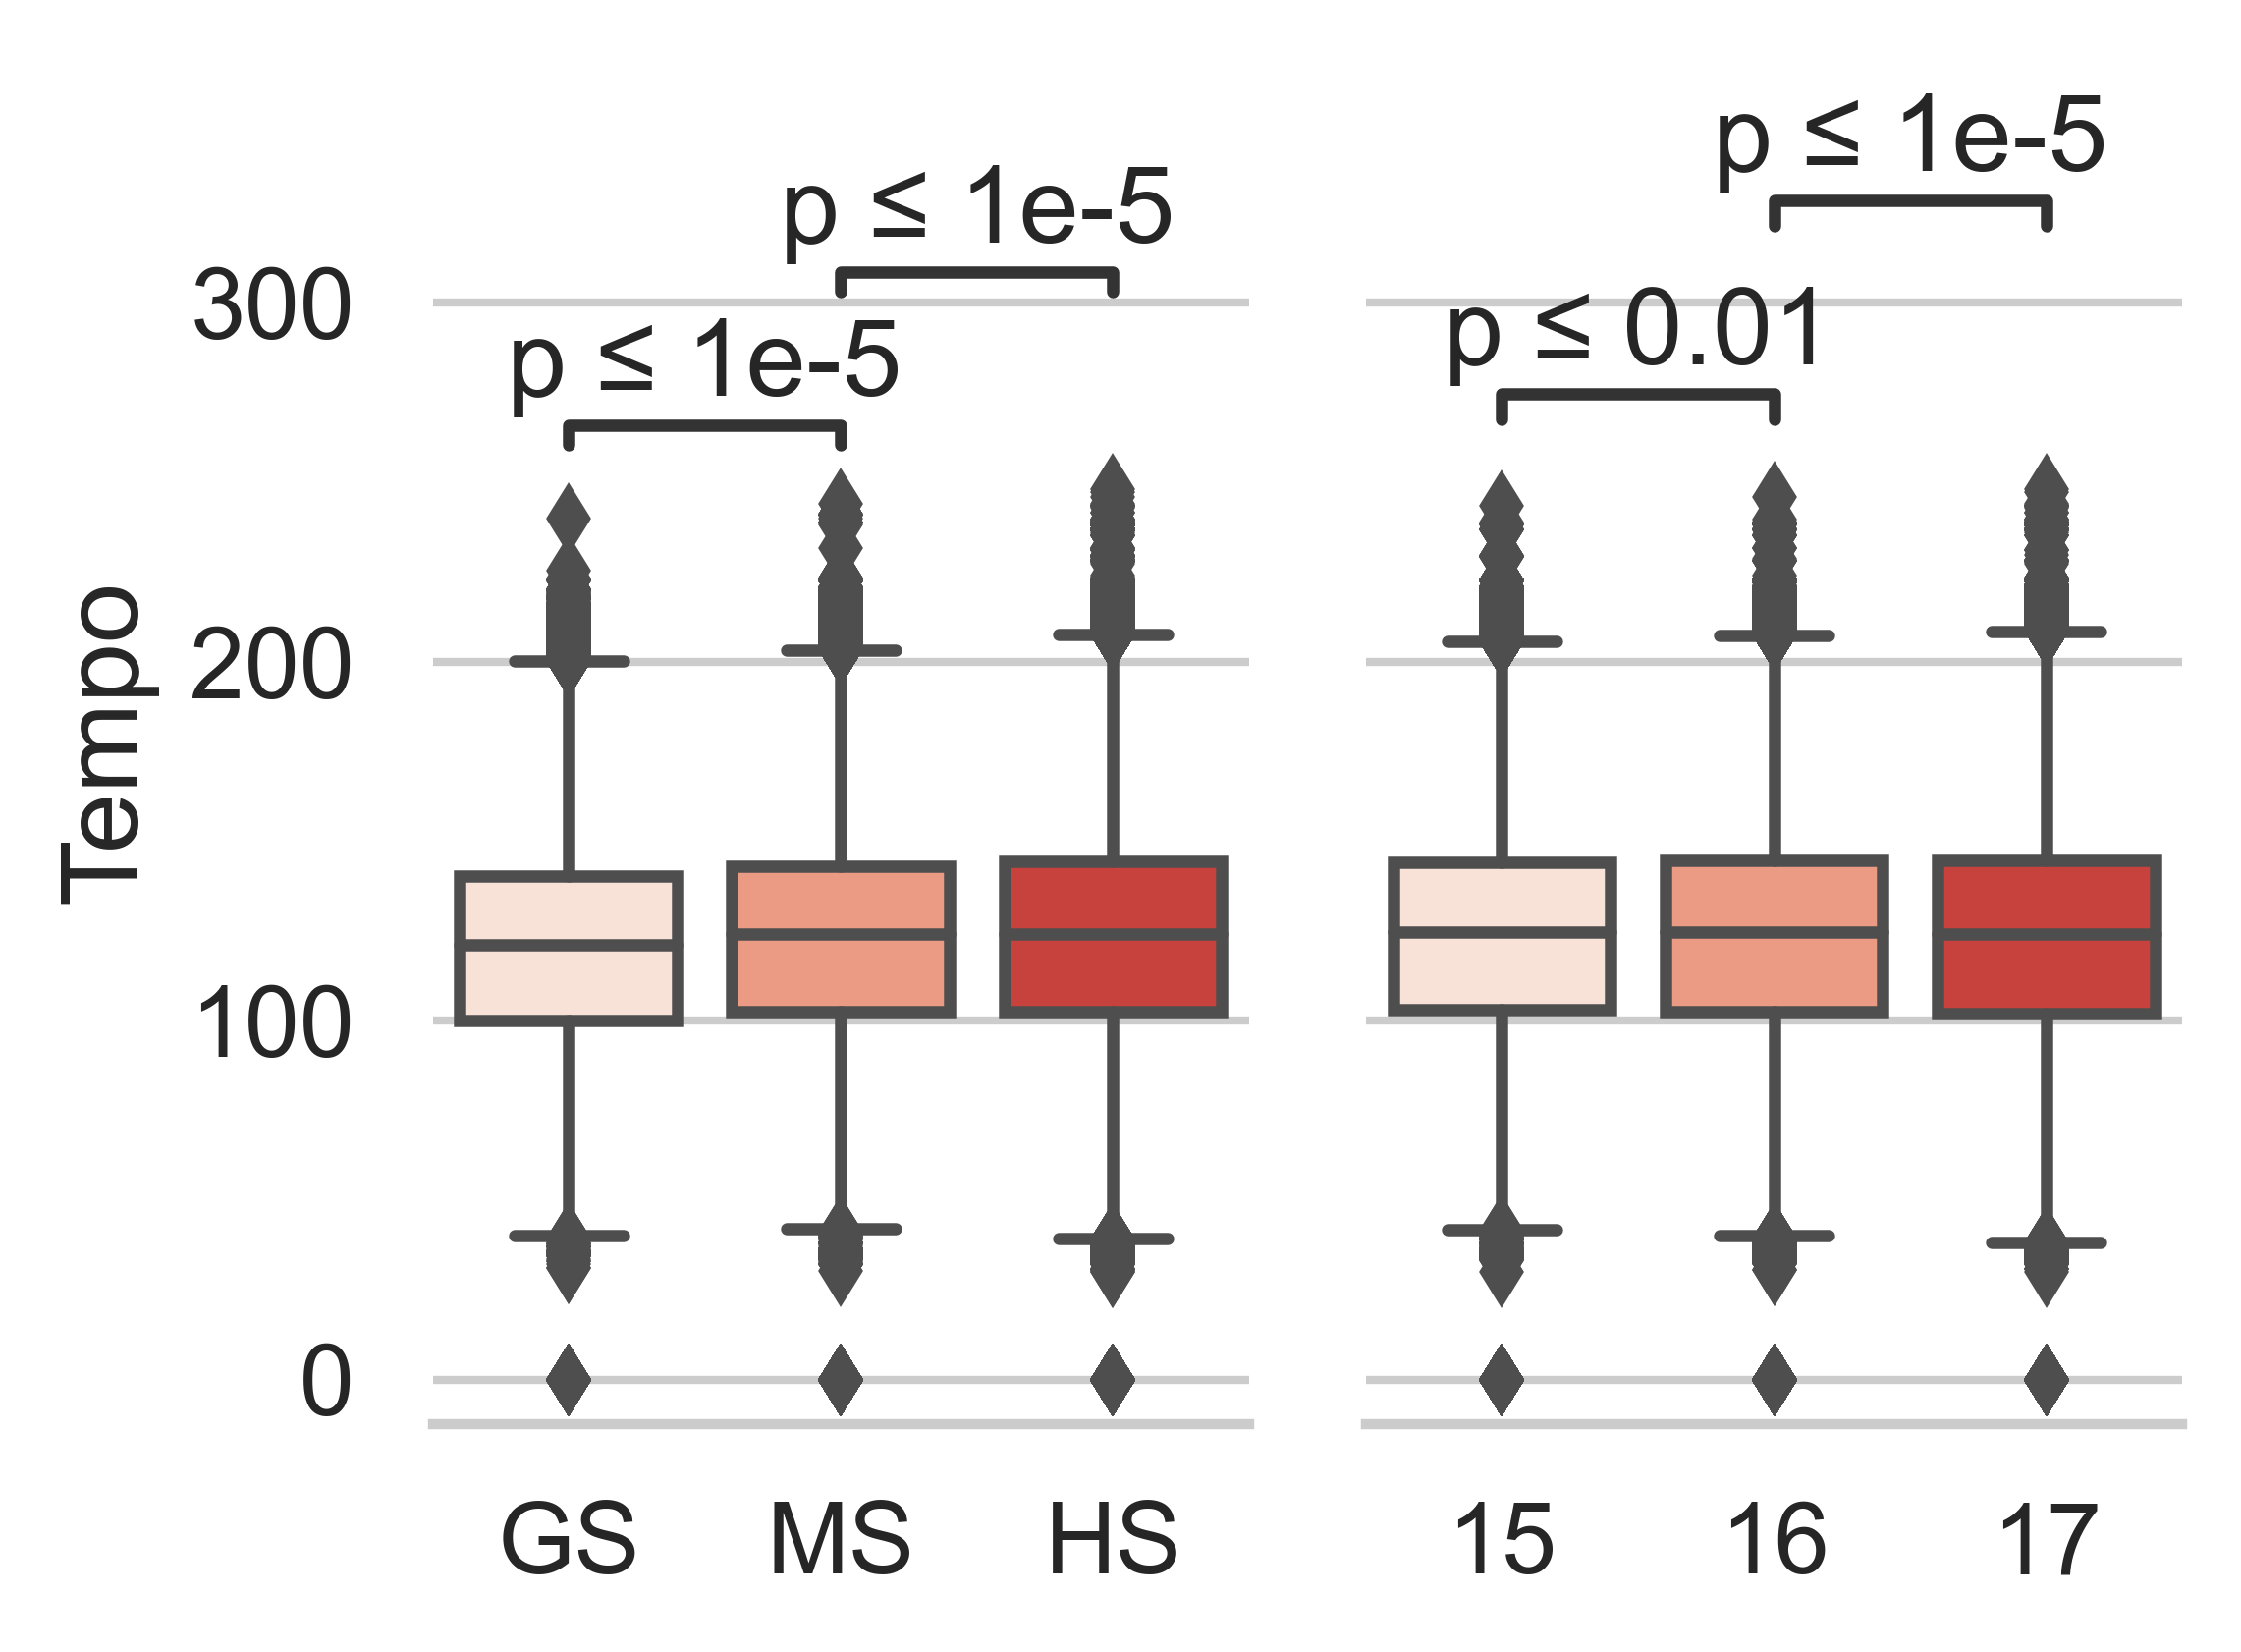

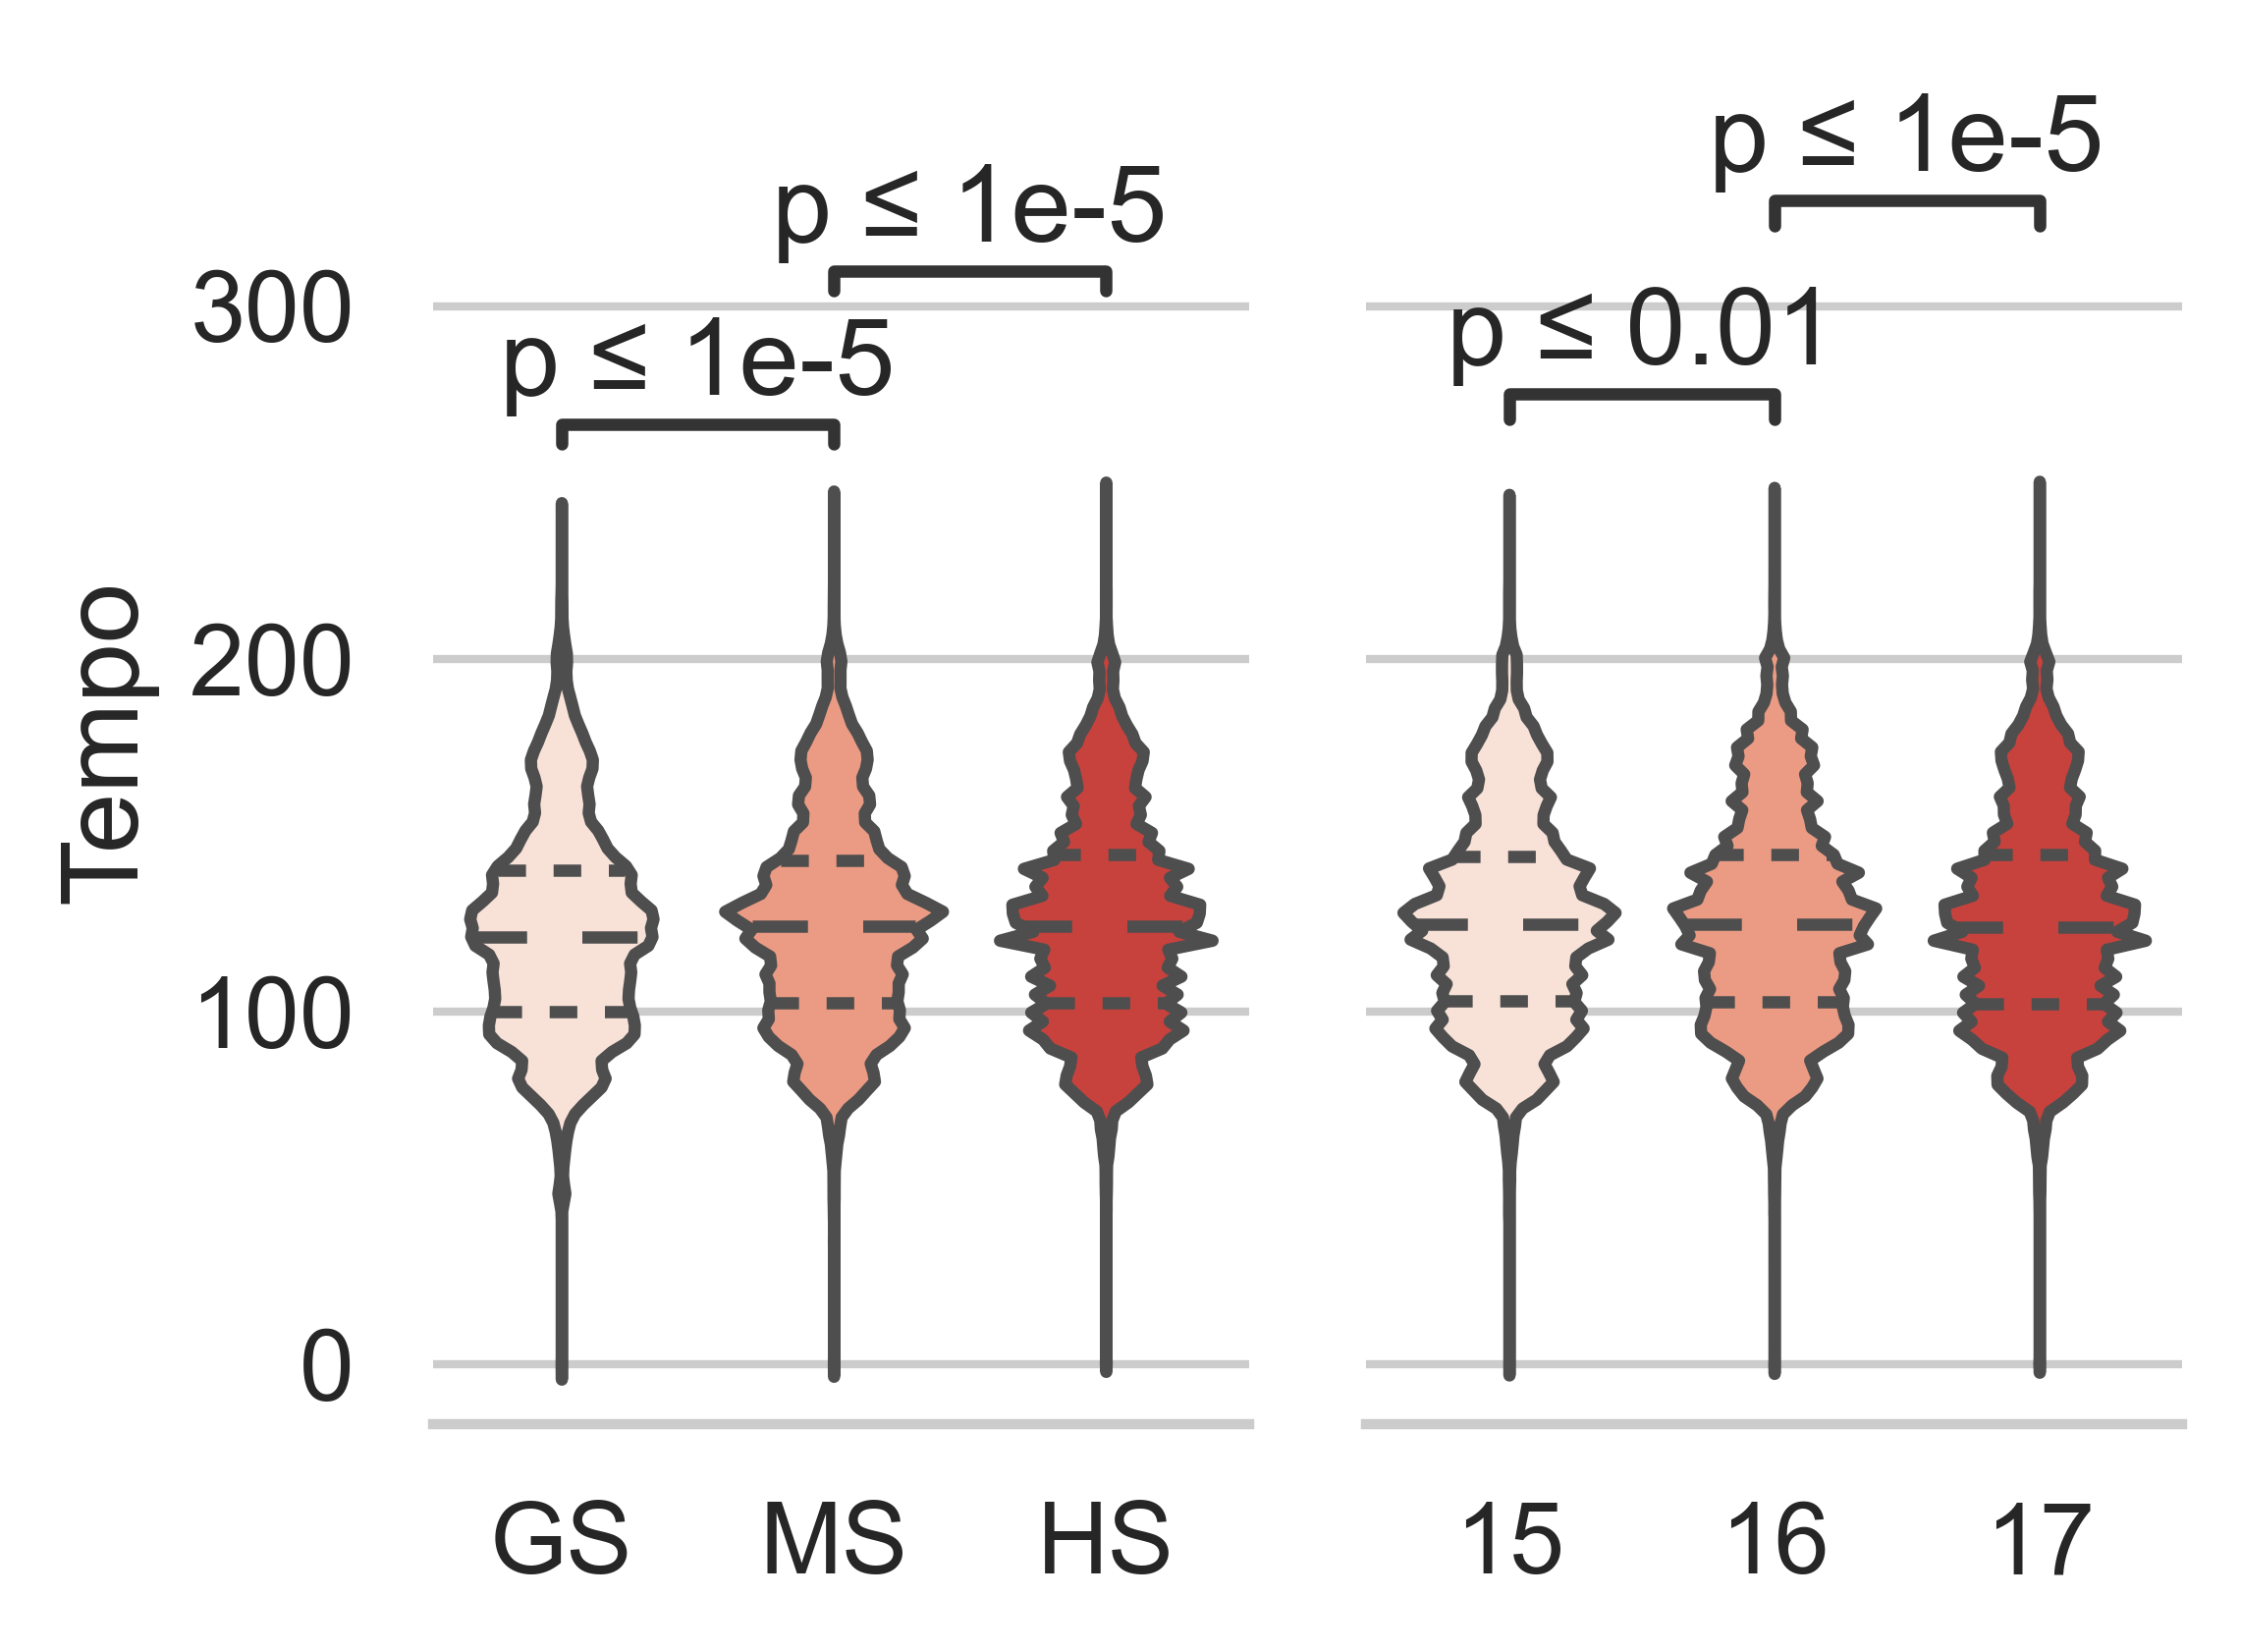

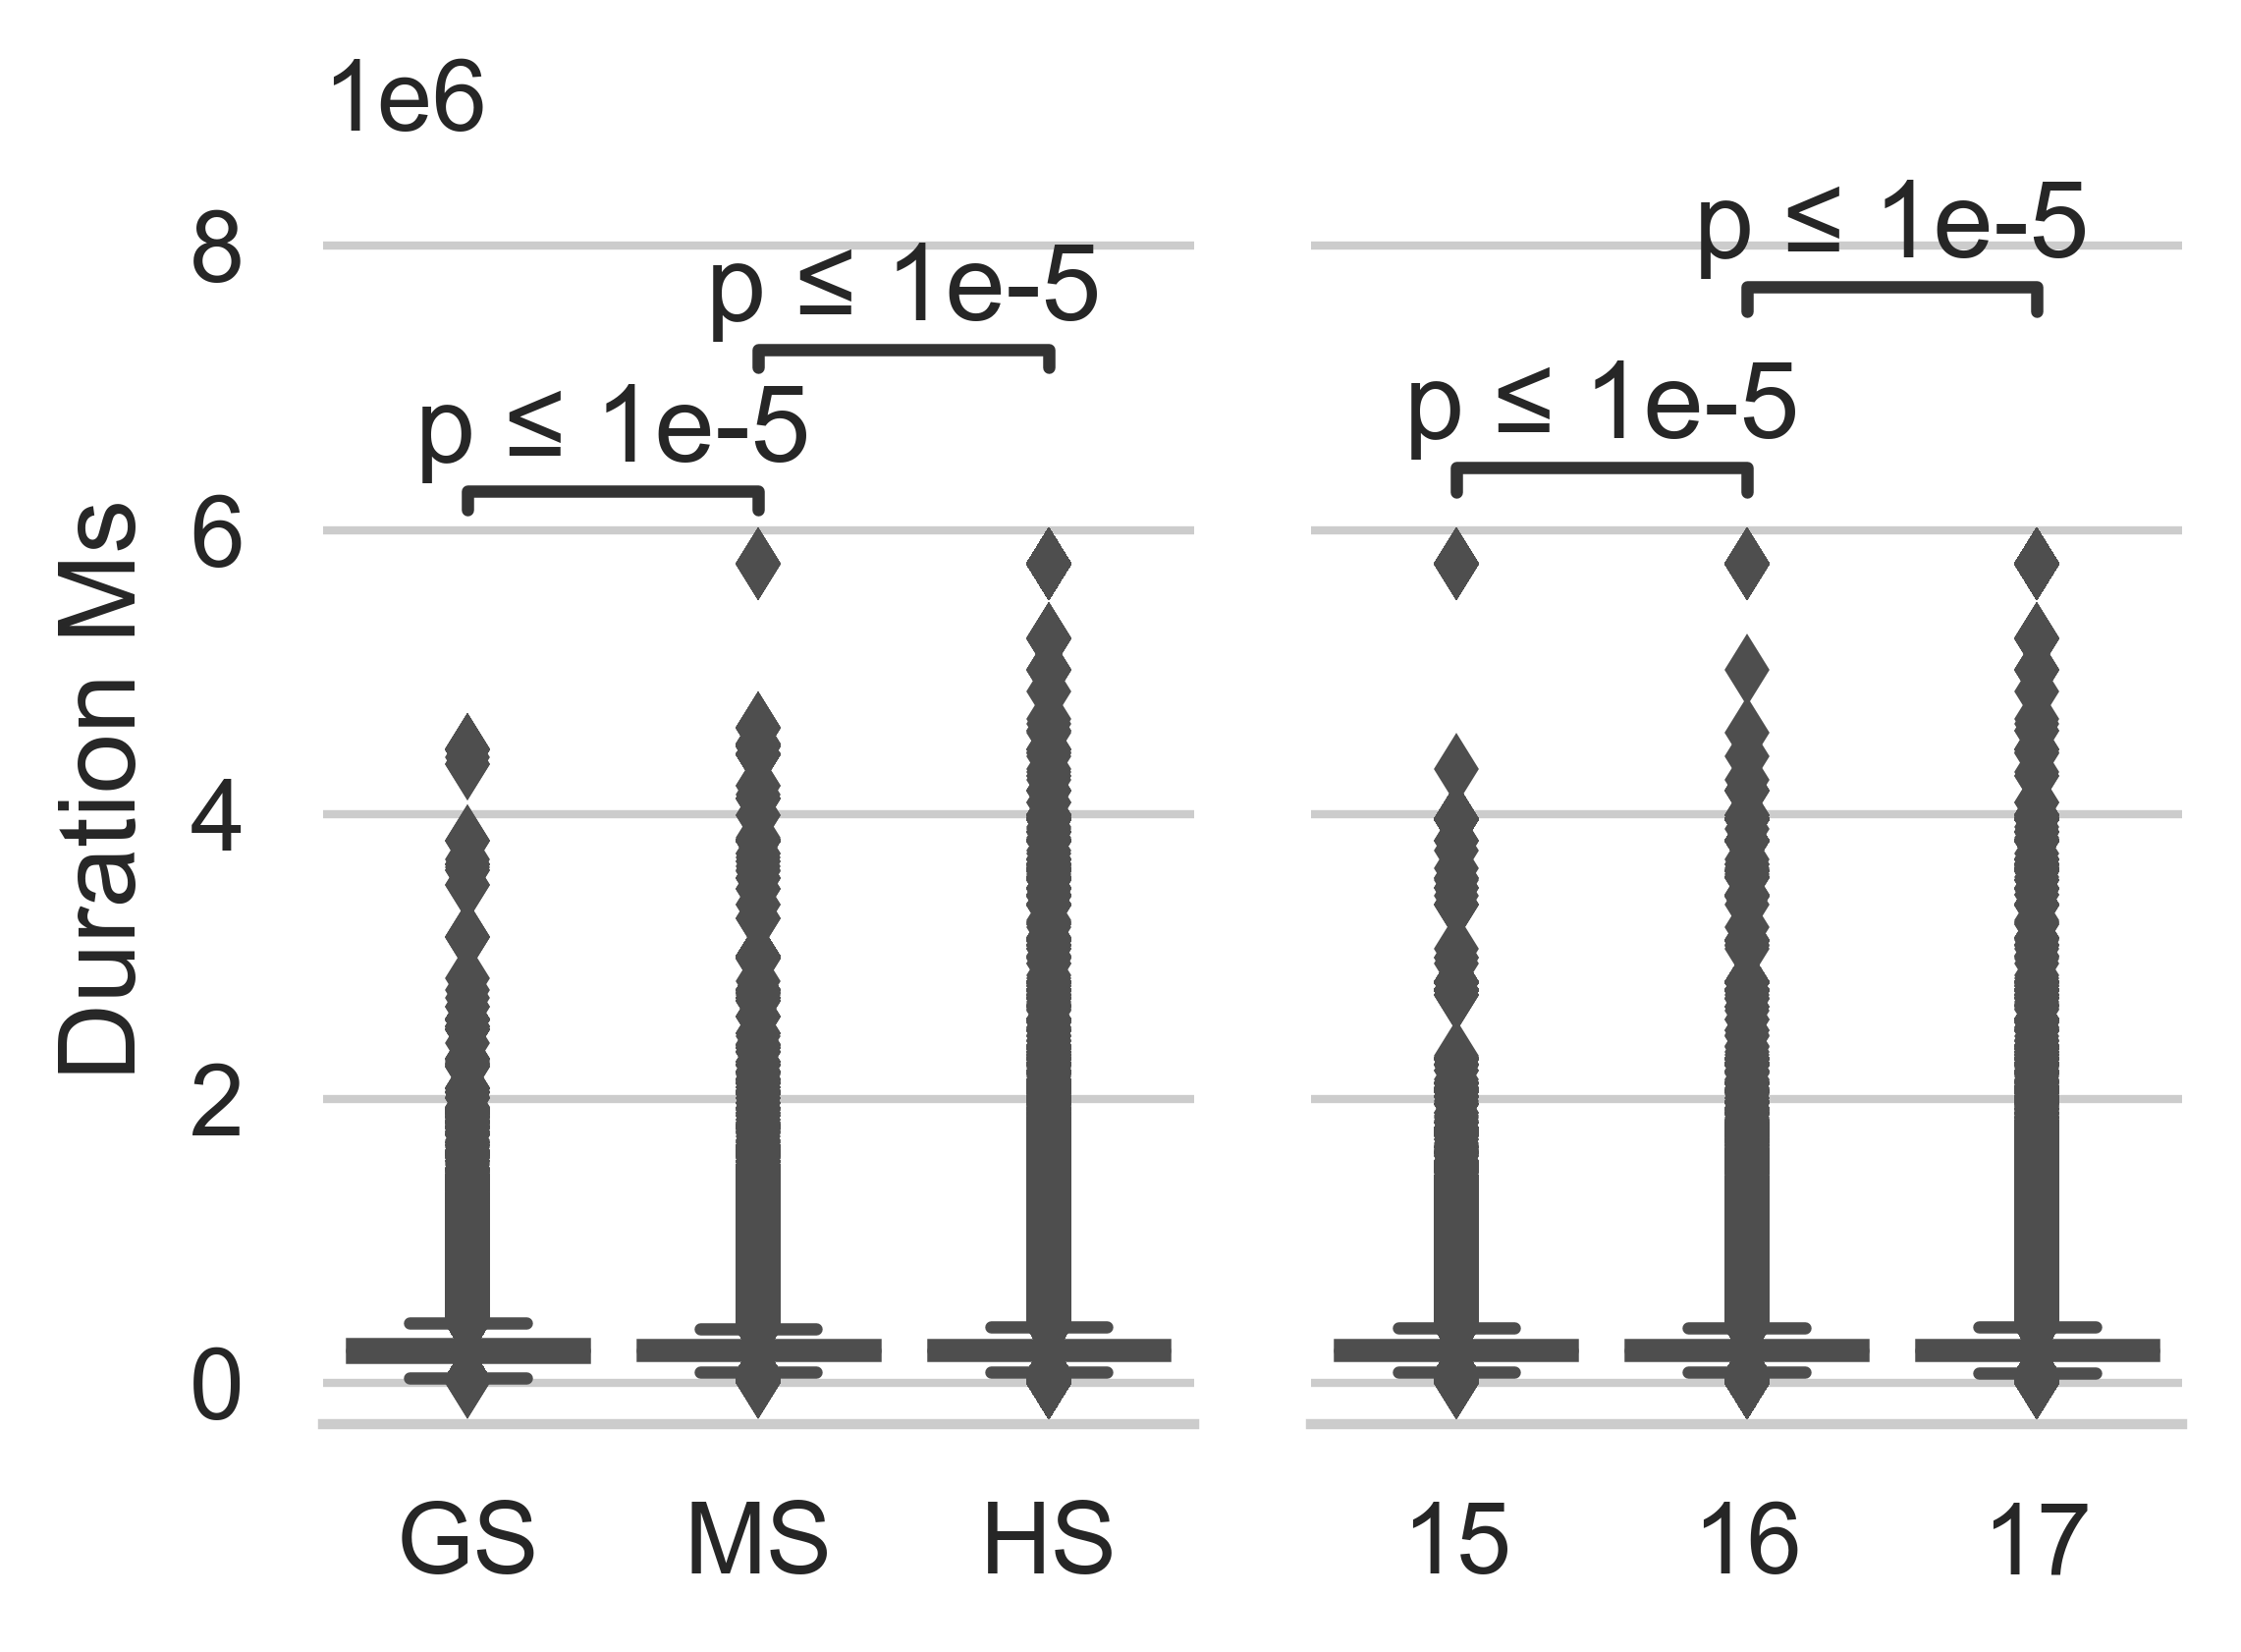

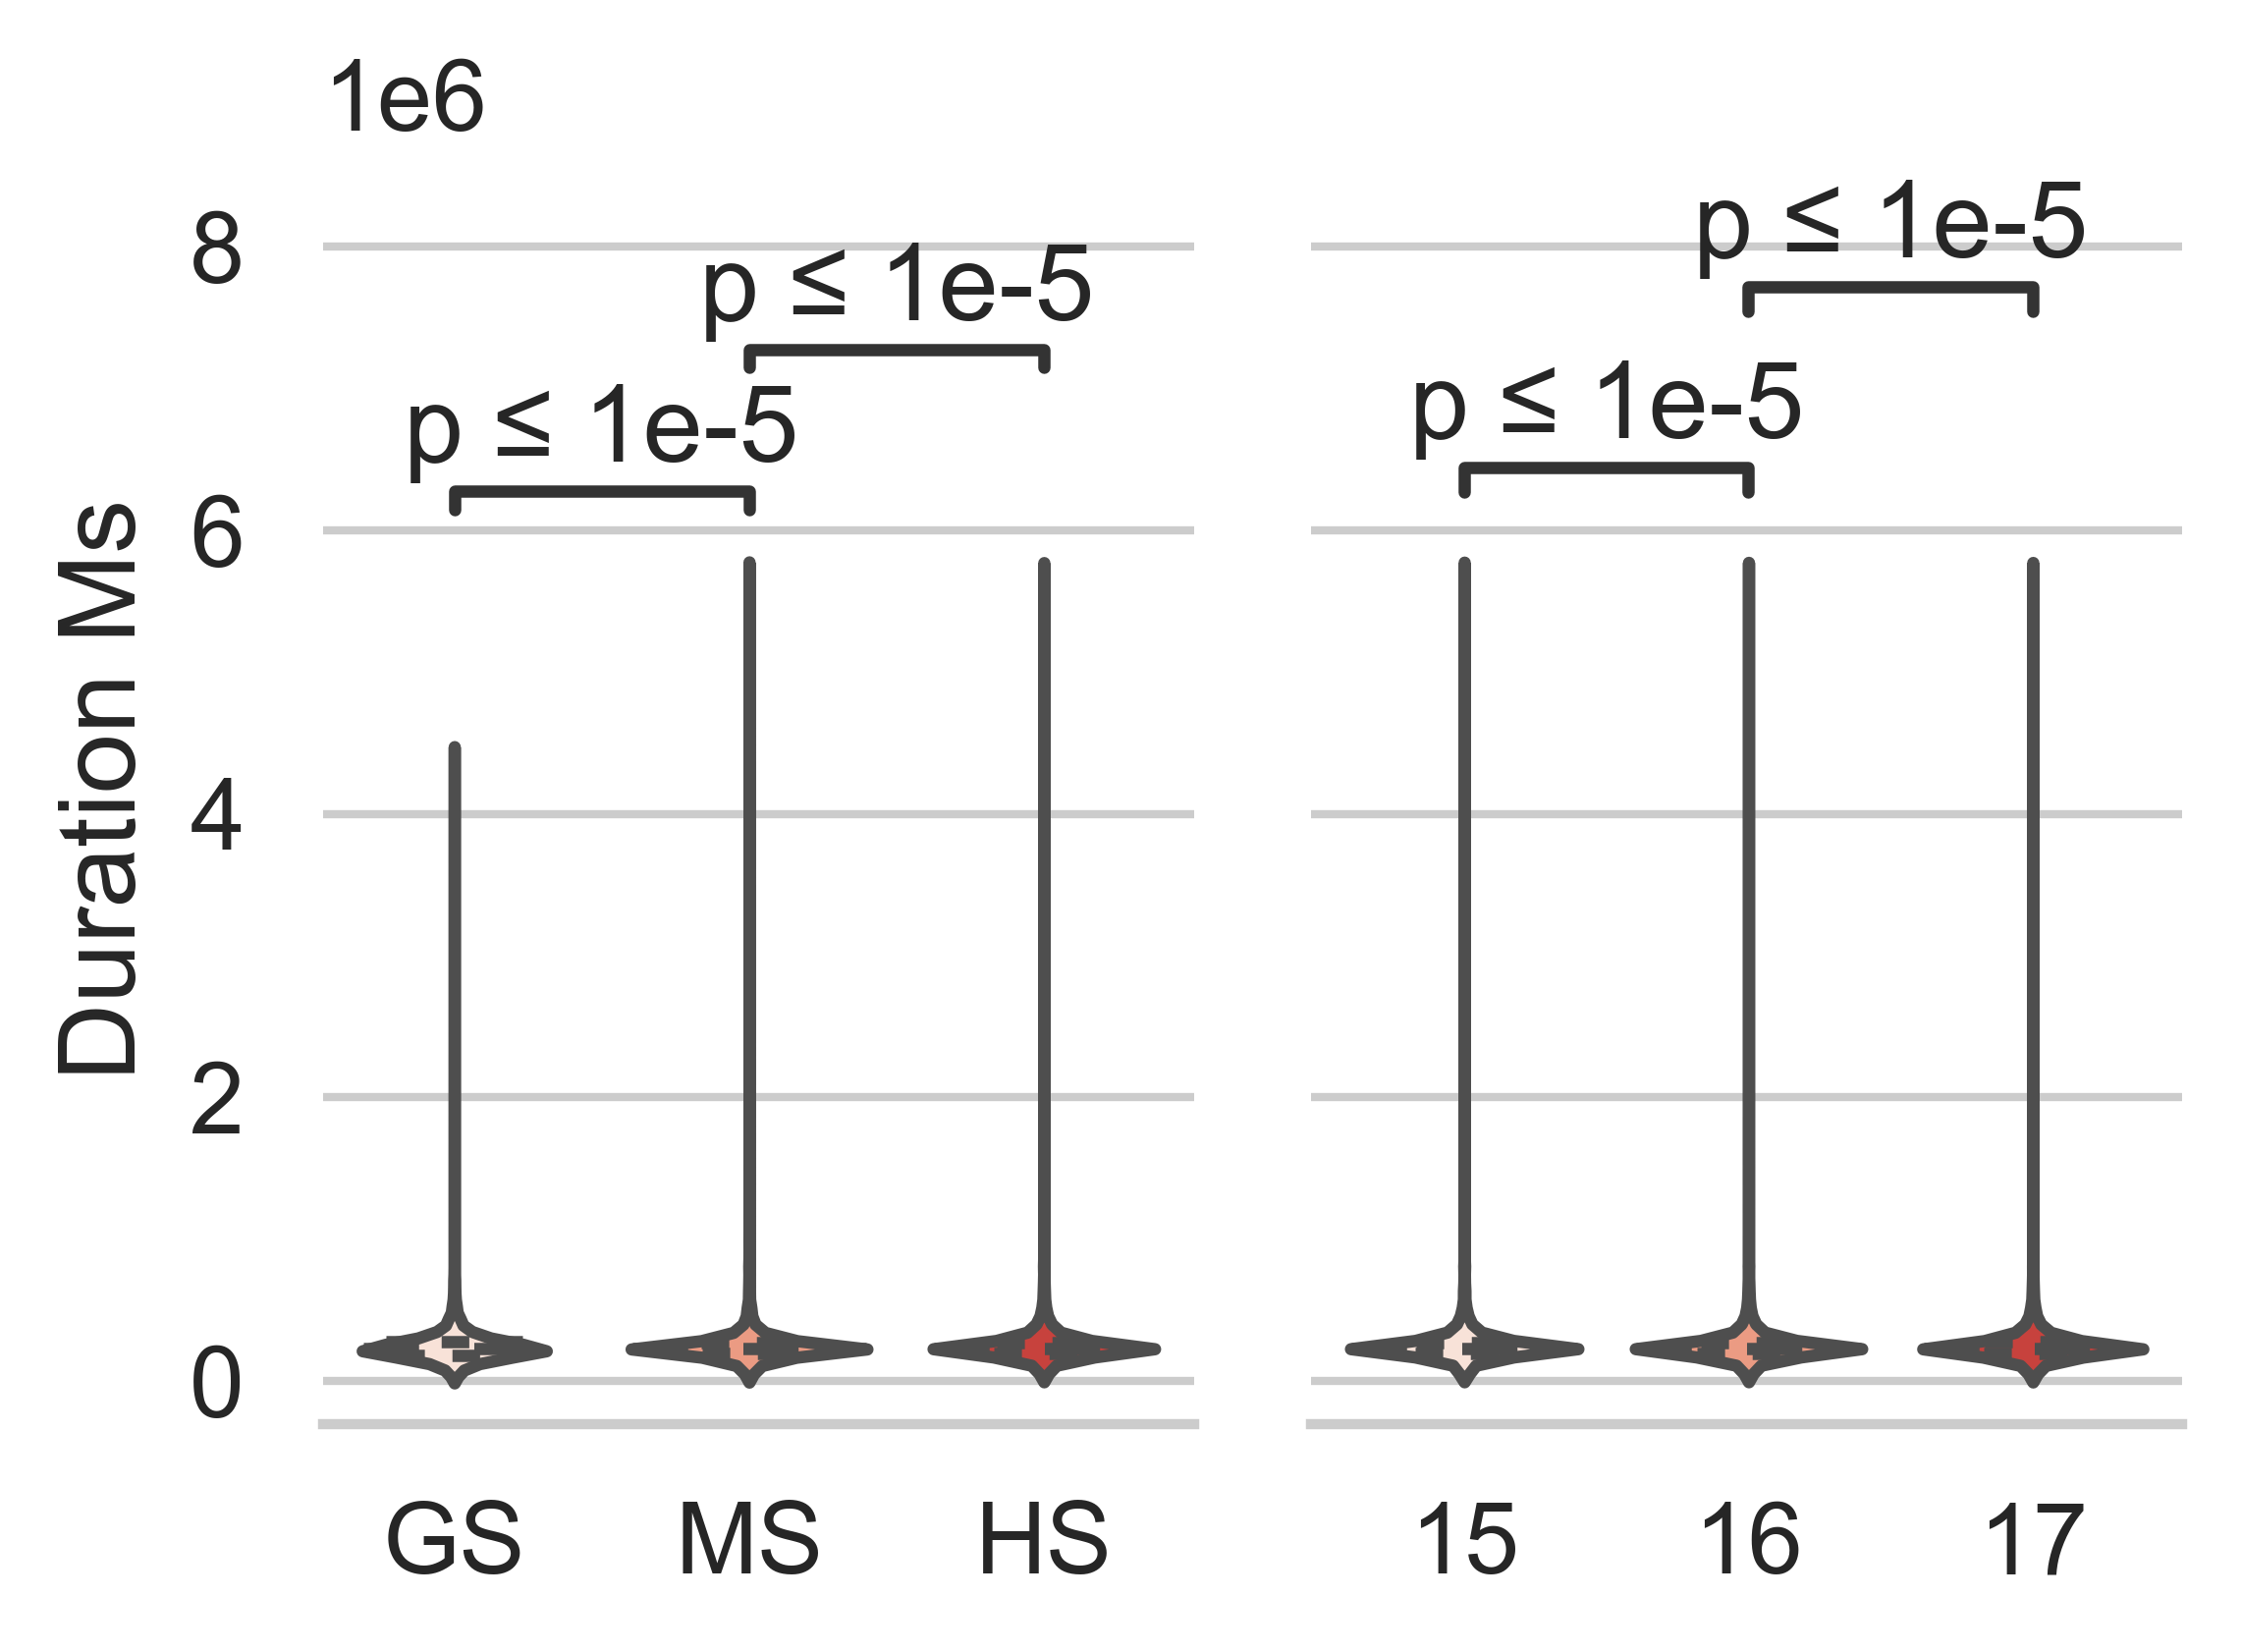

In [25]:
for column in data.columns:
    if (column == 'Education Level' or column == 'User Id' or column == 'Age'):
        continue

    fig, axs = plt.subplots(ncols = 2, figsize=figureSize, sharey = True, dpi = dpi)
    g = sns.boxplot(x = 'Education Level', y = column, data = data, ax = axs[0])
    g.set(xlabel = None)

    test_results = add_stat_annotation(g, data = data, x = 'Education Level', y = column,
                                       box_pairs=pairwise(data['Education Level'].cat.categories),
                                       test='t-test_ind', text_format='simple',
                                       loc='inside', verbose=0, comparisons_correction=None)
    
    graphData = data[data['Education Level'] == 'HS']
    g = sns.boxplot(x = 'Age', y = column, data = graphData, ax = axs[1])

    test_results = add_stat_annotation(g, data = graphData, x = 'Age', y = column,
                                       box_pairs=pairwise(sorted(graphData['Age'].unique())),
                                       test='t-test_ind', text_format='simple',
                                       loc='inside', verbose=0, comparisons_correction=None)
    
    g.set(ylabel = None, xlabel = None)
    
    sns.despine(left = True)
    plt.tight_layout()
    plt.savefig('../output/' + column + '.png', bbox_inches='tight', pad_inches = padInches, dpi = dpi)
    plt.show();
    
    fig, axs = plt.subplots(ncols = 2, figsize=figureSize, sharey = True, dpi = dpi)
    g = sns.violinplot(x = 'Education Level', y = column, data = data, inner = 'quartile', ax = axs[0])
    g.set(xlabel = None)

    test_results = add_stat_annotation(g, data = data, x = 'Education Level', y = column,
                                       box_pairs=pairwise(data['Education Level'].cat.categories),
                                       test='t-test_ind', text_format='simple',
                                       loc='inside', verbose=0, comparisons_correction=None)
    
    graphData = data[data['Education Level'] == 'HS']
    g = sns.violinplot(x = 'Age', y = column, data = graphData, inner = 'quartile', ax = axs[1])

    test_results = add_stat_annotation(g, data = graphData, x = 'Age', y = column,
                                       box_pairs=pairwise(sorted(graphData['Age'].unique())),
                                       test='t-test_ind', text_format='simple',
                                       loc='inside', verbose=0, comparisons_correction=None)
    
    g.set(ylabel = None, xlabel = None)
    
    sns.despine(left = True)
    plt.tight_layout()
    plt.savefig('../output/' + column + '-violin' + fileFormat, bbox_inches='tight', pad_inches = padInches, dpi = dpi)
    plt.show();

## Calculating Top X Artist Genres
### Common

In [26]:
def CountListeningEventsIn(genres):
    result = artistToGenre[artistToGenre['Genre'].isin(genres)][['Artist']].drop_duplicates()
    result = userToArtistCounts.merge(result, on = 'Artist')
    result = result.groupby(['Education Level', 'Age'], observed = True).agg(Total = ('Count', 'sum'))
    result = result.rename(columns = {'Total': len(genres)})
    
    return result

In [27]:
userToArtistCounts = pd.read_parquet('../data/LastFM1bKidListeningEventsWithUsers', columns = ['Education Level', 'Age', 'Artist'])
userToArtistCounts = userToArtistCounts.groupby(['Education Level', 'Age', 'Artist'], observed = True).agg(Count = ('Artist', 'count')).reset_index()
userToArtistCounts.head(5)

Education Level  Age          Artist  Count
0              HS   15  I BREAK HORSES      5
1              HS   15    TAYLOR SWIFT  15038
2              HS   15             HIM   2180
3              HS   15       AMARANTHE   1792
4              HS   15        SERENITY      6

In [28]:
totalsEducation = userToArtistCounts.groupby(['Education Level']).agg(Total = ('Count', 'sum'))
totalsEducation

Total
Education Level          
GS                 951840
MS                2385849
HS               33758826

In [29]:
totalsAge = userToArtistCounts[userToArtistCounts['Education Level'] == 'HS'].groupby(['Age']).agg(Total = ('Count', 'sum'))
totalsAge

Total
Age          
15    4296583
16    9747692
17   19714551

### Artist Genre Freebase Top X
#### Prepping data

In [30]:
artistToGenre = pd.read_parquet('../data/LastFM1bKidArtistToFreebaseGenre.gzip.parquet')
artistToGenre.head(5)

Artist        Genre
0       MEGADETH  HEAVY METAL
1  DREAM THEATER  HEAVY METAL
2    AMON AMARTH  HEAVY METAL
3   ALTER BRIDGE  HEAVY METAL
4    LIMP BIZKIT  HEAVY METAL

In [31]:
genreRanking = pd.read_parquet('../data/LastFM1bKidListeningEventsWithUsers', columns = ['Artist', 'User Id'])
genreRanking = genreRanking.groupby(['Artist']).agg(ArtistCount = ('User Id', 'count')).reset_index()
genreRanking = genreRanking.merge(artistToGenre, on = 'Artist')
genreRanking.drop(columns = ['Artist'], inplace = True)
genreRanking = genreRanking.groupby(['Genre'], observed = True).agg(Count = ('ArtistCount', 'sum')).reset_index()
genreRanking.head(5)

Genre     Count
0              ROCK  23655957
1               POP  15639176
2             DANCE   7144843
3  ALTERNATIVE ROCK  16203257
4       ALTERNATIVE  23240358

In [32]:
calculations = pd.DataFrame({'Genres': itertools.accumulate(map(lambda x: [x], genreRanking['Genre'].head(5).to_list()))})
calculations

Genres
0                                             [ROCK]
1                                        [ROCK, POP]
2                                 [ROCK, POP, DANCE]
3               [ROCK, POP, DANCE, ALTERNATIVE ROCK]
4  [ROCK, POP, DANCE, ALTERNATIVE ROCK, ALTERNATIVE]

In [33]:
data = calculations['Genres'].swifter.allow_dask_on_strings(enable = True).apply(CountListeningEventsIn)
data = pd.concat(data.to_list(), axis = 1)
data = data.reset_index()

Dask Apply:   0%|          | 0/4 [00:00<?, ?it/s]

### Graphs

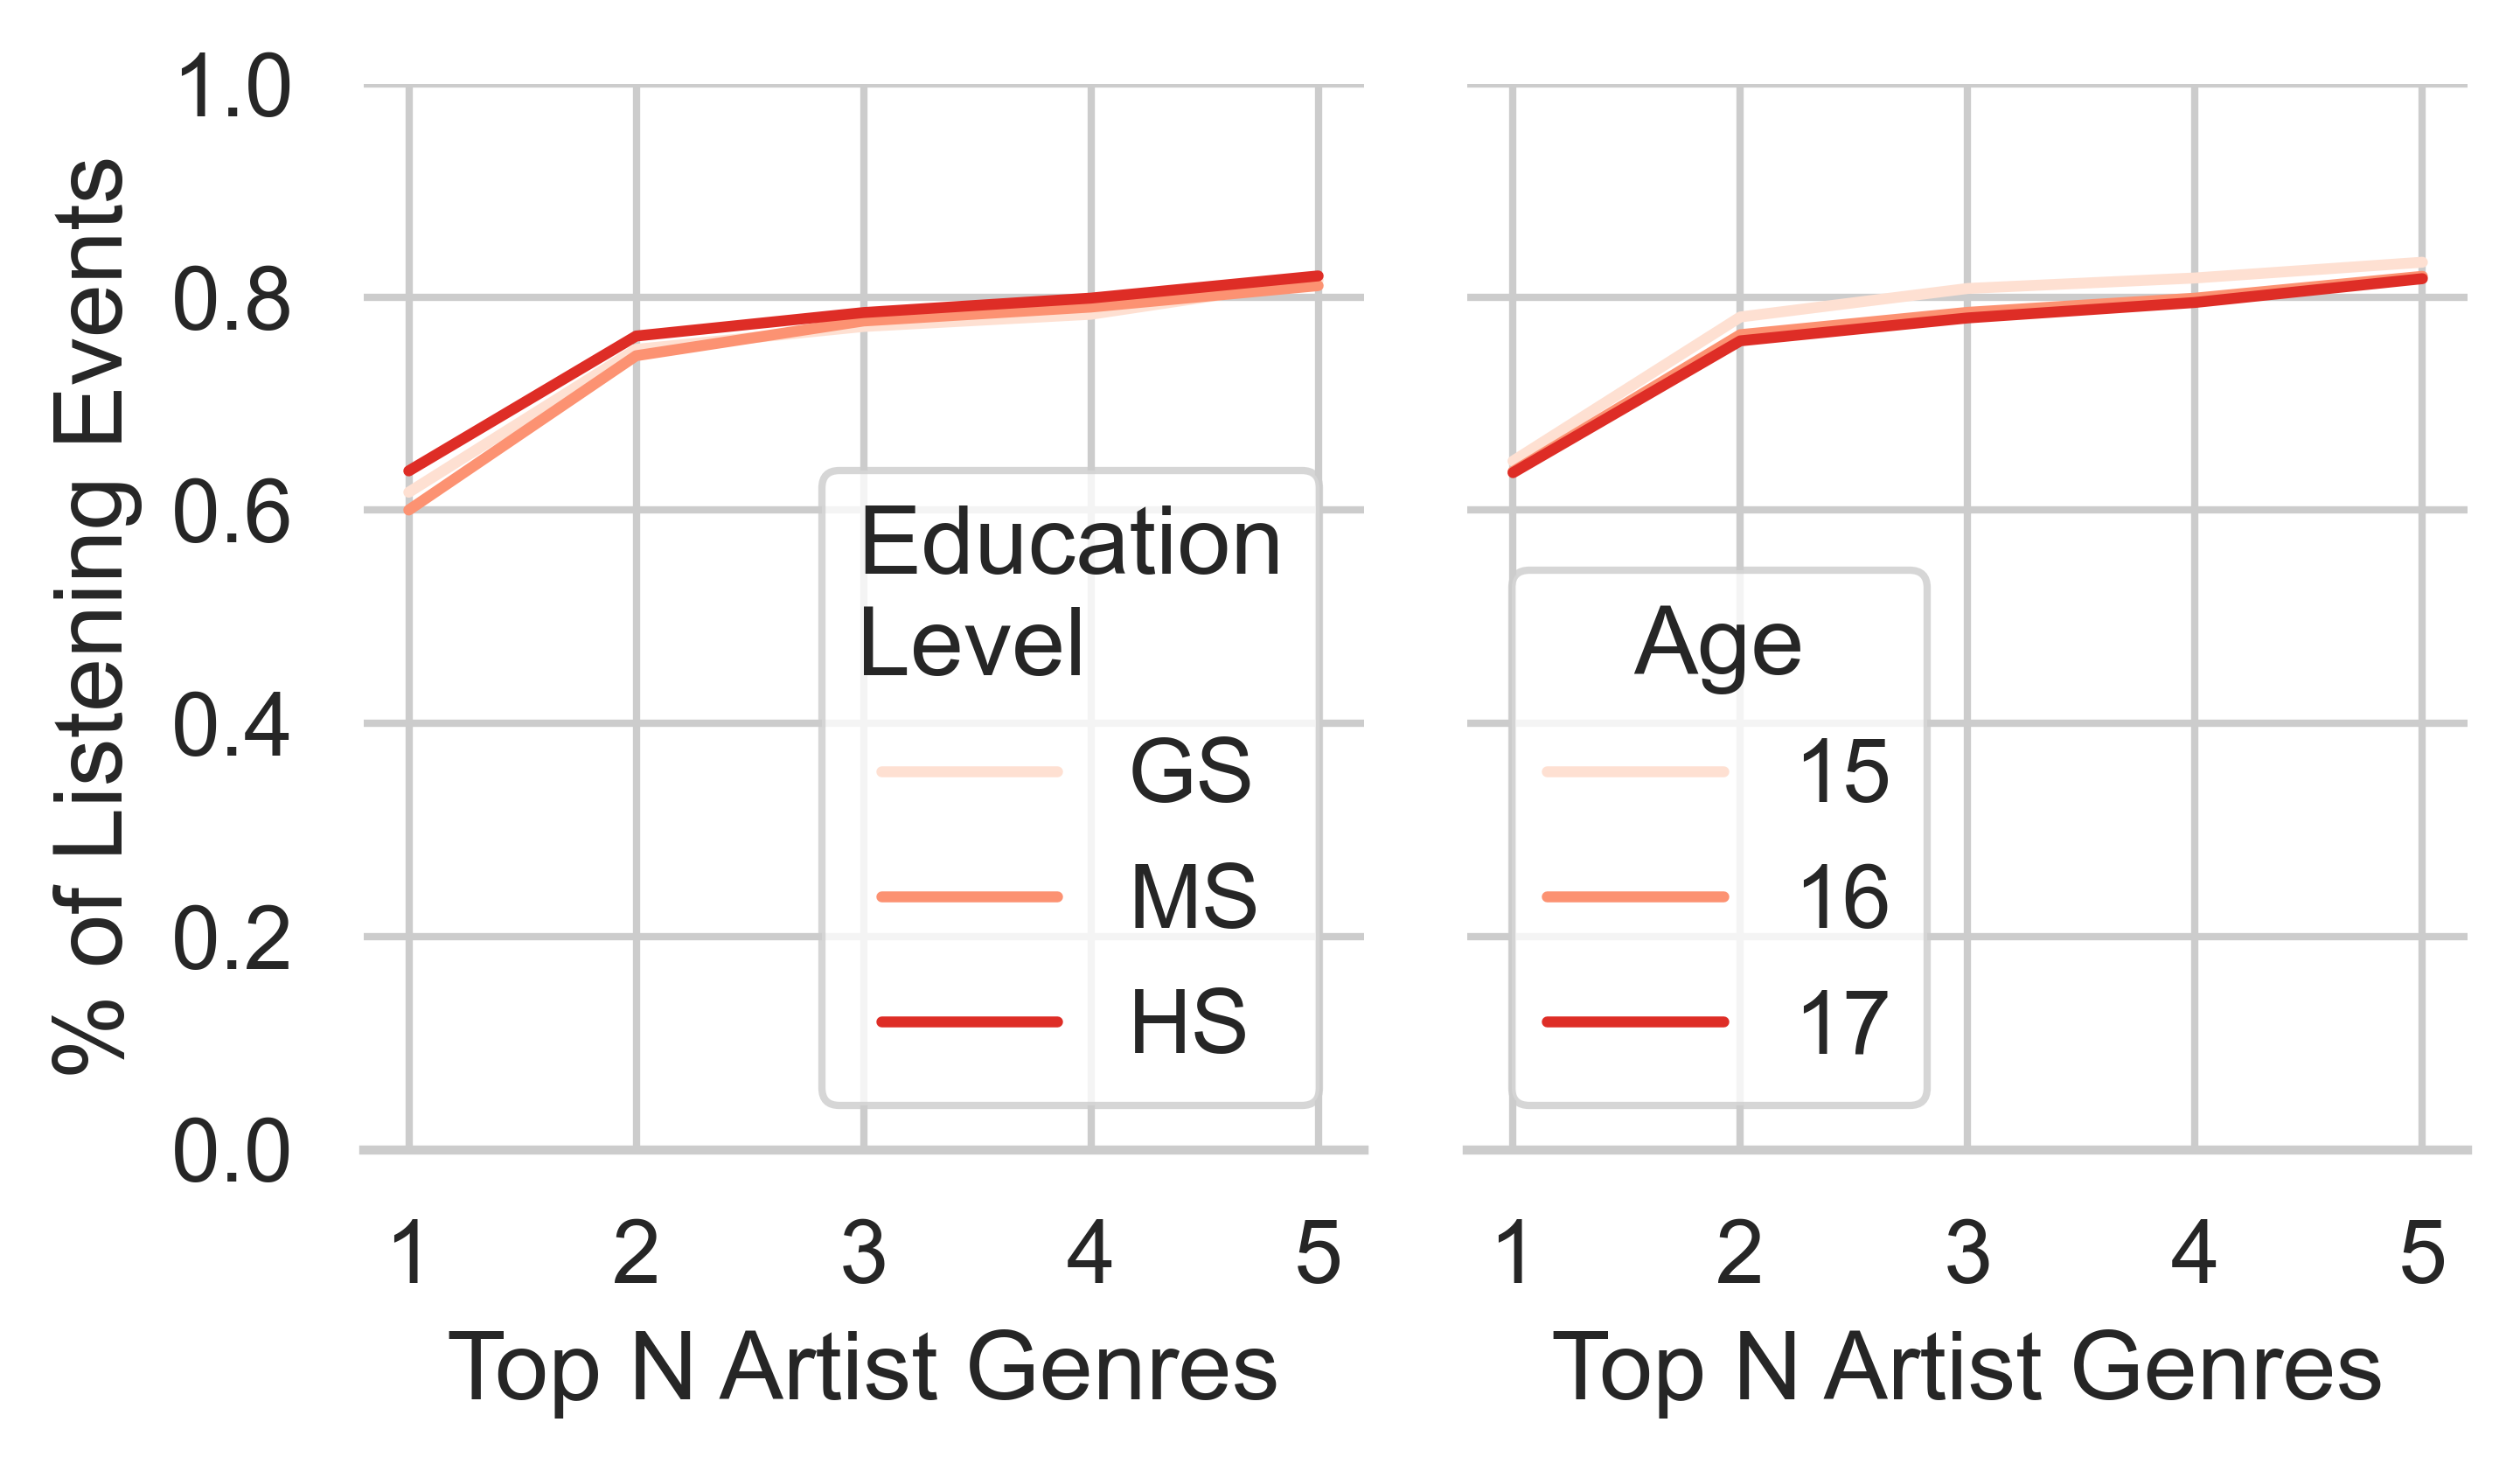

In [34]:
figureSize = (5, 3)

fig, axs = plt.subplots(ncols = 2, figsize=figureSize, sharey = True, dpi = dpi)

graphData = data.drop(columns = 'Age').rename(columns = {'Education Level': 'Education\nLevel'}).groupby('Education\nLevel').sum().unstack().reset_index().rename(columns = {'level_0': 'Top X Artist Genres', 0: 'Listening Event Count'})
graphData = graphData.merge(totalsEducation, left_on = 'Education\nLevel', right_on = 'Education Level')
graphData['% of Listening Events'] = graphData['Listening Event Count'] / graphData['Total']

g = sns.lineplot(data = graphData, x = 'Top X Artist Genres', hue = 'Education\nLevel', y = '% of Listening Events', ax = axs[0])

g.set(xticks = range(1, 6), xlabel = 'Top N Artist Genres', ylim = (0, 1))

graphData = data[data['Education Level'] == 'HS']
graphData = graphData.drop(columns = 'Education Level').set_index('Age').unstack().reset_index().rename(columns = {'level_0': 'Top X Artist Genres', 0: 'Listening Event Count'})
graphData = graphData.merge(totalsAge, on = 'Age')
graphData['% of Listening Events'] = graphData['Listening Event Count'] / graphData['Total']
graphData['Age'] = graphData['Age'].astype(str)

g = sns.lineplot(data = graphData, x = 'Top X Artist Genres', hue = 'Age', y = '% of Listening Events', ax = axs[1])

g.set(ylabel = None, xticks = range(1, 6), xlabel = 'Top N Artist Genres', ylim = (0, 1))

sns.despine(left = True)
plt.tight_layout()
plt.savefig('../output/Freebase Top X' + fileFormat, bbox_inches='tight', pad_inches = padInches, dpi = dpi)
plt.show();



### Artist Genre AllMusic Top X
#### Prepping data

In [35]:
artistToGenre = pd.read_parquet('../data/LastFM1bKidArtistToAllMusicGenre.gzip.parquet')
artistToGenre.head(6)

Artist        Genre
0       MEGADETH  HEAVY METAL
1  DREAM THEATER  HEAVY METAL
2    AMON AMARTH  HEAVY METAL
3   ALTER BRIDGE  HEAVY METAL
4    LIMP BIZKIT  HEAVY METAL
5        KABANOS  HEAVY METAL

In [36]:
genreRanking = pd.read_parquet('../data/LastFM1bKidListeningEventsWithUsers', columns = ['Artist', 'User Id'])
genreRanking = genreRanking.groupby(['Artist']).agg(ArtistCount = ('User Id', 'count')).reset_index()
genreRanking = genreRanking.merge(artistToGenre, on = 'Artist')
genreRanking.drop(columns = ['Artist'], inplace = True)
genreRanking = genreRanking.groupby(['Genre'], observed = True).agg(Count = ('ArtistCount', 'sum')).reset_index()
genreRanking.head(5)

Genre     Count
0         ROCK  23655957
1          POP  15639176
2  ALTERNATIVE  23240358
3         PUNK  10402730
4   ELECTRONIC  12304269

In [37]:
calculations = pd.DataFrame({'Genres': itertools.accumulate(map(lambda x: [x], genreRanking['Genre'].head(5).to_list()))})
calculations

Genres
0                                      [ROCK]
1                                 [ROCK, POP]
2                    [ROCK, POP, ALTERNATIVE]
3              [ROCK, POP, ALTERNATIVE, PUNK]
4  [ROCK, POP, ALTERNATIVE, PUNK, ELECTRONIC]

In [38]:
data = calculations['Genres'].swifter.allow_dask_on_strings(enable = True).apply(CountListeningEventsIn)
data = pd.concat(data.to_list(), axis = 1)
data = data.reset_index()

Dask Apply:   0%|          | 0/4 [00:00<?, ?it/s]

### Graphs

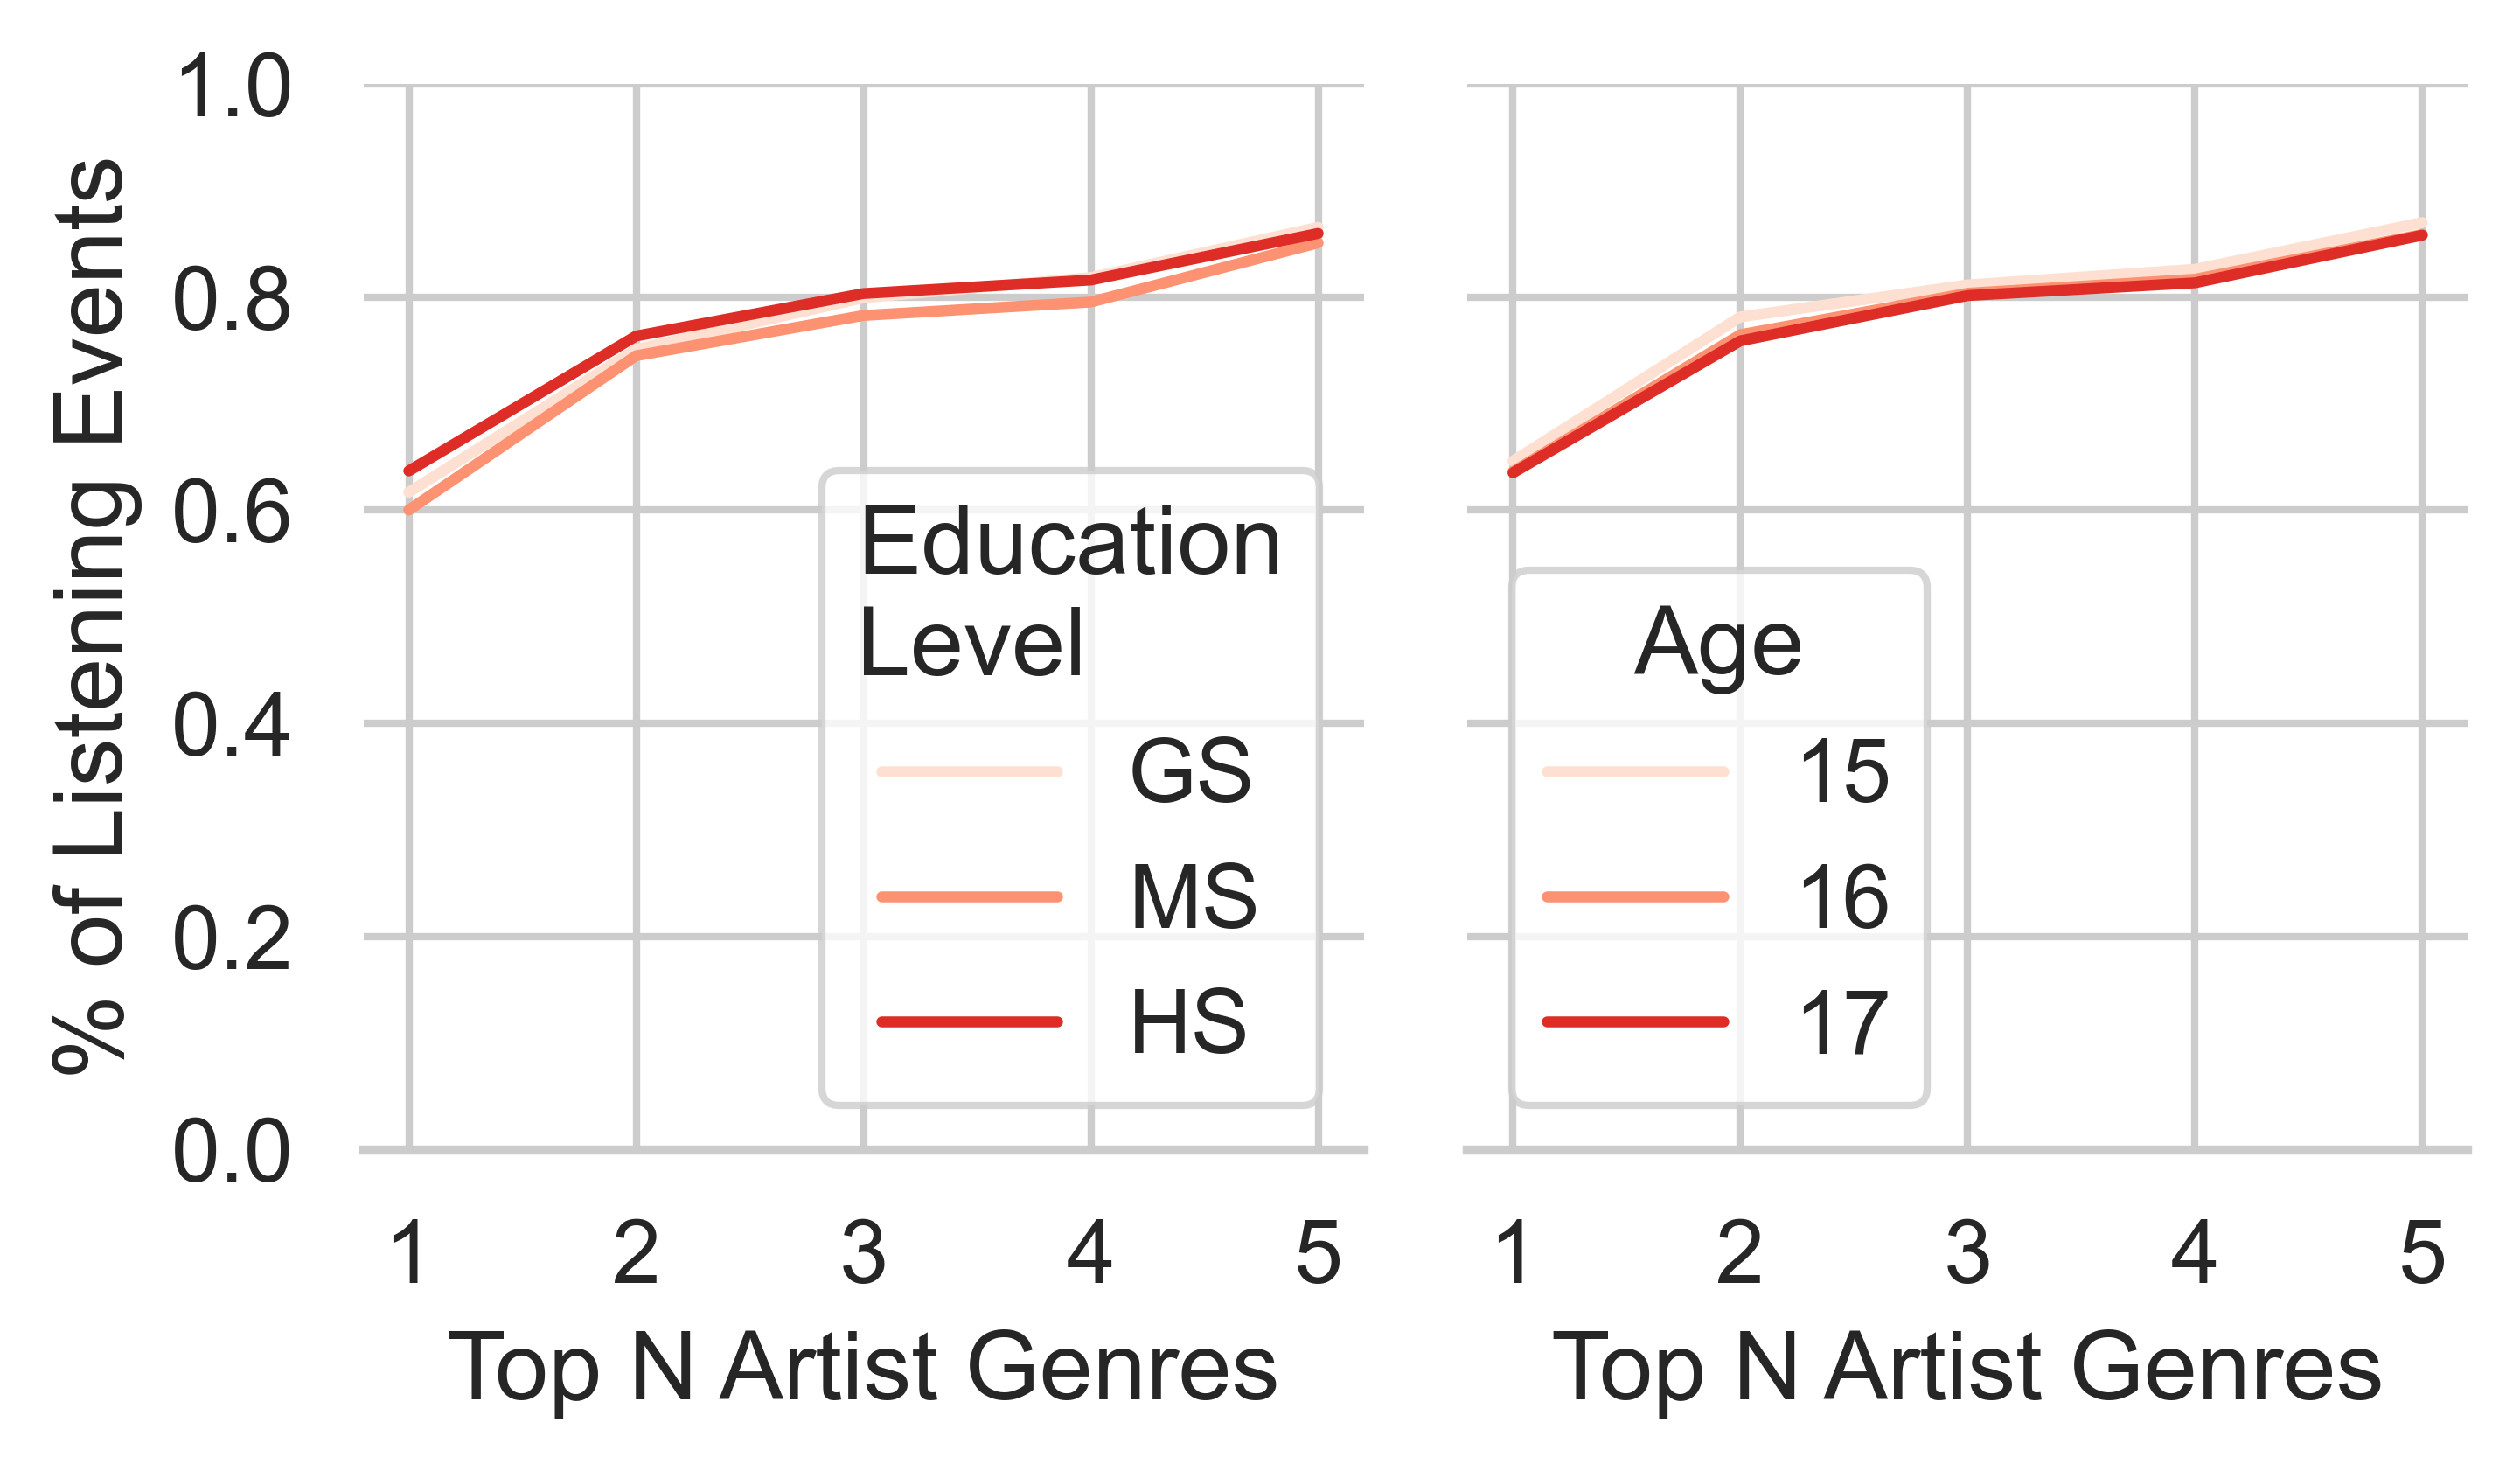

In [39]:
figureSize = (5, 3)

fig, axs = plt.subplots(ncols = 2, figsize=figureSize, sharey = True, dpi = dpi)

graphData = data.drop(columns = 'Age').rename(columns = {'Education Level': 'Education\nLevel'}).groupby('Education\nLevel').sum().unstack().reset_index().rename(columns = {'level_0': 'Top X Artist Genres', 0: 'Listening Event Count'})
graphData = graphData.merge(totalsEducation, left_on = 'Education\nLevel', right_on = 'Education Level')
graphData['% of Listening Events'] = graphData['Listening Event Count'] / graphData['Total']

g = sns.lineplot(data = graphData, x = 'Top X Artist Genres', hue = 'Education\nLevel', y = '% of Listening Events', ax = axs[0])

g.set(xticks = range(1, 6), xlabel = 'Top N Artist Genres', ylim = (0, 1))

graphData = data[data['Education Level'] == 'HS']
graphData = graphData.drop(columns = 'Education Level').set_index('Age').unstack().reset_index().rename(columns = {'level_0': 'Top X Artist Genres', 0: 'Listening Event Count'})
graphData = graphData.merge(totalsAge, on = 'Age')
graphData['% of Listening Events'] = graphData['Listening Event Count'] / graphData['Total']
graphData['Age'] = graphData['Age'].astype(str)

g = sns.lineplot(data = graphData, x = 'Top X Artist Genres', hue = 'Age', y = '% of Listening Events', ax = axs[1])

g.set(ylabel = None, xticks = range(1, 6), xlabel = 'Top N Artist Genres', ylim = (0, 1))

sns.despine(left = True)
plt.tight_layout()
plt.savefig('../output/AllMusic Top X' + fileFormat, bbox_inches='tight', pad_inches = padInches, dpi = dpi)
plt.show();

### Artist Genre Freebase minus AllMusic Top X
#### Prepping data

In [40]:
temp = pd.read_parquet('../data/LastFM1bKidArtistToAllMusicGenre.gzip.parquet')
temp = list(temp['Genre'].cat.categories)

artistToGenre = pd.read_parquet('../data/LastFM1bKidArtistToFreebaseGenre.gzip.parquet')
artistToGenre = artistToGenre[artistToGenre['Genre'].isin(temp) == False]
artistToGenre.head(5)

Artist  Genre
6012        MEGADETH  METAL
6013    FOO FIGHTERS  METAL
6014  PORCUPINE TREE  METAL
6015   DREAM THEATER  METAL
6016     AMON AMARTH  METAL

In [41]:
genreRanking = pd.read_parquet('../data/LastFM1bKidListeningEventsWithUsers', columns = ['Artist', 'User Id'])
genreRanking = genreRanking.groupby(['Artist']).agg(ArtistCount = ('User Id', 'count')).reset_index()
genreRanking = genreRanking.merge(artistToGenre, on = 'Artist')
genreRanking.drop(columns = ['Artist'], inplace = True)
genreRanking = genreRanking.groupby(['Genre'], observed = True).agg(Count = ('ArtistCount', 'sum')).reset_index()
genreRanking.head(5)

Genre     Count
0             DANCE   7144843
1  ALTERNATIVE ROCK  16203257
2             INDIE  15741135
3        INDIE ROCK  10699384
4       PSYCHEDELIC   4495762

In [42]:
calculations = pd.DataFrame({'Genres': itertools.accumulate(map(lambda x: [x], genreRanking['Genre'].head(5).to_list()))})
calculations

Genres
0                                            [DANCE]
1                          [DANCE, ALTERNATIVE ROCK]
2                   [DANCE, ALTERNATIVE ROCK, INDIE]
3       [DANCE, ALTERNATIVE ROCK, INDIE, INDIE ROCK]
4  [DANCE, ALTERNATIVE ROCK, INDIE, INDIE ROCK, P...

In [43]:
data = calculations['Genres'].swifter.allow_dask_on_strings(enable = True).apply(CountListeningEventsIn)
data = pd.concat(data.to_list(), axis = 1)
data = data.reset_index()

Dask Apply:   0%|          | 0/4 [00:00<?, ?it/s]

### Graphs

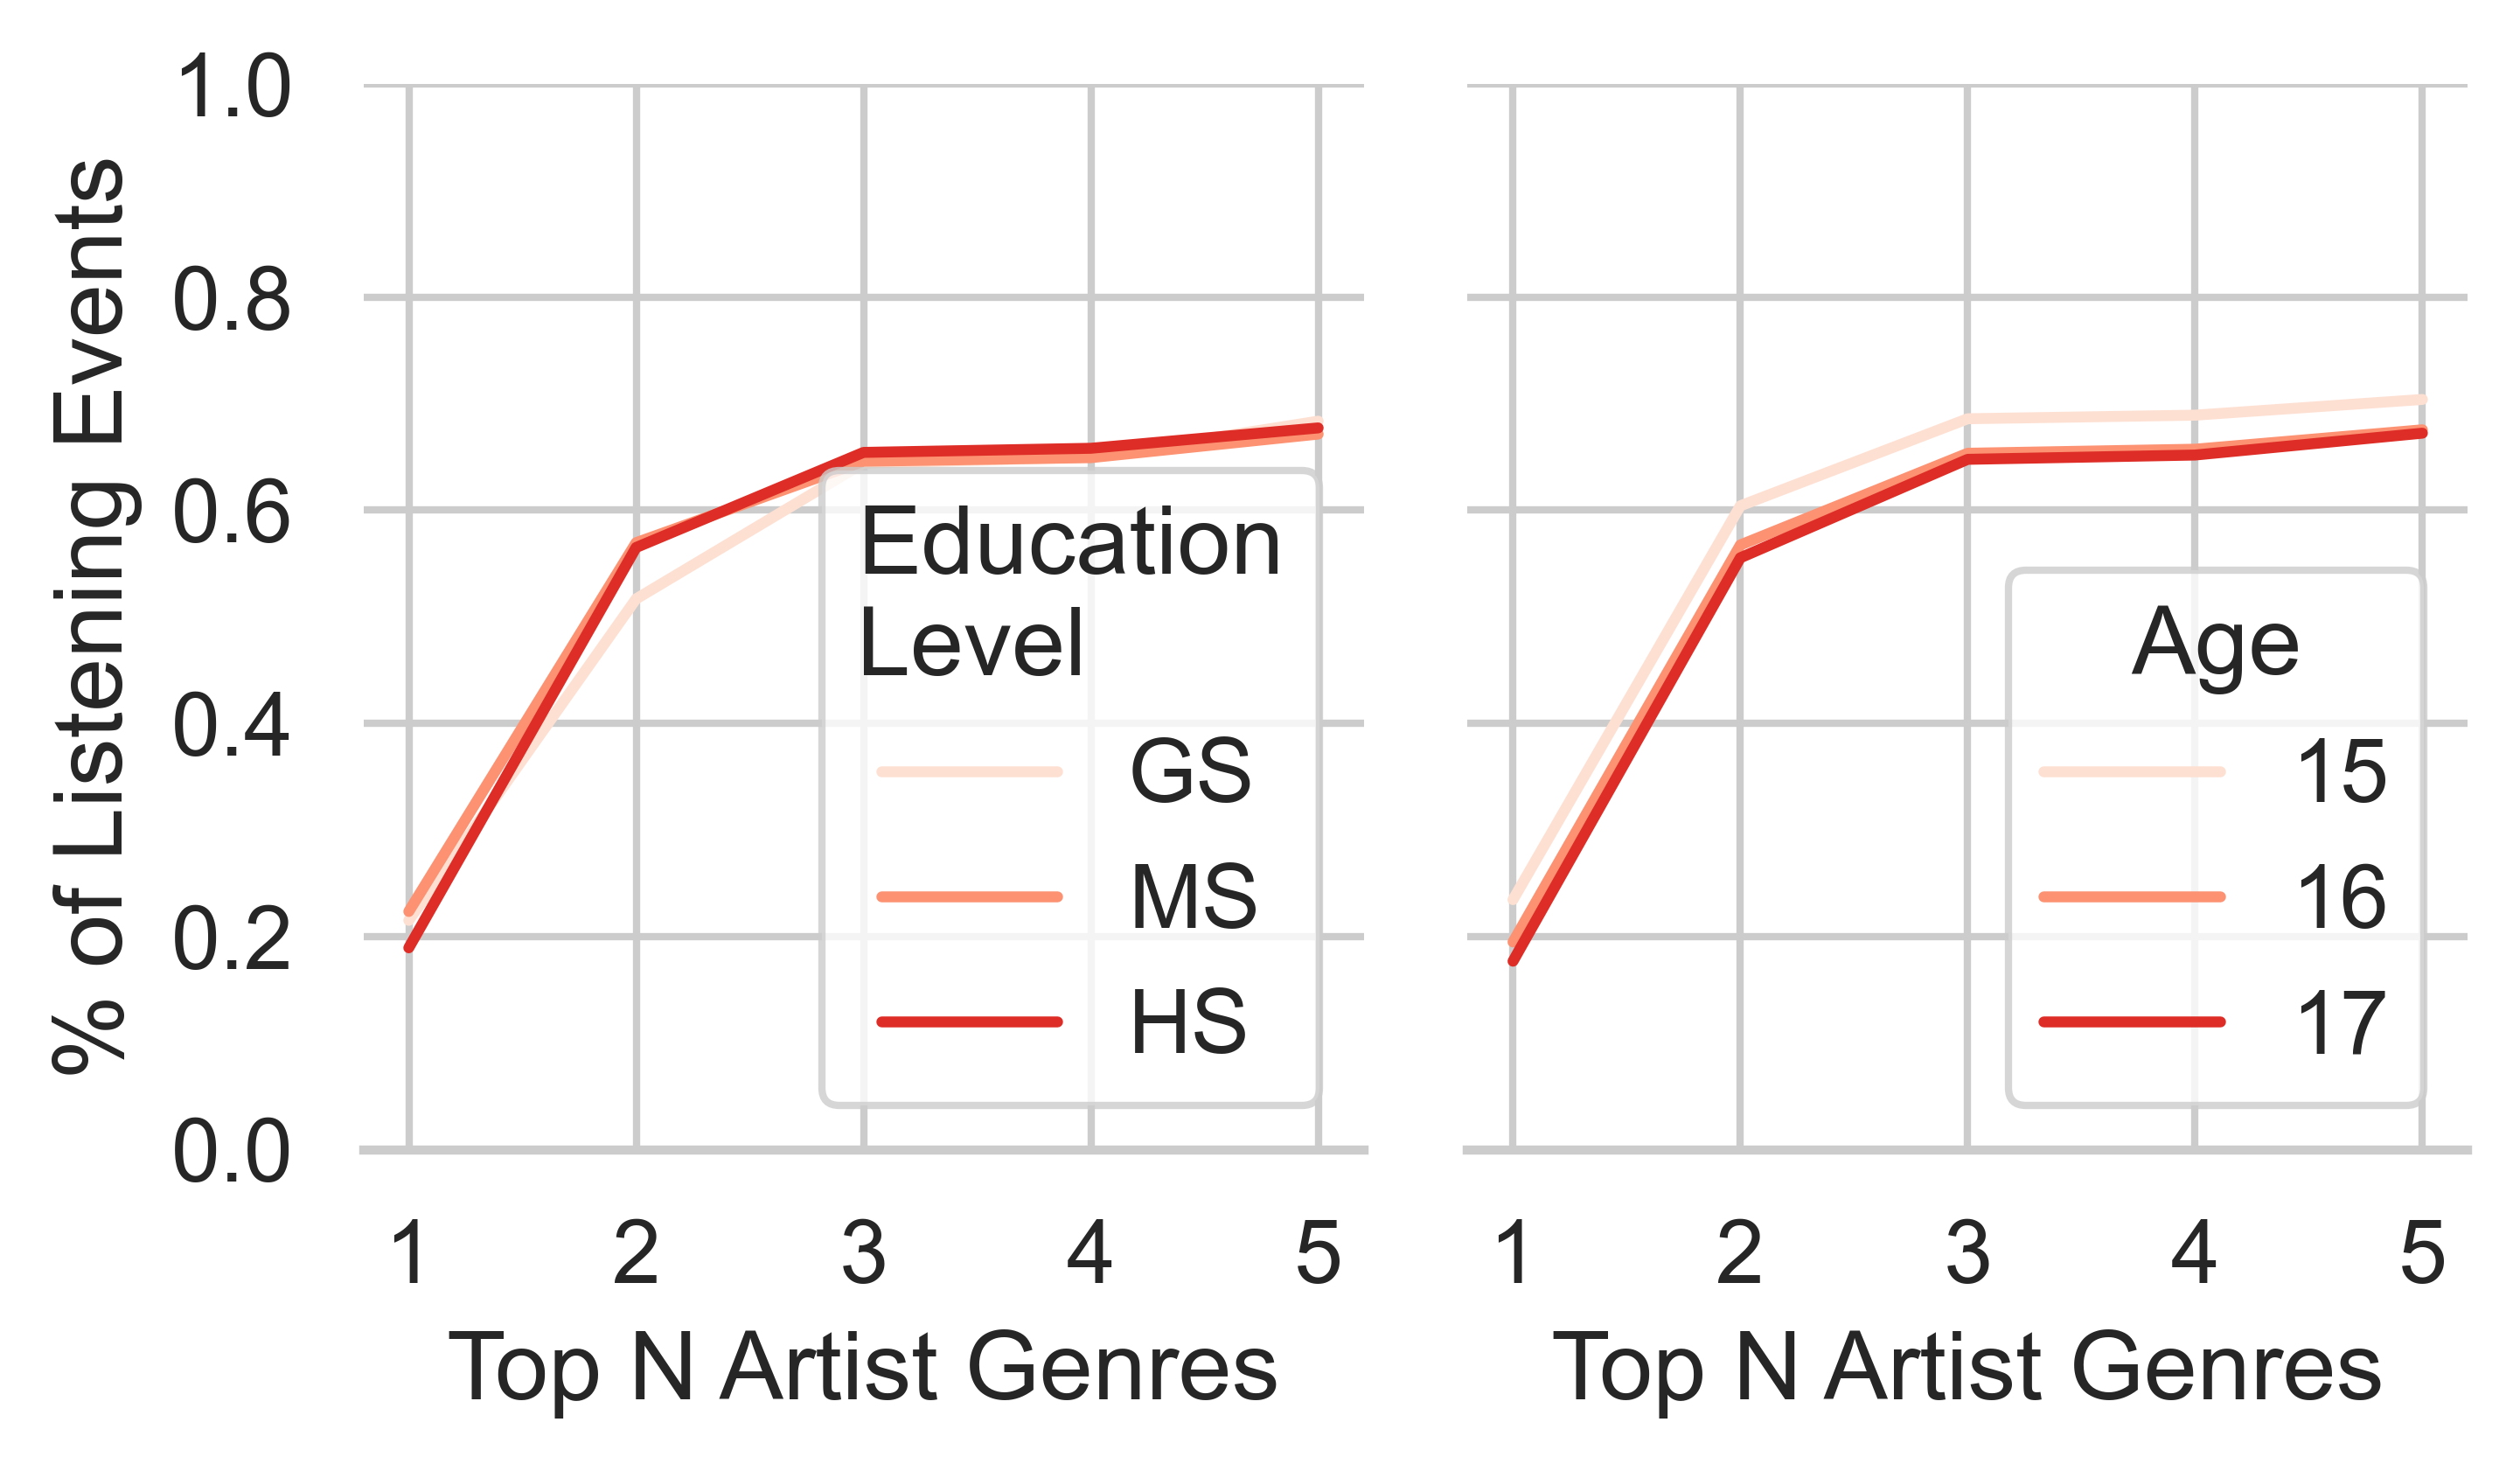

In [44]:
figureSize = (5, 3)

fig, axs = plt.subplots(ncols = 2, figsize=figureSize, sharey = True, dpi = dpi)

graphData = data.drop(columns = 'Age').rename(columns = {'Education Level': 'Education\nLevel'}).groupby('Education\nLevel').sum().unstack().reset_index().rename(columns = {'level_0': 'Top X Artist Genres', 0: 'Listening Event Count'})
graphData = graphData.merge(totalsEducation, left_on = 'Education\nLevel', right_on = 'Education Level')
graphData['% of Listening Events'] = graphData['Listening Event Count'] / graphData['Total']

g = sns.lineplot(data = graphData, x = 'Top X Artist Genres', hue = 'Education\nLevel', y = '% of Listening Events', ax = axs[0])

g.set(xticks = range(1, 6), xlabel = 'Top N Artist Genres', ylim = (0, 1))

graphData = data[data['Education Level'] == 'HS']
graphData = graphData.drop(columns = 'Education Level').set_index('Age').unstack().reset_index().rename(columns = {'level_0': 'Top X Artist Genres', 0: 'Listening Event Count'})
graphData = graphData.merge(totalsAge, on = 'Age')
graphData['% of Listening Events'] = graphData['Listening Event Count'] / graphData['Total']
graphData['Age'] = graphData['Age'].astype(str)

g = sns.lineplot(data = graphData, x = 'Top X Artist Genres', hue = 'Age', y = '% of Listening Events', ax = axs[1])

g.set(ylabel = None, xticks = range(1, 6), xlabel = 'Top N Artist Genres', ylim = (0, 1))

sns.despine(left = True)
plt.tight_layout()
plt.savefig('../output/Freebase without AllMusic Top X' + fileFormat, bbox_inches='tight', pad_inches = padInches, dpi = dpi)
plt.show();